In [1]:
import os 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly as plty
from sklearn.preprocessing import LabelEncoder
from collections import defaultdict
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import f1_score
import xgboost as xgb
import lightgbm as lgb
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler


os.chdir('C:\\Users\\BTHANISH\\Documents\\Thanish\\Competition\\Analytics Vidya\\WNS')

# Reading the files and combining the train and test data

In [2]:
train_prod_DF = pd.read_csv('train_LZdllcl.csv')
test_prod_DF = pd.read_csv('test_2umaH9m.csv')

print("The shape of train data is", train_prod_DF.shape)
print("The shape of test data is", test_prod_DF.shape)

test_prod_DF['is_promoted'] = None

train_test_prod = train_prod_DF.append(test_prod_DF)
print("The shape of the combined data is", train_test_prod.shape)

train_test_prod.rename(columns = {'KPIs_met >80%' : 'KPIs_met_grt_80',
                                  'awards_won?' : 'awards_won'}, inplace = True)

train_test_prod.head()
print(train_test_prod.describe())
train_test_prod.tail()

The shape of train data is (54808, 14)
The shape of test data is (23490, 13)
The shape of the combined data is (78298, 14)
        employee_id  no_of_trainings           age  previous_year_rating  \
count  78298.000000     78298.000000  78298.000000          72362.000000   
mean   39149.500000         1.253378     34.797619              3.332219   
std    22602.830026         0.606766      7.665928              1.260982   
min        1.000000         1.000000     20.000000              1.000000   
25%    19575.250000         1.000000     29.000000              3.000000   
50%    39149.500000         1.000000     33.000000              3.000000   
75%    58723.750000         1.000000     39.000000              4.000000   
max    78298.000000        10.000000     60.000000              5.000000   

       length_of_service  KPIs_met_grt_80    awards_won  avg_training_score  
count       78298.000000     78298.000000  78298.000000        78298.000000  
mean            5.848974         0.3

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met_grt_80,awards_won,avg_training_score,is_promoted
23485,53478,Legal,region_2,Below Secondary,m,sourcing,1,24,3.0,1,0,0,61,None
23486,25600,Technology,region_25,Bachelor's,m,sourcing,1,31,3.0,7,0,0,74,None
23487,45409,HR,region_16,Bachelor's,f,sourcing,1,26,4.0,4,0,0,50,None
23488,1186,Procurement,region_31,Bachelor's,m,sourcing,3,27,NaN,1,0,0,70,None
23489,5973,Technology,region_17,Master's & above,m,other,3,40,5.0,5,1,0,89,None


# Filling the NULL values in factor column

In [3]:
train_test_prod.education = train_test_prod.education.str.replace(" ", "_")
train_test_prod.education = train_test_prod.education.str.replace("'", "")
train_test_prod.education = train_test_prod.education.str.replace("&", "and")

print("Printing the values before imputing the NULL values", train_test_prod.education.isnull().value_counts())
train_test_prod.loc[train_test_prod.education.isnull(), ['education']] = 'Not_sure'

print("Printing the values after imputing the NULL values", train_test_prod.education.isnull().value_counts())

Printing the values before imputing the NULL values False    74855
True      3443
Name: education, dtype: int64
Printing the values after imputing the NULL values False    78298
Name: education, dtype: int64


# Filling the NULL values in integer column

In [4]:
train_test_prod.tail()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met_grt_80,awards_won,avg_training_score,is_promoted
23485,53478,Legal,region_2,Below_Secondary,m,sourcing,1,24,3.0,1,0,0,61,None
23486,25600,Technology,region_25,Bachelors,m,sourcing,1,31,3.0,7,0,0,74,None
23487,45409,HR,region_16,Bachelors,f,sourcing,1,26,4.0,4,0,0,50,None
23488,1186,Procurement,region_31,Bachelors,m,sourcing,3,27,NaN,1,0,0,70,None
23489,5973,Technology,region_17,Masters_and_above,m,other,3,40,5.0,5,1,0,89,None


In [5]:
train_test_prod.fillna(-999, inplace = True)
#print(train_test_prod.describe())
train_test_prod.tail()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met_grt_80,awards_won,avg_training_score,is_promoted
23485,53478,Legal,region_2,Below_Secondary,m,sourcing,1,24,3.0,1,0,0,61,-999
23486,25600,Technology,region_25,Bachelors,m,sourcing,1,31,3.0,7,0,0,74,-999
23487,45409,HR,region_16,Bachelors,f,sourcing,1,26,4.0,4,0,0,50,-999
23488,1186,Procurement,region_31,Bachelors,m,sourcing,3,27,-999.0,1,0,0,70,-999
23489,5973,Technology,region_17,Masters_and_above,m,other,3,40,5.0,5,1,0,89,-999


# Label encode the categorical variables

In [6]:
# cols_2_encode = train_test_prod.columns[train_test_prod.dtypes == 'object']
# print("columns to encode", cols_2_encode)

# le = LabelEncoder()
# train_test_prod.loc[:, cols_2_encode] = train_test_prod.loc[:, cols_2_encode].apply(lambda x : le.fit_transform(x))
train_test_prod.tail()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met_grt_80,awards_won,avg_training_score,is_promoted
23485,53478,Legal,region_2,Below_Secondary,m,sourcing,1,24,3.0,1,0,0,61,-999
23486,25600,Technology,region_25,Bachelors,m,sourcing,1,31,3.0,7,0,0,74,-999
23487,45409,HR,region_16,Bachelors,f,sourcing,1,26,4.0,4,0,0,50,-999
23488,1186,Procurement,region_31,Bachelors,m,sourcing,3,27,-999.0,1,0,0,70,-999
23489,5973,Technology,region_17,Masters_and_above,m,other,3,40,5.0,5,1,0,89,-999


# Feature enigneering
   # Extract the region number from region

In [7]:
train_test_prod['region'] = train_test_prod['region'].str.replace("region_", "").astype('int')
train_test_prod.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met_grt_80,awards_won,avg_training_score,is_promoted
0,65438,Sales & Marketing,7,Masters_and_above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,22,Bachelors,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,19,Bachelors,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,23,Bachelors,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,26,Bachelors,m,other,1,45,3.0,2,0,0,73,0


# Feature enigneering

    # Training score per training
    # % time spent in the company

In [8]:
train_test_prod['score_per_training'] = train_test_prod['avg_training_score']/train_test_prod['no_of_trainings']
train_test_prod['per_age_in_this_company'] = train_test_prod['length_of_service']/train_test_prod['age']
train_test_prod['Rating_per_service'] = train_test_prod['previous_year_rating']/train_test_prod['length_of_service']

train_test_prod.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met_grt_80,awards_won,avg_training_score,is_promoted,score_per_training,per_age_in_this_company,Rating_per_service
0,65438,Sales & Marketing,7,Masters_and_above,f,sourcing,1,35,5.0,8,1,0,49,0,49.0,0.228571,0.625000
1,65141,Operations,22,Bachelors,m,other,1,30,5.0,4,0,0,60,0,60.0,0.133333,1.250000
2,7513,Sales & Marketing,19,Bachelors,m,sourcing,1,34,3.0,7,0,0,50,0,50.0,0.205882,0.428571
3,2542,Sales & Marketing,23,Bachelors,m,other,2,39,1.0,10,0,0,50,0,25.0,0.256410,0.100000
4,48945,Technology,26,Bachelors,m,other,1,45,3.0,2,0,0,73,0,73.0,0.044444,1.500000


# Splitting back to prod train and test

In [9]:
train_prod = train_test_prod.loc[train_test_prod.is_promoted != -999, ]
test_prod = train_test_prod.loc[train_test_prod.is_promoted == -999, ]

print("The shape of train_prod", train_prod.shape)
print("The shape of test_prod", test_prod.shape)

sub_id = test_prod.employee_id

train_prod.drop(['employee_id'], axis = 1, inplace = True)
test_prod.drop(['employee_id'], axis = 1, inplace = True)

train_prod.head()

The shape of train_prod (54808, 17)
The shape of test_prod (23490, 17)


C:\Users\BTHANISH\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

C:\Users\BTHANISH\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met_grt_80,awards_won,avg_training_score,is_promoted,score_per_training,per_age_in_this_company,Rating_per_service
0,Sales & Marketing,7,Masters_and_above,f,sourcing,1,35,5.0,8,1,0,49,0,49.0,0.228571,0.625000
1,Operations,22,Bachelors,m,other,1,30,5.0,4,0,0,60,0,60.0,0.133333,1.250000
2,Sales & Marketing,19,Bachelors,m,sourcing,1,34,3.0,7,0,0,50,0,50.0,0.205882,0.428571
3,Sales & Marketing,23,Bachelors,m,other,2,39,1.0,10,0,0,50,0,25.0,0.256410,0.100000
4,Technology,26,Bachelors,m,other,1,45,3.0,2,0,0,73,0,73.0,0.044444,1.500000


In [10]:
#Department
encode_department = train_prod.groupby(['department']).agg({'is_promoted' : ['mean']}).reset_index()
encode_department.columns = ['department', 'department_mean']

train_prod = pd.merge(train_prod, encode_department[['department', 'department_mean']], 
                        how = 'left', on = 'department').drop(['department'], axis = 1)
test_prod = pd.merge(test_prod, encode_department[['department', 'department_mean']], 
                        how = 'left', on = 'department').drop(['department'], axis = 1)


#Education
encode_education = train_prod.groupby(['education']).agg({'is_promoted' : ['mean']}).reset_index()
encode_education.columns = ['education', 'education_mean']

train_prod = pd.merge(train_prod, encode_education[['education', 'education_mean']], 
                        how = 'left', on = 'education').drop(['education'], axis = 1)
test_prod = pd.merge(test_prod, encode_education[['education', 'education_mean']], 
                        how = 'left', on = 'education').drop(['education'], axis = 1)

#Gender
encode_gender = train_prod.groupby(['gender']).agg({'is_promoted' : ['mean']}).reset_index()
encode_gender.columns = ['gender', 'gender_mean']

train_prod = pd.merge(train_prod, encode_gender[['gender', 'gender_mean']], 
                        how = 'left', on = 'gender').drop(['gender'], axis = 1)
test_prod = pd.merge(test_prod, encode_gender[['gender', 'gender_mean']], 
                        how = 'left', on = 'gender').drop(['gender'], axis = 1)

#recruitment_channel
encode_recruitment_channel = train_prod.groupby(['recruitment_channel']).agg({'is_promoted' : ['mean']}).reset_index()
encode_recruitment_channel.columns = ['recruitment_channel', 'recruitment_channel_mean']

train_prod = pd.merge(train_prod, encode_recruitment_channel[['recruitment_channel', 'recruitment_channel_mean']], 
                        how = 'left', on = 'recruitment_channel').drop(['recruitment_channel'], axis = 1)
test_prod = pd.merge(test_prod, encode_recruitment_channel[['recruitment_channel', 'recruitment_channel_mean']], 
                        how = 'left', on = 'recruitment_channel').drop(['recruitment_channel'], axis = 1)


#region
# encode_region = train_prod.groupby(['region']).agg({'is_promoted' : ['mean']}).reset_index()
# encode_region.columns = ['region', 'region_mean']

# train_prod = pd.merge(train_prod, encode_region[['region', 'region_mean']], 
#                         how = 'left', on = 'region').drop(['region'], axis = 1)
# test_prod = pd.merge(test_prod, encode_region[['region', 'region_mean']], 
#                         how = 'left', on = 'region').drop(['region'], axis = 1)

print("train prod")
train_prod.head()

train prod


,region,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met_grt_80,awards_won,avg_training_score,is_promoted,score_per_training,per_age_in_this_company,Rating_per_service,department_mean,education_mean,gender_mean,recruitment_channel_mean
0,7,1,35,5.0,8,1,0,49,0,49.0,0.228571,0.625000,0.072031,0.098559,0.089934,0.085013
1,22,1,30,5.0,4,0,0,60,0,60.0,0.133333,1.250000,0.090148,0.082031,0.083151,0.083952
2,19,1,34,3.0,7,0,0,50,0,50.0,0.205882,0.428571,0.072031,0.082031,0.083151,0.085013
3,23,2,39,1.0,10,0,0,50,0,25.0,0.256410,0.100000,0.072031,0.082031,0.083151,0.083952
4,26,1,45,3.0,2,0,0,73,0,73.0,0.044444,1.500000,0.107593,0.082031,0.083151,0.083952


In [11]:
# Kmeans cluster

In [12]:

train_prod_cluster = train_prod.copy()
test_prod_cluster = test_prod.copy()

#Scaling the features
cols_2_use_and_scale = train_prod_cluster.columns.difference(['is_promoted'])
scaler = MinMaxScaler()
scaler.fit(train_prod_cluster.loc[:,cols_2_use_and_scale])

#Scaling the train and test prod
train_prod_cluster.loc[:,cols_2_use_and_scale] = scaler.transform(train_prod_cluster.loc[:,cols_2_use_and_scale])
test_prod_cluster[cols_2_use_and_scale] = scaler.transform(test_prod_cluster[cols_2_use_and_scale])

#Fit the model on the train prod
np.random.seed(100)
clus = KMeans(n_clusters= 25, random_state= 123)

#train_prod_cluster.drop(['cluster'], axis = 1, inplace = True)
#test_prod_cluster.drop(['cluster'], axis = 1, inplace = True)

clus.fit(X=train_prod_cluster[cols_2_use_and_scale])

train_prod['cluster'] = clus.labels_

#Predict on the test prod
test_prod['cluster'] = clus.predict(test_prod_cluster[cols_2_use_and_scale])


In [13]:
print(train_prod.groupby(['cluster']).agg({'is_promoted':['count', 'mean']}))
print(test_prod.groupby(['cluster']).agg({'is_promoted':['count', 'mean']}))

        is_promoted          
              count      mean
cluster                      
0              1180  0.014407
1              3988  0.020060
2              3089  0.155390
3              2142  0.166667
4              2671  0.066642
5               739  0.036536
6              5268  0.025247
7              2187  0.202561
8              1023  0.169110
9              1943  0.038085
10             2624  0.081936
11             1937  0.017553
12             2173  0.180856
13             4380  0.064155
14             2022  0.024728
15             2429  0.058460
16             1825  0.120000
17             3626  0.026751
18             1146  0.028796
19              731  0.116279
20             2447  0.163874
21             1201  0.014155
22             2852  0.131837
23              419  0.155131
24              766  0.389034
        is_promoted     
              count mean
cluster                 
0               483 -999
1              1761 -999
2              1304 -999
3         

# Splitting to local train and test

In [14]:
dep = 'is_promoted'
indep = train_prod.columns.difference([dep])
print("The indep columns are ", indep)

train_prod_X = train_prod[indep]
train_prod_Y = train_prod[dep]
test_prod_X = test_prod[indep]
    
np.random.seed(100)
X_train_local, X_test_local, Y_train_local, Y_test_local = train_test_split(train_prod_X,
                                                                            train_prod_Y,
                                                                            test_size = 0.7,
                                                                            stratify = train_prod[dep]
                                                                            )

print("The shape of X train", X_train_local.shape) 
print("The shape of Y train", Y_train_local.shape)
print("The shape of X test",X_test_local.shape)
print("The shape of Y test", Y_test_local.shape )

The indep columns are  Index(['KPIs_met_grt_80', 'Rating_per_service', 'age', 'avg_training_score',
       'awards_won', 'cluster', 'department_mean', 'education_mean',
       'gender_mean', 'length_of_service', 'no_of_trainings',
       'per_age_in_this_company', 'previous_year_rating',
       'recruitment_channel_mean', 'region', 'score_per_training'],
      dtype='object')
The shape of X train (16442, 16)
The shape of Y train (16442,)
The shape of X test (38366, 16)
The shape of Y test (38366,)


# XGBoost

In [58]:
#The best parameters are
#F1 = 0.513664
#LR = 0.3 
#col_samp = 1.0 
#depth = 5 
#sub_samp = 0.7 
#iter = 152 

dtrain_prod = xgb.DMatrix(train_prod_X, label = train_prod_Y)
dtest_prod = xgb.DMatrix(test_prod_X)

param = {'objective': 'binary:logistic', 
                         'max_depth': 5, 
                         'eta' : 0.2,
                         'subsample': 0.9, 
                         'colsample_bytree': 0.8, 
                         'silent' : 1}
def evalerror(preds, dtrain):
    labels = dtrain.get_label()
    labels = (labels>0.3).astype(int)
    preds  = (preds>0.3).astype(int)
    #print(labels)
    #print(preds)
    f_score = f1_score(preds, labels , average = 'binary')
    return 'f1_score', f_score

model = xgb.cv(param,
               dtrain_prod, 
               num_boost_round = 1000, 
               nfold = 5, 
               stratified = True, 
               feval = evalerror, 
               #metrics = 'auc',
               maximize = True, 
               early_stopping_rounds = 20, 
               verbose_eval = 1, 
               shuffle=True)

best_iter = np.where(model['test-f1_score-mean'] == model['test-f1_score-mean'].max())[0].tolist()[0]
print("")
print("The best iteration is", best_iter)
print("The best iteration is", model['test-f1_score-mean'].iloc[best_iter])

[0]	train-error:0.0723798+0.00240784	train-f1_score:0.156971+1.71464e-05	test-error:0.0734198+0.00260536	test-f1_score:0.156971+6.95655e-05
[1]	train-error:0.0719194+0.0026892	train-f1_score:0.156971+1.71464e-05	test-error:0.0727082+0.0026315	test-f1_score:0.156971+6.95655e-05
[2]	train-error:0.0724664+0.00177121	train-f1_score:0.317035+0.00809419	test-error:0.0733468+0.0023751	test-f1_score:0.315874+0.00615252
[3]	train-error:0.0725306+0.00160995	train-f1_score:0.392223+0.0282005	test-error:0.073347+0.00236401	test-f1_score:0.382629+0.0226355
[4]	train-error:0.071983+0.00251975	train-f1_score:0.405392+0.0334767	test-error:0.0727814+0.00308397	test-f1_score:0.394478+0.0259855
[5]	train-error:0.0717138+0.0026189	train-f1_score:0.402704+0.024189	test-error:0.07269+0.00297383	test-f1_score:0.391993+0.0275184
[6]	train-error:0.0705096+0.00184741	train-f1_score:0.418381+0.029423	test-error:0.071267+0.00226281	test-f1_score:0.406751+0.0479991
[7]	train-error:0.0697206+0.000484306	train-f1_sc

[60]	train-error:0.0566478+0.000488053	train-f1_score:0.569288+0.00388992	test-error:0.0587502+0.0018341	test-f1_score:0.518576+0.0164035
[61]	train-error:0.056625+0.000505448	train-f1_score:0.569933+0.00503713	test-error:0.0586956+0.00189771	test-f1_score:0.518705+0.0157032
[62]	train-error:0.0564698+0.000395969	train-f1_score:0.570893+0.00422374	test-error:0.0585678+0.00198212	test-f1_score:0.519042+0.0164301
[63]	train-error:0.0564834+0.000405213	train-f1_score:0.571537+0.00394593	test-error:0.0585132+0.00199511	test-f1_score:0.519676+0.0173225
[64]	train-error:0.0563284+0.000392305	train-f1_score:0.572856+0.00396322	test-error:0.0583672+0.00204391	test-f1_score:0.520573+0.0160397
[65]	train-error:0.0563104+0.000420852	train-f1_score:0.573692+0.00423608	test-error:0.0583854+0.0020273	test-f1_score:0.521279+0.0158832
[66]	train-error:0.0562328+0.000437359	train-f1_score:0.574409+0.00489161	test-error:0.0583672+0.0020043	test-f1_score:0.52082+0.0155635
[67]	train-error:0.0561826+0.000

# XGB Grid search

In [59]:
#XGBoost
dtrain_prod = xgb.DMatrix(train_prod_X, label = train_prod_Y)
dtest_prod = xgb.DMatrix(test_prod_X)
#Cross validation
depth_search = [4, 5, 6]
eta_search = [0.1, 0.2, 0.3]
subsample_search = [0.7, 0.8, 0.9, 1]
colsample_search = [0.7, 0.8, 0.9, 1]

# def evalerror(preds, dtrain):
#     labels = dtrain.get_label()
#     #print(preds)
#     #print(len(preds))
#     f_score = f1_score(preds, labels, average = 'binary')
#     return 'f1_score', f_score

def evalerror(preds, dtrain):
    labels = dtrain.get_label()
    labels = (labels>0.3).astype(int)
    preds  = (preds>0.3).astype(int)
    #print(labels)
    #print(preds)
    f_score = f1_score(preds, labels , average = 'binary')
    return 'f1_score', f_score


best_iteration = []
best_auc = []
best_depth = []
best_LR = []
best_sub_samp = []
best_col_samp = []

model_count = len(depth_search) * len(eta_search) # * len(subsample_search) * len(colsample_search)
count = 0
num_round = 1000

for depth in depth_search :
    for LR in eta_search :
        for sub_samp in subsample_search :
            for col_samp in colsample_search :
                
                print("Model", count, "out of", model_count) 
                param = {'objective': 'binary:logistic', 
                         'max_depth': depth, 
                         'eta' : LR,
                         'subsample': sub_samp, 
                         'colsample_bytree': col_samp, 
                         'silent' : 1}
                
                #Cross validation
                np.random.seed(100)
                model_cv = xgb.cv(param, 
                               dtrain_prod, 
                               num_boost_round = 1000, 
                               nfold = 5, 
                               stratified = True, 
                               folds = None, 
                               #metrics = ['mlogloss'], 
                               obj = None, 
                               feval = evalerror, 
                               maximize = True, 
                               early_stopping_rounds = 15, 
                               fpreproc = None, 
                               as_pandas = True, 
                               verbose_eval = 1, 
                               show_stdv=True, seed=0, callbacks=None, shuffle=True)

                best_round = np.argwhere(model_cv['test-f1_score-mean'] == model_cv['test-f1_score-mean'].max())[0][0]
                best_valid_score = model_cv['test-f1_score-mean'].max()
                
                print("Model", count, "out of", model_count, "Best round", best_round, "Score", best_valid_score) 
                    
                best_iteration.append(best_round)                
                best_auc.append(best_valid_score)
                best_depth.append(depth)
                best_LR.append(LR)
                best_sub_samp.append(sub_samp)
                best_col_samp.append(col_samp)
                
                count += 1

cv_DF = pd.DataFrame({'iter' : best_iteration,
                      'depth' : best_depth,
                      'LR' : best_LR,
                      'sub_samp' : best_sub_samp,
                      'col_samp' : best_col_samp,
                      'Auc' : best_auc})

cv_DF.loc[cv_DF['Auc'] == cv_DF['Auc'].max(),:]           


Model 0 out of 9
[0]	train-error:0.0749118+0.000488145	train-f1_score:0.156971+1.71464e-05	test-error:0.0753722+0.00238378	test-f1_score:0.156971+6.95655e-05
[1]	train-error:0.0748932+0.000784663	train-f1_score:0.156971+1.71464e-05	test-error:0.075445+0.00263936	test-f1_score:0.156971+6.95655e-05
[2]	train-error:0.0749024+0.000535173	train-f1_score:0.156971+1.71464e-05	test-error:0.0751714+0.00224899	test-f1_score:0.156971+6.95655e-05
[3]	train-error:0.074697+0.00105656	train-f1_score:0.156971+1.71464e-05	test-error:0.074989+0.00206356	test-f1_score:0.156971+6.95655e-05
[4]	train-error:0.0747702+0.000958816	train-f1_score:0.156971+1.71464e-05	test-error:0.0750438+0.00203992	test-f1_score:0.156971+6.95655e-05
[5]	train-error:0.0747612+0.000616618	train-f1_score:0.299783+0.0112741	test-error:0.0749524+0.00194755	test-f1_score:0.298807+0.0127447
[6]	train-error:0.0745648+0.000211042	train-f1_score:0.321402+0.00764075	test-error:0.0750434+0.00213171	test-f1_score:0.319546+0.00591799
[7]	tr

[60]	train-error:0.064612+0.000801012	train-f1_score:0.475952+0.0181126	test-error:0.065191+0.00195448	test-f1_score:0.462565+0.0178208
[61]	train-error:0.0643838+0.00102851	train-f1_score:0.476642+0.0183692	test-error:0.0649904+0.00183501	test-f1_score:0.464517+0.0172269
[62]	train-error:0.0641282+0.00118451	train-f1_score:0.478153+0.0194082	test-error:0.064808+0.00183698	test-f1_score:0.466594+0.0168421
[63]	train-error:0.0640598+0.00112021	train-f1_score:0.479643+0.0196409	test-error:0.0647534+0.00184223	test-f1_score:0.467691+0.0167698
[64]	train-error:0.0637134+0.00103925	train-f1_score:0.484297+0.0130102	test-error:0.064206+0.00199898	test-f1_score:0.472238+0.0184405
[65]	train-error:0.0635948+0.000983304	train-f1_score:0.485704+0.0133218	test-error:0.0640782+0.00179513	test-f1_score:0.472338+0.0181996
[66]	train-error:0.063435+0.000781589	train-f1_score:0.488926+0.00760806	test-error:0.0639322+0.00198636	test-f1_score:0.475803+0.0209474
[67]	train-error:0.063321+0.00069491	train

[120]	train-error:0.0587778+0.000483178	train-f1_score:0.530827+0.00446702	test-error:0.0599182+0.00193917	test-f1_score:0.506115+0.016952
[121]	train-error:0.0587918+0.000483221	train-f1_score:0.530964+0.00526773	test-error:0.0598816+0.00190473	test-f1_score:0.505896+0.0155427
[122]	train-error:0.0587872+0.000499262	train-f1_score:0.530451+0.0050249	test-error:0.059918+0.00190979	test-f1_score:0.506195+0.0152446
[123]	train-error:0.0587324+0.000460602	train-f1_score:0.531116+0.00444103	test-error:0.0598816+0.00189692	test-f1_score:0.506106+0.0155761
[124]	train-error:0.058682+0.0004495	train-f1_score:0.53195+0.00545721	test-error:0.0598998+0.00184823	test-f1_score:0.505259+0.0148079
[125]	train-error:0.0586458+0.000485455	train-f1_score:0.532127+0.00552557	test-error:0.0599182+0.00188543	test-f1_score:0.505114+0.0150364
[126]	train-error:0.0585864+0.000480412	train-f1_score:0.53206+0.0056511	test-error:0.0598636+0.00190205	test-f1_score:0.504383+0.0144325
[127]	train-error:0.0585452+0

Model 1 out of 9 Best round 8 Score 0.3643844
Model 2 out of 9
[0]	train-error:0.0749118+0.000488145	train-f1_score:0.156971+1.71464e-05	test-error:0.0753722+0.00238378	test-f1_score:0.156971+6.95655e-05
[1]	train-error:0.0745192+0.000213691	train-f1_score:0.156971+1.71464e-05	test-error:0.0750258+0.00250792	test-f1_score:0.156971+6.95655e-05
[2]	train-error:0.0746424+0.000542047	train-f1_score:0.156971+1.71464e-05	test-error:0.0749344+0.00206809	test-f1_score:0.156971+6.95655e-05
[3]	train-error:0.0746058+0.000627658	train-f1_score:0.156971+1.71464e-05	test-error:0.0747884+0.00211165	test-f1_score:0.156971+6.95655e-05
[4]	train-error:0.0742548+0.000318364	train-f1_score:0.156971+1.71464e-05	test-error:0.0746058+0.00202739	test-f1_score:0.156971+6.95655e-05
[5]	train-error:0.0741862+0.000425504	train-f1_score:0.304561+0.0100672	test-error:0.0746424+0.00205589	test-f1_score:0.304352+0.0109225
[6]	train-error:0.073885+0.000390808	train-f1_score:0.312003+0.00819542	test-error:0.0742592+0.

[35]	train-error:0.0688494+0.00076843	train-f1_score:0.419015+0.0279929	test-error:0.06957+0.0011938	test-f1_score:0.409278+0.0193286
[36]	train-error:0.0686488+0.000659731	train-f1_score:0.429881+0.0154348	test-error:0.0693694+0.00120456	test-f1_score:0.420976+0.0232209
[37]	train-error:0.0685986+0.00058254	train-f1_score:0.434939+0.019123	test-error:0.0691502+0.00133194	test-f1_score:0.425396+0.0240557
[38]	train-error:0.0684664+0.00061489	train-f1_score:0.440017+0.0103559	test-error:0.0690046+0.00134626	test-f1_score:0.431641+0.0378664
[39]	train-error:0.0678916+0.000513516	train-f1_score:0.447391+0.0145837	test-error:0.0684754+0.00133889	test-f1_score:0.43971+0.0389029
[40]	train-error:0.06749+0.000914035	train-f1_score:0.449788+0.00800081	test-error:0.0680558+0.00106719	test-f1_score:0.443057+0.0344966
[41]	train-error:0.0672212+0.000986291	train-f1_score:0.455224+0.0069534	test-error:0.067837+0.000915929	test-f1_score:0.449263+0.0290398
[42]	train-error:0.0668424+0.000978178	trai

[95]	train-error:0.0590744+0.000448306	train-f1_score:0.521292+0.00428056	test-error:0.0598998+0.0018769	test-f1_score:0.502886+0.0191421
[96]	train-error:0.0589514+0.000375092	train-f1_score:0.521933+0.00340908	test-error:0.0596628+0.00187443	test-f1_score:0.502897+0.0186954
[97]	train-error:0.0589286+0.000368198	train-f1_score:0.522218+0.00332068	test-error:0.0597174+0.00189258	test-f1_score:0.502467+0.018868
[98]	train-error:0.058828+0.0003172	train-f1_score:0.52267+0.00384887	test-error:0.0595714+0.00196805	test-f1_score:0.502682+0.0193571
[99]	train-error:0.0587962+0.000352048	train-f1_score:0.523021+0.00357295	test-error:0.0595168+0.00204292	test-f1_score:0.503273+0.0196529
[100]	train-error:0.058714+0.000389852	train-f1_score:0.52398+0.00399419	test-error:0.0594802+0.00198863	test-f1_score:0.503163+0.0176606
[101]	train-error:0.0587048+0.000403145	train-f1_score:0.524563+0.00500339	test-error:0.0594804+0.00195899	test-f1_score:0.502826+0.0174344
[102]	train-error:0.0586728+0.000

[155]	train-error:0.0573138+0.000507047	train-f1_score:0.552836+0.0053633	test-error:0.0585498+0.00207591	test-f1_score:0.513155+0.0200619
[156]	train-error:0.0572726+0.000488727	train-f1_score:0.553857+0.00492864	test-error:0.0585316+0.00207288	test-f1_score:0.514365+0.0194729
[157]	train-error:0.0572588+0.00048033	train-f1_score:0.554272+0.00499787	test-error:0.0585314+0.00204545	test-f1_score:0.51418+0.0194435
[158]	train-error:0.0571952+0.000475489	train-f1_score:0.55404+0.00452912	test-error:0.0585314+0.00210698	test-f1_score:0.514395+0.0199957
[159]	train-error:0.0571908+0.000478249	train-f1_score:0.553815+0.00490871	test-error:0.0585132+0.00213045	test-f1_score:0.514449+0.0198508
[160]	train-error:0.057154+0.000441558	train-f1_score:0.553982+0.00480857	test-error:0.0584582+0.00211715	test-f1_score:0.514427+0.0200141
[161]	train-error:0.057081+0.000390093	train-f1_score:0.553963+0.00505074	test-error:0.05844+0.0021399	test-f1_score:0.51476+0.0197296
[162]	train-error:0.0570582+0.

[215]	train-error:0.05626+0.000386513	train-f1_score:0.571767+0.00605988	test-error:0.0580204+0.00206752	test-f1_score:0.519358+0.0170425
[216]	train-error:0.056228+0.000350385	train-f1_score:0.572263+0.0067107	test-error:0.0580386+0.00206943	test-f1_score:0.519717+0.0175055
[217]	train-error:0.056242+0.000329752	train-f1_score:0.572431+0.00623333	test-error:0.0580206+0.00204718	test-f1_score:0.518496+0.0171712
[218]	train-error:0.0562056+0.000311928	train-f1_score:0.572714+0.00645898	test-error:0.058039+0.00206777	test-f1_score:0.519024+0.0181476
[219]	train-error:0.056187+0.000303652	train-f1_score:0.57326+0.00643943	test-error:0.0579842+0.00206811	test-f1_score:0.518129+0.0187907
[220]	train-error:0.0561824+0.000318747	train-f1_score:0.573939+0.00663146	test-error:0.0579478+0.00208712	test-f1_score:0.518739+0.018727
[221]	train-error:0.056196+0.000283447	train-f1_score:0.573953+0.00636139	test-error:0.0579476+0.0020792	test-f1_score:0.518813+0.0180559
[222]	train-error:0.0561824+0.0

[44]	train-error:0.066984+0.00120764	train-f1_score:0.438766+0.0225792	test-error:0.067636+0.00148016	test-f1_score:0.428438+0.0193131
[45]	train-error:0.0669656+0.0012481	train-f1_score:0.440008+0.0217921	test-error:0.0675084+0.0016322	test-f1_score:0.430244+0.019587
[46]	train-error:0.0667332+0.00117286	train-f1_score:0.445203+0.0215365	test-error:0.0671984+0.00169271	test-f1_score:0.434889+0.0248185
[47]	train-error:0.0664822+0.00103135	train-f1_score:0.449315+0.0198076	test-error:0.0671068+0.00163495	test-f1_score:0.437183+0.0243183
[48]	train-error:0.0664182+0.00107725	train-f1_score:0.449772+0.0208094	test-error:0.0670156+0.00153303	test-f1_score:0.437727+0.0226965
[49]	train-error:0.0661902+0.00102694	train-f1_score:0.452142+0.0205476	test-error:0.0667602+0.00143318	test-f1_score:0.439758+0.0210995
[50]	train-error:0.0660214+0.00102097	train-f1_score:0.457344+0.0195765	test-error:0.066742+0.00133026	test-f1_score:0.446479+0.0143141
[51]	train-error:0.0660076+0.00100451	train-f1_

[104]	train-error:0.059412+0.000463229	train-f1_score:0.521449+0.0047161	test-error:0.060283+0.00193394	test-f1_score:0.495767+0.0186422
[105]	train-error:0.0593254+0.000587597	train-f1_score:0.522297+0.00523559	test-error:0.0603194+0.00188972	test-f1_score:0.496828+0.0186776
[106]	train-error:0.0593116+0.00058496	train-f1_score:0.522491+0.00503317	test-error:0.060283+0.00189497	test-f1_score:0.497553+0.0189426
[107]	train-error:0.0592936+0.000589108	train-f1_score:0.523202+0.00520147	test-error:0.0603012+0.00188763	test-f1_score:0.498717+0.0181636
[108]	train-error:0.0592844+0.000584152	train-f1_score:0.523569+0.00507876	test-error:0.0603012+0.00188763	test-f1_score:0.499005+0.0182811
[109]	train-error:0.059266+0.000558428	train-f1_score:0.524217+0.00490943	test-error:0.0601918+0.00194194	test-f1_score:0.499226+0.017974
[110]	train-error:0.0592796+0.000560263	train-f1_score:0.524458+0.00514866	test-error:0.0601554+0.00196669	test-f1_score:0.499282+0.0179918
[111]	train-error:0.0592614

[163]	train-error:0.0573776+0.000559864	train-f1_score:0.550251+0.00558117	test-error:0.0585678+0.00182689	test-f1_score:0.513008+0.0169819
[164]	train-error:0.0573958+0.000550563	train-f1_score:0.550443+0.00574574	test-error:0.0585496+0.00187121	test-f1_score:0.513419+0.0175256
[165]	train-error:0.0573638+0.000572824	train-f1_score:0.550489+0.00563256	test-error:0.0585496+0.00187121	test-f1_score:0.514365+0.0162528
[166]	train-error:0.057332+0.000558014	train-f1_score:0.551487+0.00610042	test-error:0.0585862+0.00190578	test-f1_score:0.514665+0.015048
[167]	train-error:0.0573548+0.000571889	train-f1_score:0.551486+0.00605719	test-error:0.0586228+0.00189178	test-f1_score:0.513433+0.0151732
[168]	train-error:0.0573504+0.000584828	train-f1_score:0.551425+0.00585367	test-error:0.0585498+0.00185054	test-f1_score:0.514476+0.016077
[169]	train-error:0.0573182+0.000581195	train-f1_score:0.551726+0.00583151	test-error:0.0585864+0.0018362	test-f1_score:0.513819+0.0164086
[170]	train-error:0.0572

[222]	train-error:0.056511+0.000410099	train-f1_score:0.567425+0.00500668	test-error:0.0582578+0.00184835	test-f1_score:0.518373+0.0166495
[223]	train-error:0.0564882+0.000428274	train-f1_score:0.567407+0.00522112	test-error:0.0582762+0.00184906	test-f1_score:0.518791+0.0154076
[224]	train-error:0.0564834+0.000399004	train-f1_score:0.567696+0.00537726	test-error:0.0582396+0.00181575	test-f1_score:0.517714+0.0165452
[225]	train-error:0.0564472+0.000465135	train-f1_score:0.568013+0.00521712	test-error:0.0581666+0.00174874	test-f1_score:0.519037+0.0157672
[226]	train-error:0.0564196+0.000504569	train-f1_score:0.56816+0.0054446	test-error:0.0581668+0.00181756	test-f1_score:0.518259+0.0166901
[227]	train-error:0.0564104+0.000486833	train-f1_score:0.568785+0.00557611	test-error:0.058185+0.00180089	test-f1_score:0.518241+0.0163255
[228]	train-error:0.0564014+0.0004843	train-f1_score:0.568508+0.00535527	test-error:0.0582214+0.00180637	test-f1_score:0.518257+0.0167172
[229]	train-error:0.056401

[19]	train-error:0.0731236+0.000457258	train-f1_score:0.348168+0.0087019	test-error:0.0736936+0.00180699	test-f1_score:0.34352+0.0150204
[20]	train-error:0.0729592+0.000402312	train-f1_score:0.348583+0.00823035	test-error:0.0735294+0.00186893	test-f1_score:0.344433+0.0158511
[21]	train-error:0.0728588+0.000366628	train-f1_score:0.34863+0.00659437	test-error:0.0734382+0.00186922	test-f1_score:0.344642+0.0158254
[22]	train-error:0.0722844+0.000373401	train-f1_score:0.350675+0.00879176	test-error:0.0729274+0.00206148	test-f1_score:0.344785+0.0125092
Model 6 out of 9 Best round 8 Score 0.357592
Model 7 out of 9
[0]	train-error:0.074679+0.000467347	train-f1_score:0.156971+1.71464e-05	test-error:0.0750802+0.00207796	test-f1_score:0.156971+6.95655e-05
[1]	train-error:0.0742546+0.000460428	train-f1_score:0.156971+1.71464e-05	test-error:0.0748246+0.00212762	test-f1_score:0.156971+6.95655e-05
[2]	train-error:0.0742866+0.000380648	train-f1_score:0.156971+1.71464e-05	test-error:0.0747882+0.0023004

[56]	train-error:0.0627462+0.000712087	train-f1_score:0.485885+0.00811765	test-error:0.0634032+0.00189317	test-f1_score:0.473818+0.0203026
[57]	train-error:0.062436+0.000588338	train-f1_score:0.486541+0.00823377	test-error:0.0632572+0.00201876	test-f1_score:0.47514+0.0200561
[58]	train-error:0.0620438+0.000473091	train-f1_score:0.487841+0.00861892	test-error:0.0627644+0.00182529	test-f1_score:0.475506+0.0204292
[59]	train-error:0.0620212+0.000518406	train-f1_score:0.488582+0.00852981	test-error:0.0627826+0.00196538	test-f1_score:0.475413+0.0201222
[60]	train-error:0.0619798+0.000474064	train-f1_score:0.490059+0.0101468	test-error:0.0627644+0.00198762	test-f1_score:0.477331+0.0179586
[61]	train-error:0.0619254+0.000369371	train-f1_score:0.492218+0.00927137	test-error:0.0627096+0.00195614	test-f1_score:0.480198+0.0202483
[62]	train-error:0.0617336+0.000413735	train-f1_score:0.494539+0.00771844	test-error:0.0625272+0.00196142	test-f1_score:0.482575+0.0209445
[63]	train-error:0.061615+0.00

[116]	train-error:0.0580342+0.000555743	train-f1_score:0.530168+0.00479987	test-error:0.0591884+0.00192353	test-f1_score:0.506065+0.0203584
[117]	train-error:0.0580298+0.000551989	train-f1_score:0.530488+0.00508129	test-error:0.05917+0.00191935	test-f1_score:0.505345+0.0199465
[118]	train-error:0.0580254+0.000548759	train-f1_score:0.531124+0.00504027	test-error:0.0591152+0.00194735	test-f1_score:0.505719+0.019839
[119]	train-error:0.0580252+0.000547353	train-f1_score:0.531605+0.00525324	test-error:0.0591152+0.00194735	test-f1_score:0.506093+0.0204051
[120]	train-error:0.0579978+0.000562477	train-f1_score:0.531544+0.00523013	test-error:0.0590788+0.00192814	test-f1_score:0.506901+0.0199097
[121]	train-error:0.0580024+0.000553117	train-f1_score:0.531877+0.00501556	test-error:0.0590972+0.00193316	test-f1_score:0.508066+0.0194457
[122]	train-error:0.0580116+0.000552984	train-f1_score:0.531995+0.00512277	test-error:0.0590972+0.00193316	test-f1_score:0.508016+0.0187892
[123]	train-error:0.058

[175]	train-error:0.0569672+0.000389891	train-f1_score:0.553846+0.00575171	test-error:0.0584038+0.00220432	test-f1_score:0.51667+0.0200919
[176]	train-error:0.0569582+0.000406685	train-f1_score:0.554453+0.00630457	test-error:0.0583856+0.00222647	test-f1_score:0.516521+0.0199328
[177]	train-error:0.0569304+0.000383927	train-f1_score:0.554615+0.0056921	test-error:0.0583672+0.00219949	test-f1_score:0.516886+0.0197136
[178]	train-error:0.0569214+0.000405851	train-f1_score:0.555041+0.00555692	test-error:0.0583854+0.00221047	test-f1_score:0.516933+0.0200808
[179]	train-error:0.0568756+0.0004289	train-f1_score:0.55606+0.00534882	test-error:0.0584036+0.00218815	test-f1_score:0.517059+0.0197563
[180]	train-error:0.056853+0.000457138	train-f1_score:0.556452+0.00567098	test-error:0.0583854+0.00216191	test-f1_score:0.516848+0.0193267
[181]	train-error:0.0568438+0.000449812	train-f1_score:0.557036+0.00534367	test-error:0.0583854+0.00213724	test-f1_score:0.517736+0.0199594
[182]	train-error:0.056789

[235]	train-error:0.0559498+0.000504903	train-f1_score:0.57709+0.00687716	test-error:0.0578016+0.00201854	test-f1_score:0.52347+0.0193571
[236]	train-error:0.0559316+0.000505876	train-f1_score:0.576743+0.00712937	test-error:0.05782+0.0019975	test-f1_score:0.5232+0.0194789
[237]	train-error:0.0559452+0.000524581	train-f1_score:0.577006+0.00753206	test-error:0.0578564+0.00202716	test-f1_score:0.522518+0.0200282
[238]	train-error:0.0559226+0.000517707	train-f1_score:0.577398+0.00732789	test-error:0.0578746+0.00206278	test-f1_score:0.523177+0.0197547
[239]	train-error:0.0558862+0.00049957	train-f1_score:0.577673+0.00706657	test-error:0.0578564+0.00208422	test-f1_score:0.524024+0.0192808
[240]	train-error:0.0558724+0.000523705	train-f1_score:0.578313+0.00638622	test-error:0.057911+0.00210008	test-f1_score:0.52405+0.0190061
[241]	train-error:0.0558404+0.000501283	train-f1_score:0.578886+0.00638002	test-error:0.0578748+0.00210474	test-f1_score:0.524195+0.019095
[242]	train-error:0.0558266+0.0

[37]	train-error:0.0687218+0.000966313	train-f1_score:0.419556+0.0258124	test-error:0.069479+0.0018259	test-f1_score:0.410625+0.0219713
[38]	train-error:0.068188+0.000691451	train-f1_score:0.422798+0.0250306	test-error:0.0687856+0.00148725	test-f1_score:0.415988+0.0179595
[39]	train-error:0.0680558+0.000535902	train-f1_score:0.425184+0.0248528	test-error:0.068658+0.00135465	test-f1_score:0.416711+0.0198951
[40]	train-error:0.067773+0.000510426	train-f1_score:0.428139+0.0245825	test-error:0.0683474+0.00152106	test-f1_score:0.417828+0.0219641
[41]	train-error:0.0676956+0.000554864	train-f1_score:0.428337+0.025261	test-error:0.0683842+0.00146335	test-f1_score:0.418702+0.0210363
[42]	train-error:0.0674038+0.000721283	train-f1_score:0.431637+0.024575	test-error:0.0680558+0.0015483	test-f1_score:0.421638+0.0218745
[43]	train-error:0.0672576+0.000626256	train-f1_score:0.431939+0.0237723	test-error:0.0679644+0.00153108	test-f1_score:0.423329+0.0200137
[44]	train-error:0.0671482+0.000682731	tra

[97]	train-error:0.059941+0.000640446	train-f1_score:0.512744+0.0073735	test-error:0.0605934+0.00159893	test-f1_score:0.491987+0.0185318
[98]	train-error:0.0599274+0.000640577	train-f1_score:0.513301+0.00705153	test-error:0.0606298+0.00156139	test-f1_score:0.492906+0.0170936
[99]	train-error:0.0599184+0.000656674	train-f1_score:0.513231+0.00706861	test-error:0.0606664+0.00157064	test-f1_score:0.493212+0.0169386
[100]	train-error:0.0598452+0.000592974	train-f1_score:0.514753+0.00704234	test-error:0.0606118+0.00160365	test-f1_score:0.493585+0.0174261
[101]	train-error:0.0598316+0.000576964	train-f1_score:0.514869+0.00749633	test-error:0.0605386+0.00166673	test-f1_score:0.493727+0.0169397
[102]	train-error:0.0597724+0.000559824	train-f1_score:0.516096+0.00677497	test-error:0.0604106+0.00166142	test-f1_score:0.494421+0.0152062
[103]	train-error:0.059681+0.000572399	train-f1_score:0.517465+0.00703637	test-error:0.0603926+0.0016936	test-f1_score:0.495614+0.0152489
[104]	train-error:0.0595854

[157]	train-error:0.057455+0.000439524	train-f1_score:0.548159+0.00644835	test-error:0.058714+0.0015952	test-f1_score:0.513263+0.0135029
[158]	train-error:0.057446+0.000436582	train-f1_score:0.548687+0.00621194	test-error:0.0586774+0.00157503	test-f1_score:0.513672+0.0138384
[159]	train-error:0.0574184+0.000452194	train-f1_score:0.549315+0.00647076	test-error:0.0586592+0.00159552	test-f1_score:0.513533+0.0129638
[160]	train-error:0.0573868+0.000440953	train-f1_score:0.54974+0.00604009	test-error:0.0586228+0.00158987	test-f1_score:0.513684+0.0135021
[161]	train-error:0.057373+0.000427017	train-f1_score:0.550104+0.00602147	test-error:0.0586228+0.00158987	test-f1_score:0.513893+0.0130746
[162]	train-error:0.057359+0.000403941	train-f1_score:0.550263+0.00606835	test-error:0.0585682+0.00159552	test-f1_score:0.514883+0.0133461
[163]	train-error:0.0573502+0.000396778	train-f1_score:0.550353+0.00615745	test-error:0.0586228+0.00158569	test-f1_score:0.514596+0.0138318
[164]	train-error:0.0573456

[1]	train-error:0.0746104+0.000241651	train-f1_score:0.156971+1.71464e-05	test-error:0.0750072+0.00250496	test-f1_score:0.156971+6.95655e-05
[2]	train-error:0.0745738+0.000243302	train-f1_score:0.156971+1.71464e-05	test-error:0.0747154+0.00235144	test-f1_score:0.156971+6.95655e-05
[3]	train-error:0.0743734+0.000501942	train-f1_score:0.156971+1.71464e-05	test-error:0.0745876+0.00225066	test-f1_score:0.156971+6.95655e-05
[4]	train-error:0.0743188+0.000380299	train-f1_score:0.156971+1.71464e-05	test-error:0.0747154+0.00215283	test-f1_score:0.156971+6.95655e-05
[5]	train-error:0.0741224+0.000281202	train-f1_score:0.304578+0.0100887	test-error:0.0745876+0.0022994	test-f1_score:0.304056+0.0108099
[6]	train-error:0.074054+0.000496154	train-f1_score:0.315803+0.00593177	test-error:0.0745874+0.00217632	test-f1_score:0.314261+0.00447346
[7]	train-error:0.0739082+0.000440652	train-f1_score:0.354934+0.0108221	test-error:0.074405+0.00207376	test-f1_score:0.34997+0.0138845
[8]	train-error:0.0738352+0

[14]	train-error:0.0737482+0.000563114	train-f1_score:0.347428+0.011278	test-error:0.0740768+0.0011823	test-f1_score:0.340795+0.0280241
[15]	train-error:0.0736616+0.000572299	train-f1_score:0.345324+0.0100814	test-error:0.0740404+0.00126455	test-f1_score:0.337542+0.0227924
[16]	train-error:0.0735842+0.000638737	train-f1_score:0.348809+0.0105578	test-error:0.0739674+0.00126948	test-f1_score:0.344917+0.0135003
[17]	train-error:0.0735842+0.000615481	train-f1_score:0.347437+0.00962905	test-error:0.0739308+0.00114882	test-f1_score:0.340461+0.0129
[18]	train-error:0.0734794+0.000661836	train-f1_score:0.347695+0.0110036	test-error:0.0738212+0.00115715	test-f1_score:0.340714+0.0138642
[19]	train-error:0.073379+0.000513742	train-f1_score:0.347548+0.00993163	test-error:0.0736936+0.00131937	test-f1_score:0.340945+0.0119449
[20]	train-error:0.0731144+0.000670331	train-f1_score:0.349364+0.0104404	test-error:0.0734564+0.00118416	test-f1_score:0.344833+0.0152236
[21]	train-error:0.0731324+0.000657791

[74]	train-error:0.0608122+0.000404986	train-f1_score:0.49606+0.003451	test-error:0.0615058+0.00140083	test-f1_score:0.481425+0.0210949
[75]	train-error:0.0607212+0.000392271	train-f1_score:0.496562+0.00363288	test-error:0.0614146+0.00144273	test-f1_score:0.481122+0.0211476
[76]	train-error:0.0606526+0.000426726	train-f1_score:0.497022+0.00352436	test-error:0.061323+0.00152108	test-f1_score:0.48148+0.0217304
[77]	train-error:0.0606298+0.000391691	train-f1_score:0.49739+0.00369066	test-error:0.0612866+0.00163807	test-f1_score:0.481797+0.0218357
[78]	train-error:0.0604884+0.000471707	train-f1_score:0.497924+0.00371241	test-error:0.06125+0.00153988	test-f1_score:0.48319+0.0211007
[79]	train-error:0.0604152+0.000467431	train-f1_score:0.497941+0.00404373	test-error:0.0612136+0.00152738	test-f1_score:0.48301+0.0216595
[80]	train-error:0.0603744+0.000427827	train-f1_score:0.497984+0.00385723	test-error:0.0611772+0.0015687	test-f1_score:0.482732+0.0216361
[81]	train-error:0.0603518+0.000387705

[134]	train-error:0.0579888+0.000346511	train-f1_score:0.532414+0.00552127	test-error:0.059097+0.0018739	test-f1_score:0.508268+0.01927
[135]	train-error:0.057934+0.000348719	train-f1_score:0.533331+0.00563811	test-error:0.0590424+0.00189149	test-f1_score:0.508234+0.0211357
[136]	train-error:0.0579158+0.000339873	train-f1_score:0.533734+0.00520804	test-error:0.0590424+0.00189149	test-f1_score:0.50823+0.0209307
[137]	train-error:0.0578794+0.00035312	train-f1_score:0.534005+0.00525785	test-error:0.0590606+0.00184977	test-f1_score:0.508458+0.0207292
[138]	train-error:0.0578702+0.000350814	train-f1_score:0.534605+0.00528642	test-error:0.059024+0.00186614	test-f1_score:0.508506+0.0208999
[139]	train-error:0.0578612+0.000333497	train-f1_score:0.534944+0.00486804	test-error:0.0590056+0.00188881	test-f1_score:0.509154+0.0209443
[140]	train-error:0.0578202+0.000398802	train-f1_score:0.53561+0.00560199	test-error:0.059024+0.00189465	test-f1_score:0.508916+0.0209292
[141]	train-error:0.057797+0.0

Model 13 out of 9 Best round 8 Score 0.3544958
Model 14 out of 9
[0]	train-error:0.075039+0.000281573	train-f1_score:0.156971+1.71464e-05	test-error:0.0758466+0.00214717	test-f1_score:0.156971+6.95655e-05
[1]	train-error:0.0745922+0.000283034	train-f1_score:0.156971+1.71464e-05	test-error:0.0754268+0.00221254	test-f1_score:0.156971+6.95655e-05
[2]	train-error:0.074469+0.000369563	train-f1_score:0.156971+1.71464e-05	test-error:0.0753902+0.00236859	test-f1_score:0.156971+6.95655e-05
[3]	train-error:0.0743092+0.000589345	train-f1_score:0.156971+1.71464e-05	test-error:0.0749526+0.00224878	test-f1_score:0.156971+6.95655e-05
[4]	train-error:0.0743686+0.00020643	train-f1_score:0.156971+1.71464e-05	test-error:0.0751164+0.00236367	test-f1_score:0.156971+6.95655e-05
[5]	train-error:0.0739308+0.000490143	train-f1_score:0.305114+0.0103017	test-error:0.0747518+0.00216658	test-f1_score:0.304593+0.0112226
[6]	train-error:0.0738716+0.000549889	train-f1_score:0.312599+0.00887797	test-error:0.074551+0.0

[36]	train-error:0.0690366+0.000485358	train-f1_score:0.413252+0.0130024	test-error:0.0695336+0.00137874	test-f1_score:0.402842+0.0174483
[37]	train-error:0.068676+0.000713922	train-f1_score:0.430251+0.0149954	test-error:0.0689498+0.00115884	test-f1_score:0.420788+0.0198566
[38]	train-error:0.0682518+0.000840267	train-f1_score:0.434204+0.014629	test-error:0.0685666+0.00117886	test-f1_score:0.423462+0.0223257
[39]	train-error:0.0682702+0.000846802	train-f1_score:0.436948+0.0153683	test-error:0.0685664+0.00110767	test-f1_score:0.427816+0.023104
[40]	train-error:0.0681378+0.000796492	train-f1_score:0.436382+0.013389	test-error:0.0685122+0.00115101	test-f1_score:0.427999+0.0220324
[41]	train-error:0.0677228+0.000651743	train-f1_score:0.448819+0.0130526	test-error:0.068019+0.00109608	test-f1_score:0.44105+0.0234319
[42]	train-error:0.0673716+0.000729104	train-f1_score:0.457268+0.00854403	test-error:0.0676726+0.00112003	test-f1_score:0.449063+0.0167494
[43]	train-error:0.0672168+0.000658055	

[96]	train-error:0.0595076+0.000775244	train-f1_score:0.514878+0.00494809	test-error:0.060429+0.00150326	test-f1_score:0.497621+0.0169649
[97]	train-error:0.0595076+0.000757026	train-f1_score:0.515057+0.00513063	test-error:0.0604472+0.00158489	test-f1_score:0.49788+0.0158125
[98]	train-error:0.0594392+0.000755094	train-f1_score:0.515413+0.0049833	test-error:0.0602464+0.00165066	test-f1_score:0.497876+0.0156044
[99]	train-error:0.059421+0.000750858	train-f1_score:0.515865+0.00501405	test-error:0.06021+0.00161861	test-f1_score:0.497952+0.0158395
[100]	train-error:0.0594028+0.000750876	train-f1_score:0.516357+0.00483184	test-error:0.0602464+0.00160275	test-f1_score:0.497958+0.0160435
[101]	train-error:0.05938+0.000727495	train-f1_score:0.516578+0.00479564	test-error:0.0602282+0.00165148	test-f1_score:0.498322+0.0163593
[102]	train-error:0.0592752+0.000689088	train-f1_score:0.517772+0.00593576	test-error:0.0600824+0.00155084	test-f1_score:0.498782+0.015455
[103]	train-error:0.0592566+0.000

[155]	train-error:0.057592+0.00035597	train-f1_score:0.540861+0.00399466	test-error:0.0588782+0.00178302	test-f1_score:0.511238+0.0201452
[156]	train-error:0.0575874+0.000353495	train-f1_score:0.540826+0.00377947	test-error:0.0588964+0.00178765	test-f1_score:0.510878+0.020132
[157]	train-error:0.0576012+0.000365317	train-f1_score:0.54109+0.00405929	test-error:0.0588598+0.00182896	test-f1_score:0.510878+0.020132
[158]	train-error:0.0575922+0.000345804	train-f1_score:0.541237+0.00399966	test-error:0.0588598+0.00182896	test-f1_score:0.510511+0.0202217
[159]	train-error:0.0575556+0.000353901	train-f1_score:0.542436+0.00471407	test-error:0.0588416+0.00177971	test-f1_score:0.51117+0.0210239
[160]	train-error:0.0575374+0.000355534	train-f1_score:0.542404+0.00480148	test-error:0.0588232+0.00185151	test-f1_score:0.511665+0.0206841
[161]	train-error:0.0575192+0.000349095	train-f1_score:0.542878+0.00472036	test-error:0.0588232+0.00185151	test-f1_score:0.511676+0.02086
[162]	train-error:0.0575192+

[215]	train-error:0.0565884+0.000330148	train-f1_score:0.560069+0.00539066	test-error:0.058422+0.00181757	test-f1_score:0.516132+0.0226578
[216]	train-error:0.0565976+0.000338553	train-f1_score:0.560504+0.00553655	test-error:0.058404+0.00185698	test-f1_score:0.516436+0.0218833
[217]	train-error:0.0565978+0.000335283	train-f1_score:0.560692+0.00590374	test-error:0.0583858+0.0018269	test-f1_score:0.516573+0.0217996
[218]	train-error:0.0566022+0.000336423	train-f1_score:0.560645+0.00586152	test-error:0.0583858+0.0018269	test-f1_score:0.516492+0.0222687
[219]	train-error:0.0565794+0.000327642	train-f1_score:0.560617+0.00594801	test-error:0.0583858+0.0018269	test-f1_score:0.516289+0.0222427
[220]	train-error:0.0565746+0.000321062	train-f1_score:0.560772+0.00586643	test-error:0.0583492+0.00186351	test-f1_score:0.516622+0.0219666
[221]	train-error:0.0565794+0.000337708	train-f1_score:0.561043+0.0056674	test-error:0.0583492+0.00186351	test-f1_score:0.516899+0.021985
Model 15 out of 9 Best roun

[53]	train-error:0.059184+0.000743643	train-f1_score:0.520924+0.00495961	test-error:0.0599364+0.00192138	test-f1_score:0.499202+0.0197195
[54]	train-error:0.0589512+0.000493745	train-f1_score:0.523311+0.00364902	test-error:0.0597174+0.00186334	test-f1_score:0.500476+0.0196418
[55]	train-error:0.0589192+0.000524647	train-f1_score:0.52393+0.00398396	test-error:0.059699+0.00189587	test-f1_score:0.498239+0.0201645
[56]	train-error:0.05891+0.00049654	train-f1_score:0.524352+0.00324316	test-error:0.0597538+0.00184396	test-f1_score:0.498034+0.0198135
[57]	train-error:0.0587868+0.000530311	train-f1_score:0.525195+0.00285112	test-error:0.059535+0.00174246	test-f1_score:0.501388+0.0154497
[58]	train-error:0.0586776+0.000535942	train-f1_score:0.525884+0.00287034	test-error:0.0594072+0.00171143	test-f1_score:0.503439+0.0149296
[59]	train-error:0.0586456+0.0005594	train-f1_score:0.526486+0.00298906	test-error:0.059389+0.0017062	test-f1_score:0.504125+0.0158881
[60]	train-error:0.0586+0.000558081	tr

[113]	train-error:0.0565978+0.00046241	train-f1_score:0.568181+0.00519684	test-error:0.0584586+0.00170678	test-f1_score:0.519341+0.0193027
[114]	train-error:0.0565656+0.000455185	train-f1_score:0.569143+0.00512472	test-error:0.0584402+0.00174647	test-f1_score:0.518202+0.0198023
[115]	train-error:0.0565156+0.000467775	train-f1_score:0.570615+0.00495357	test-error:0.058422+0.00176159	test-f1_score:0.518771+0.0194531
[116]	train-error:0.056488+0.000549312	train-f1_score:0.570871+0.00495591	test-error:0.0583672+0.00159612	test-f1_score:0.517997+0.0167262
[117]	train-error:0.056488+0.000549639	train-f1_score:0.571878+0.00553984	test-error:0.0583854+0.00158005	test-f1_score:0.518335+0.0160598
[118]	train-error:0.0564606+0.000556542	train-f1_score:0.571906+0.00481159	test-error:0.0584402+0.00171578	test-f1_score:0.51845+0.015471
[119]	train-error:0.0564016+0.000518345	train-f1_score:0.572537+0.00449175	test-error:0.058422+0.0016767	test-f1_score:0.5187+0.0165628
[120]	train-error:0.0564334+0.

[33]	train-error:0.061994+0.000484352	train-f1_score:0.497886+0.00503426	test-error:0.0627462+0.00242438	test-f1_score:0.485326+0.0185373
[34]	train-error:0.0619162+0.000510028	train-f1_score:0.497795+0.00500563	test-error:0.0626734+0.00233764	test-f1_score:0.484834+0.0198492
[35]	train-error:0.061419+0.000882528	train-f1_score:0.498151+0.0051158	test-error:0.0620712+0.00186324	test-f1_score:0.48626+0.0201201
[36]	train-error:0.0612638+0.000848731	train-f1_score:0.499591+0.00569744	test-error:0.0619436+0.00190173	test-f1_score:0.487636+0.0207092
[37]	train-error:0.0611636+0.000808948	train-f1_score:0.501401+0.00640907	test-error:0.061834+0.00187004	test-f1_score:0.489186+0.0224136
[38]	train-error:0.0609446+0.00101864	train-f1_score:0.502077+0.00623953	test-error:0.061597+0.00184137	test-f1_score:0.488899+0.0200448
[39]	train-error:0.060899+0.000944737	train-f1_score:0.502603+0.00609635	test-error:0.061633+0.00188607	test-f1_score:0.489488+0.0207713
[40]	train-error:0.060712+0.00075971

[93]	train-error:0.0573002+0.000610246	train-f1_score:0.555556+0.00519388	test-error:0.0588418+0.00186376	test-f1_score:0.51455+0.0191675
[94]	train-error:0.0573048+0.000651866	train-f1_score:0.556368+0.0055977	test-error:0.058842+0.00177608	test-f1_score:0.514991+0.0193343
[95]	train-error:0.0573182+0.00064241	train-f1_score:0.557688+0.00565564	test-error:0.0589332+0.00176363	test-f1_score:0.514453+0.0197896
[96]	train-error:0.0571952+0.000597681	train-f1_score:0.558844+0.00549459	test-error:0.0589148+0.00176136	test-f1_score:0.514271+0.0201977
[97]	train-error:0.0572042+0.000564472	train-f1_score:0.559161+0.00552973	test-error:0.058787+0.00181165	test-f1_score:0.51479+0.0208103
[98]	train-error:0.0571496+0.000612236	train-f1_score:0.560218+0.00555144	test-error:0.0588054+0.00178838	test-f1_score:0.514727+0.0206368
[99]	train-error:0.0571358+0.000606443	train-f1_score:0.560984+0.00585813	test-error:0.058787+0.00180062	test-f1_score:0.515083+0.0211458
[100]	train-error:0.0570812+0.0005

[23]	train-error:0.0649178+0.000528695	train-f1_score:0.463283+0.0139613	test-error:0.065556+0.00180584	test-f1_score:0.453907+0.0275828
[24]	train-error:0.0644342+0.000343146	train-f1_score:0.475242+0.00427499	test-error:0.0650998+0.00168251	test-f1_score:0.465384+0.0272133
[25]	train-error:0.0642834+0.000326572	train-f1_score:0.476736+0.00447217	test-error:0.065027+0.00168207	test-f1_score:0.46879+0.0278766
[26]	train-error:0.0638778+0.000613914	train-f1_score:0.479039+0.00421599	test-error:0.0645892+0.00223671	test-f1_score:0.468471+0.0308432
[27]	train-error:0.0632892+0.00102694	train-f1_score:0.481259+0.0072789	test-error:0.0638044+0.0023584	test-f1_score:0.469257+0.0299821
[28]	train-error:0.0628968+0.000849137	train-f1_score:0.484741+0.00694011	test-error:0.06333+0.00233114	test-f1_score:0.474056+0.0274362
[29]	train-error:0.0628238+0.000797792	train-f1_score:0.486569+0.00600738	test-error:0.0633484+0.00226761	test-f1_score:0.475093+0.0224896
[30]	train-error:0.0626006+0.0006191

[83]	train-error:0.0572318+0.000804307	train-f1_score:0.551273+0.00761796	test-error:0.0586046+0.00202194	test-f1_score:0.511066+0.0188645
[84]	train-error:0.0571906+0.000792291	train-f1_score:0.551601+0.00673487	test-error:0.0586412+0.00199272	test-f1_score:0.510751+0.0196304
[85]	train-error:0.0571814+0.000769803	train-f1_score:0.551963+0.00666851	test-error:0.058568+0.00197733	test-f1_score:0.509587+0.0204028
[86]	train-error:0.0571588+0.000784164	train-f1_score:0.553015+0.00735799	test-error:0.058568+0.00198554	test-f1_score:0.509334+0.0199364
[87]	train-error:0.0571038+0.000774387	train-f1_score:0.55369+0.0079899	test-error:0.0585134+0.0019752	test-f1_score:0.510242+0.0185728
[88]	train-error:0.0570946+0.000759324	train-f1_score:0.554361+0.00813233	test-error:0.058568+0.00200224	test-f1_score:0.510207+0.0196817
[89]	train-error:0.0570354+0.000785163	train-f1_score:0.554839+0.00741218	test-error:0.0586408+0.0019784	test-f1_score:0.510595+0.0184618
[90]	train-error:0.0570218+0.00078

[50]	train-error:0.0589012+0.000607304	train-f1_score:0.524443+0.00520036	test-error:0.0595714+0.00230647	test-f1_score:0.502374+0.0202054
[51]	train-error:0.0588598+0.000517951	train-f1_score:0.52525+0.00474524	test-error:0.0595896+0.0022387	test-f1_score:0.502654+0.0204877
[52]	train-error:0.0588054+0.000574569	train-f1_score:0.526314+0.00522843	test-error:0.0596078+0.00221648	test-f1_score:0.503094+0.0196143
[53]	train-error:0.0586274+0.000389363	train-f1_score:0.52737+0.00555526	test-error:0.0595166+0.00224016	test-f1_score:0.501288+0.0198313
[54]	train-error:0.0586136+0.000377959	train-f1_score:0.527733+0.00541274	test-error:0.0594254+0.00216496	test-f1_score:0.500267+0.0212856
[55]	train-error:0.0584996+0.000394175	train-f1_score:0.530146+0.00389381	test-error:0.0594436+0.00219086	test-f1_score:0.502369+0.0219275
[56]	train-error:0.0584904+0.000410222	train-f1_score:0.531125+0.00311907	test-error:0.0594254+0.00221721	test-f1_score:0.502793+0.0218097
[57]	train-error:0.0584632+0.0

[8]	train-error:0.0735796+0.000603514	train-f1_score:0.338367+0.0133144	test-error:0.0742408+0.00153822	test-f1_score:0.333305+0.0290345
[9]	train-error:0.073511+0.000569529	train-f1_score:0.356255+0.0397888	test-error:0.0740036+0.00159743	test-f1_score:0.352343+0.0548089
[10]	train-error:0.07316+0.000916576	train-f1_score:0.354831+0.0269623	test-error:0.0736206+0.00196473	test-f1_score:0.349955+0.037406
[11]	train-error:0.0722798+0.00107909	train-f1_score:0.371949+0.0292999	test-error:0.0729456+0.00175737	test-f1_score:0.368965+0.0434168
[12]	train-error:0.071755+0.00129013	train-f1_score:0.37347+0.0251301	test-error:0.072544+0.00181238	test-f1_score:0.37048+0.0380153
[13]	train-error:0.0711436+0.00176313	train-f1_score:0.381409+0.0275165	test-error:0.0718506+0.00219253	test-f1_score:0.376145+0.0359758
[14]	train-error:0.0708472+0.00166975	train-f1_score:0.389108+0.028704	test-error:0.0714676+0.0021008	test-f1_score:0.382777+0.0372562
[15]	train-error:0.0696476+0.0010692	train-f1_scor

[68]	train-error:0.057998+0.000389574	train-f1_score:0.538787+0.00646168	test-error:0.0591154+0.00176927	test-f1_score:0.508049+0.0213928
[69]	train-error:0.057966+0.000387397	train-f1_score:0.540158+0.00630817	test-error:0.0590608+0.00173676	test-f1_score:0.508257+0.0217275
[70]	train-error:0.0579386+0.000417946	train-f1_score:0.540582+0.00580399	test-error:0.0591156+0.00170613	test-f1_score:0.508521+0.0212639
[71]	train-error:0.057779+0.000586037	train-f1_score:0.542241+0.00606777	test-error:0.0590426+0.0016348	test-f1_score:0.509962+0.0190296
[72]	train-error:0.0577242+0.000530457	train-f1_score:0.543152+0.00610489	test-error:0.0590062+0.00163094	test-f1_score:0.510542+0.0212176
[73]	train-error:0.0577106+0.000494639	train-f1_score:0.543678+0.00553462	test-error:0.0589878+0.00169816	test-f1_score:0.512066+0.0204384
[74]	train-error:0.0576922+0.00050639	train-f1_score:0.544609+0.00581642	test-error:0.058933+0.00180565	test-f1_score:0.512756+0.0204498
[75]	train-error:0.0576692+0.0004

[14]	train-error:0.0703+0.000613411	train-f1_score:0.395188+0.0270729	test-error:0.0711028+0.00206578	test-f1_score:0.383421+0.00947141
[15]	train-error:0.0696526+0.00116281	train-f1_score:0.409847+0.0177091	test-error:0.0704092+0.00239349	test-f1_score:0.39775+0.0214
[16]	train-error:0.0692552+0.000868533	train-f1_score:0.409495+0.0173923	test-error:0.0700446+0.00191931	test-f1_score:0.396591+0.0211785
[17]	train-error:0.069105+0.001287	train-f1_score:0.417701+0.0141121	test-error:0.0697524+0.00236632	test-f1_score:0.404851+0.0220901
[18]	train-error:0.0681562+0.00104234	train-f1_score:0.420474+0.0141264	test-error:0.0687308+0.00192718	test-f1_score:0.409182+0.0260447
[19]	train-error:0.0679782+0.00144155	train-f1_score:0.424055+0.0135297	test-error:0.0686212+0.00272204	test-f1_score:0.410602+0.0277265
[20]	train-error:0.067723+0.00162286	train-f1_score:0.431084+0.0150237	test-error:0.0685666+0.00284839	test-f1_score:0.416332+0.0357367
[21]	train-error:0.067358+0.00139868	train-f1_sco

[74]	train-error:0.057519+0.000500731	train-f1_score:0.544267+0.00539919	test-error:0.0590242+0.00171195	test-f1_score:0.507171+0.0128631
[75]	train-error:0.0574962+0.000558897	train-f1_score:0.544723+0.00553343	test-error:0.0589694+0.00175391	test-f1_score:0.506638+0.0136441
[76]	train-error:0.0573776+0.000539193	train-f1_score:0.545861+0.00637127	test-error:0.0589694+0.00178598	test-f1_score:0.509008+0.0137789
[77]	train-error:0.0573732+0.000568858	train-f1_score:0.546232+0.00623481	test-error:0.058951+0.00179954	test-f1_score:0.510092+0.0128225
[78]	train-error:0.05725+0.000544816	train-f1_score:0.547919+0.00498305	test-error:0.0589514+0.00186251	test-f1_score:0.511529+0.0155146
[79]	train-error:0.0572136+0.000546541	train-f1_score:0.548072+0.00529787	test-error:0.0589514+0.00186251	test-f1_score:0.508977+0.0157514
[80]	train-error:0.0571906+0.000535135	train-f1_score:0.549186+0.00457179	test-error:0.0589332+0.00186663	test-f1_score:0.510711+0.0156121
[81]	train-error:0.0571678+0.00

[19]	train-error:0.0683796+0.000572816	train-f1_score:0.434044+0.0220534	test-error:0.0688584+0.00127091	test-f1_score:0.429676+0.0435114
[20]	train-error:0.0677412+0.000779033	train-f1_score:0.442393+0.0167422	test-error:0.0681288+0.00147093	test-f1_score:0.440039+0.0403653
[21]	train-error:0.0671936+0.000949563	train-f1_score:0.449024+0.0163851	test-error:0.067691+0.00120221	test-f1_score:0.441471+0.0352365
[22]	train-error:0.0664548+0.000702135	train-f1_score:0.4569+0.0144469	test-error:0.066906+0.00200564	test-f1_score:0.446884+0.0359359
[23]	train-error:0.0660076+0.00100692	train-f1_score:0.460996+0.0158944	test-error:0.0663952+0.00180824	test-f1_score:0.452439+0.03217
[24]	train-error:0.0655332+0.000754342	train-f1_score:0.471907+0.00774211	test-error:0.066067+0.00173245	test-f1_score:0.464647+0.029128
[25]	train-error:0.0653464+0.000874337	train-f1_score:0.474384+0.00752405	test-error:0.065848+0.00179363	test-f1_score:0.465285+0.0290062
[26]	train-error:0.0641968+0.00137537	trai

[79]	train-error:0.0573044+0.000465487	train-f1_score:0.551072+0.00495926	test-error:0.0585864+0.00201418	test-f1_score:0.515638+0.0161028
[80]	train-error:0.0572818+0.000444359	train-f1_score:0.551334+0.00498718	test-error:0.0585498+0.00200278	test-f1_score:0.515859+0.0158379
[81]	train-error:0.05725+0.000441441	train-f1_score:0.55223+0.00534973	test-error:0.0585316+0.00205524	test-f1_score:0.516048+0.0139233
[82]	train-error:0.0571722+0.000486629	train-f1_score:0.552674+0.00563059	test-error:0.0585132+0.00214298	test-f1_score:0.516064+0.0145858
[83]	train-error:0.057136+0.000483632	train-f1_score:0.553532+0.00552428	test-error:0.0584768+0.00210897	test-f1_score:0.516273+0.0152768
[84]	train-error:0.05709+0.00043911	train-f1_score:0.554014+0.00497409	test-error:0.0584766+0.00213577	test-f1_score:0.516542+0.0146238
[85]	train-error:0.0570448+0.00050683	train-f1_score:0.55529+0.0060675	test-error:0.0584036+0.00201917	test-f1_score:0.518528+0.0128025
[86]	train-error:0.0570262+0.00053144

[3]	train-error:0.073835+0.000485943	train-f1_score:0.351378+0.0100636	test-error:0.0742226+0.00203724	test-f1_score:0.341722+0.0165986
[4]	train-error:0.073776+0.000486213	train-f1_score:0.346991+0.0191775	test-error:0.0743686+0.00185441	test-f1_score:0.336257+0.0410364
[5]	train-error:0.073379+0.000496709	train-f1_score:0.350474+0.0120264	test-error:0.0738396+0.00166295	test-f1_score:0.340059+0.0320717
[6]	train-error:0.0734568+0.000406005	train-f1_score:0.345782+0.0181726	test-error:0.0738944+0.00179582	test-f1_score:0.336139+0.0313948
[7]	train-error:0.0733334+0.00051628	train-f1_score:0.351052+0.0146511	test-error:0.0738942+0.00168113	test-f1_score:0.340241+0.0248548
[8]	train-error:0.0731326+0.000554424	train-f1_score:0.351019+0.00508521	test-error:0.07342+0.0017213	test-f1_score:0.344687+0.017266
[9]	train-error:0.0729044+0.000661546	train-f1_score:0.362085+0.0169342	test-error:0.0732376+0.00154533	test-f1_score:0.358085+0.0293677
[10]	train-error:0.0721154+0.000947382	train-f1_

[63]	train-error:0.0580436+0.000572825	train-f1_score:0.536889+0.00483714	test-error:0.0594254+0.00179052	test-f1_score:0.50946+0.0174598
[64]	train-error:0.0579114+0.000643096	train-f1_score:0.537696+0.00519633	test-error:0.0593524+0.00200736	test-f1_score:0.508457+0.0181184
[65]	train-error:0.057861+0.000595957	train-f1_score:0.538767+0.00524107	test-error:0.0592432+0.00196056	test-f1_score:0.507871+0.0186685
[66]	train-error:0.0577424+0.000511113	train-f1_score:0.540585+0.00285786	test-error:0.0591702+0.00201657	test-f1_score:0.509486+0.0191579
[67]	train-error:0.0577244+0.000510046	train-f1_score:0.541456+0.00289953	test-error:0.0591882+0.00200975	test-f1_score:0.509708+0.0185889
[68]	train-error:0.0575694+0.000353156	train-f1_score:0.542628+0.00205111	test-error:0.059006+0.00203356	test-f1_score:0.510593+0.0187899
[69]	train-error:0.0575464+0.000353182	train-f1_score:0.543425+0.00251962	test-error:0.0590788+0.00205723	test-f1_score:0.511844+0.0191389
[70]	train-error:0.057478+0.00

[13]	train-error:0.0711892+0.0016442	train-f1_score:0.38062+0.0197409	test-error:0.071577+0.00161189	test-f1_score:0.369285+0.015135
[14]	train-error:0.0712078+0.00147896	train-f1_score:0.387296+0.0188734	test-error:0.0716866+0.00152768	test-f1_score:0.374954+0.017449
[15]	train-error:0.0701538+0.00171885	train-f1_score:0.392265+0.0139666	test-error:0.0706282+0.00120202	test-f1_score:0.381013+0.0223729
[16]	train-error:0.0697388+0.00154198	train-f1_score:0.407657+0.0185955	test-error:0.0702636+0.00133647	test-f1_score:0.390783+0.00627712
[17]	train-error:0.069593+0.0012346	train-f1_score:0.411636+0.0169144	test-error:0.070154+0.00141182	test-f1_score:0.394361+0.00671222
[18]	train-error:0.0686352+0.00103993	train-f1_score:0.422713+0.0164123	test-error:0.0691868+0.00178367	test-f1_score:0.405571+0.0150497
[19]	train-error:0.0683066+0.000977811	train-f1_score:0.431207+0.014882	test-error:0.0690042+0.00235529	test-f1_score:0.417268+0.0309701
[20]	train-error:0.06827+0.000911055	train-f1_s

[73]	train-error:0.05803+0.000721135	train-f1_score:0.53883+0.00626657	test-error:0.0589332+0.00166413	test-f1_score:0.509697+0.0128785
[74]	train-error:0.0579112+0.000747028	train-f1_score:0.540243+0.00641666	test-error:0.0588784+0.00178612	test-f1_score:0.509953+0.0140036
[75]	train-error:0.0578976+0.00076443	train-f1_score:0.540586+0.00628165	test-error:0.0588602+0.00179417	test-f1_score:0.510295+0.0139998
[76]	train-error:0.0578976+0.000771671	train-f1_score:0.541181+0.00668756	test-error:0.0588052+0.00175695	test-f1_score:0.509573+0.0143474
[77]	train-error:0.057697+0.000492795	train-f1_score:0.5418+0.0051538	test-error:0.0587324+0.00182546	test-f1_score:0.508216+0.0141652
[78]	train-error:0.0576876+0.00054273	train-f1_score:0.543536+0.00475861	test-error:0.0588052+0.00192062	test-f1_score:0.509699+0.0146396
[79]	train-error:0.0576696+0.000536655	train-f1_score:0.544092+0.00554094	test-error:0.0588418+0.00190865	test-f1_score:0.511699+0.0146118
[80]	train-error:0.0576376+0.0005259

[133]	train-error:0.0558906+0.000561988	train-f1_score:0.57854+0.00526364	test-error:0.057966+0.00173809	test-f1_score:0.515782+0.0158036
[134]	train-error:0.055877+0.000551306	train-f1_score:0.578986+0.00530929	test-error:0.0579476+0.00178415	test-f1_score:0.515651+0.0159493
[135]	train-error:0.0558632+0.000538146	train-f1_score:0.579523+0.00520788	test-error:0.057984+0.0017054	test-f1_score:0.516467+0.0150213
Model 24 out of 9 Best round 121 Score 0.5187902
Model 25 out of 9
[0]	train-error:0.075021+0.000309528	train-f1_score:0.156971+1.71464e-05	test-error:0.075591+0.00243016	test-f1_score:0.156971+6.95655e-05
[1]	train-error:0.0746696+0.000396006	train-f1_score:0.156971+1.71464e-05	test-error:0.0749162+0.00234753	test-f1_score:0.156971+6.95655e-05
[2]	train-error:0.0745284+0.00046101	train-f1_score:0.316495+0.00767619	test-error:0.07477+0.00209179	test-f1_score:0.314738+0.00397413
[3]	train-error:0.0743824+0.000615154	train-f1_score:0.365016+0.00643023	test-error:0.074697+0.0015679

[57]	train-error:0.0587184+0.000754998	train-f1_score:0.528211+0.00595821	test-error:0.059827+0.00138878	test-f1_score:0.500996+0.0181997
[58]	train-error:0.0585134+0.000651152	train-f1_score:0.530073+0.00476382	test-error:0.0597176+0.00134914	test-f1_score:0.502964+0.018522
[59]	train-error:0.058381+0.000699338	train-f1_score:0.533886+0.0076628	test-error:0.0596264+0.00145454	test-f1_score:0.505422+0.0137289
[60]	train-error:0.0583764+0.000712227	train-f1_score:0.534234+0.00751666	test-error:0.0595716+0.0014585	test-f1_score:0.504977+0.0133736
[61]	train-error:0.0582808+0.000601443	train-f1_score:0.535348+0.0075425	test-error:0.0594986+0.00153662	test-f1_score:0.504959+0.0135245
[62]	train-error:0.0580706+0.000479213	train-f1_score:0.537831+0.00689296	test-error:0.0594256+0.00166242	test-f1_score:0.507298+0.0152753
[63]	train-error:0.0579934+0.000411232	train-f1_score:0.538234+0.00638387	test-error:0.0593526+0.00174057	test-f1_score:0.508312+0.0151856
[64]	train-error:0.057925+0.00043

[117]	train-error:0.056096+0.000478134	train-f1_score:0.571821+0.00589567	test-error:0.0583126+0.00153002	test-f1_score:0.518697+0.0215197
[118]	train-error:0.0560776+0.000455189	train-f1_score:0.571903+0.00619791	test-error:0.0583308+0.00155704	test-f1_score:0.518051+0.021154
[119]	train-error:0.05605+0.000444263	train-f1_score:0.573144+0.00592193	test-error:0.0582942+0.00159759	test-f1_score:0.518211+0.021424
[120]	train-error:0.0560228+0.000451588	train-f1_score:0.574294+0.00576249	test-error:0.0583126+0.001631	test-f1_score:0.519141+0.0222541
[121]	train-error:0.0559498+0.000461207	train-f1_score:0.575008+0.00600836	test-error:0.0582396+0.00172143	test-f1_score:0.518557+0.0224224
[122]	train-error:0.0558724+0.000427159	train-f1_score:0.574324+0.00649945	test-error:0.0581668+0.00172624	test-f1_score:0.518474+0.021653
[123]	train-error:0.0558768+0.00044107	train-f1_score:0.574698+0.0062292	test-error:0.0581484+0.0017654	test-f1_score:0.518247+0.0222386
[124]	train-error:0.0558952+0.0

[42]	train-error:0.0601694+0.000678315	train-f1_score:0.507075+0.00606871	test-error:0.0608854+0.00194134	test-f1_score:0.489605+0.0262173
[43]	train-error:0.0601554+0.000657485	train-f1_score:0.507506+0.00622656	test-error:0.0609764+0.00197852	test-f1_score:0.488771+0.025742
[44]	train-error:0.060023+0.000617457	train-f1_score:0.508497+0.0057066	test-error:0.0607028+0.00205772	test-f1_score:0.489173+0.0260721
[45]	train-error:0.0598816+0.000616705	train-f1_score:0.511253+0.00326299	test-error:0.060557+0.00203249	test-f1_score:0.491162+0.0265524
[46]	train-error:0.0598316+0.000608123	train-f1_score:0.513111+0.00385823	test-error:0.0603746+0.00179141	test-f1_score:0.492258+0.024602
[47]	train-error:0.0595352+0.000387842	train-f1_score:0.517667+0.00258273	test-error:0.0600094+0.00195844	test-f1_score:0.495609+0.0258379
[48]	train-error:0.0594074+0.000406245	train-f1_score:0.518323+0.00240741	test-error:0.0599726+0.0019327	test-f1_score:0.495534+0.0256039
[49]	train-error:0.0592568+0.0004

[102]	train-error:0.056657+0.000498914	train-f1_score:0.562832+0.00485492	test-error:0.0582212+0.00164748	test-f1_score:0.514175+0.0171083
[103]	train-error:0.056643+0.000497156	train-f1_score:0.564139+0.00610678	test-error:0.0582212+0.00164748	test-f1_score:0.514589+0.017704
[104]	train-error:0.0565518+0.000433385	train-f1_score:0.563766+0.00650235	test-error:0.0581486+0.00164477	test-f1_score:0.514294+0.0173464
[105]	train-error:0.056488+0.000470911	train-f1_score:0.563844+0.00613197	test-error:0.0581484+0.0016149	test-f1_score:0.514939+0.0178384
[106]	train-error:0.0564606+0.000468518	train-f1_score:0.564285+0.00599784	test-error:0.0580936+0.00164164	test-f1_score:0.515133+0.0176715
[107]	train-error:0.0564606+0.00045295	train-f1_score:0.564787+0.0058782	test-error:0.0581118+0.00169491	test-f1_score:0.5163+0.017378
[108]	train-error:0.0564012+0.00039255	train-f1_score:0.565798+0.00644755	test-error:0.0580752+0.00176754	test-f1_score:0.516003+0.0177276
[109]	train-error:0.0563784+0.0

[11]	train-error:0.0729272+0.000323835	train-f1_score:0.357381+0.0131467	test-error:0.0734382+0.00193371	test-f1_score:0.350918+0.0273604
[12]	train-error:0.0719604+0.000648957	train-f1_score:0.369344+0.0209823	test-error:0.0725258+0.00199003	test-f1_score:0.360443+0.0267731
[13]	train-error:0.0707744+0.000625037	train-f1_score:0.378964+0.0235249	test-error:0.070975+0.00214376	test-f1_score:0.365426+0.0236974
[14]	train-error:0.0706054+0.000644786	train-f1_score:0.382482+0.0240822	test-error:0.0708656+0.00197479	test-f1_score:0.368824+0.0250236
[15]	train-error:0.0698074+0.000913322	train-f1_score:0.403112+0.0234652	test-error:0.0701358+0.0019801	test-f1_score:0.387831+0.0313331
[16]	train-error:0.0692738+0.00093958	train-f1_score:0.40635+0.0223631	test-error:0.0696612+0.00148551	test-f1_score:0.39248+0.0328872
[17]	train-error:0.0690548+0.000796389	train-f1_score:0.409881+0.0212701	test-error:0.069479+0.00153287	test-f1_score:0.3964+0.0314863
[18]	train-error:0.068658+0.000721438	trai

[71]	train-error:0.0575966+0.000501356	train-f1_score:0.539758+0.00207772	test-error:0.05886+0.00182422	test-f1_score:0.510612+0.0198498
[72]	train-error:0.0575828+0.000485153	train-f1_score:0.539924+0.00197568	test-error:0.0588418+0.00181475	test-f1_score:0.509737+0.0207815
[73]	train-error:0.0575782+0.00048053	train-f1_score:0.541233+0.00163047	test-error:0.058787+0.00176431	test-f1_score:0.509633+0.0210419
[74]	train-error:0.0575556+0.000531027	train-f1_score:0.543033+0.00367428	test-error:0.0586592+0.00186799	test-f1_score:0.511038+0.0216941
[75]	train-error:0.057423+0.000467223	train-f1_score:0.544714+0.00393018	test-error:0.0585862+0.00178856	test-f1_score:0.512296+0.0206906
[76]	train-error:0.0574006+0.000480953	train-f1_score:0.545717+0.00401758	test-error:0.0586044+0.00179336	test-f1_score:0.511732+0.0208601
[77]	train-error:0.057341+0.000484254	train-f1_score:0.545955+0.00447757	test-error:0.0585132+0.00171937	test-f1_score:0.511313+0.0214671
[78]	train-error:0.0572954+0.0004

[131]	train-error:0.0556124+0.000471796	train-f1_score:0.583714+0.00690225	test-error:0.0577834+0.00168671	test-f1_score:0.517596+0.0237078
[132]	train-error:0.0555802+0.000496386	train-f1_score:0.584038+0.00696804	test-error:0.0578016+0.00176734	test-f1_score:0.5169+0.0233074
[133]	train-error:0.0555986+0.000517729	train-f1_score:0.584439+0.00656803	test-error:0.0578198+0.00174639	test-f1_score:0.515346+0.023386
Model 27 out of 9 Best round 119 Score 0.517845
Model 28 out of 9
[0]	train-error:0.0763116+0.000595425	train-f1_score:0.156971+1.71464e-05	test-error:0.0771056+0.00183482	test-f1_score:0.156971+6.95655e-05
[1]	train-error:0.0757646+0.000525344	train-f1_score:0.156971+1.71464e-05	test-error:0.0765762+0.00163589	test-f1_score:0.156971+6.95655e-05
[2]	train-error:0.0750666+0.00049634	train-f1_score:0.307027+0.0102822	test-error:0.0759742+0.00182925	test-f1_score:0.305347+0.0103077
[3]	train-error:0.074624+0.000750298	train-f1_score:0.356771+0.0153708	test-error:0.0754452+0.00192

[57]	train-error:0.059389+0.000159155	train-f1_score:0.521396+0.00274309	test-error:0.0601554+0.00215232	test-f1_score:0.496588+0.0194049
[58]	train-error:0.0592206+0.000330329	train-f1_score:0.522959+0.00401182	test-error:0.060046+0.00217434	test-f1_score:0.498675+0.0182629
[59]	train-error:0.0591702+0.000328462	train-f1_score:0.523761+0.00445562	test-error:0.059973+0.00222221	test-f1_score:0.497939+0.0188319
[60]	train-error:0.0591564+0.000342186	train-f1_score:0.525422+0.00478066	test-error:0.0600094+0.00228751	test-f1_score:0.499661+0.0186148
[61]	train-error:0.0589558+0.000515203	train-f1_score:0.528571+0.00636856	test-error:0.0597906+0.00201481	test-f1_score:0.502504+0.0154331
[62]	train-error:0.0589878+0.000511338	train-f1_score:0.528895+0.00682717	test-error:0.0597906+0.00201481	test-f1_score:0.501982+0.0158807
[63]	train-error:0.0589286+0.000497739	train-f1_score:0.529667+0.00643244	test-error:0.0597538+0.00208831	test-f1_score:0.502426+0.0167756
[64]	train-error:0.0589146+0.0

[117]	train-error:0.0563056+0.000421511	train-f1_score:0.566011+0.00369064	test-error:0.0580388+0.00183169	test-f1_score:0.520158+0.0175993
[118]	train-error:0.056292+0.000430625	train-f1_score:0.566454+0.00358632	test-error:0.058039+0.0018508	test-f1_score:0.520985+0.0176646
[119]	train-error:0.0562736+0.000409717	train-f1_score:0.567209+0.00402651	test-error:0.058185+0.00190658	test-f1_score:0.521274+0.0179357
[120]	train-error:0.0562508+0.000411192	train-f1_score:0.567492+0.00352617	test-error:0.0581668+0.00187344	test-f1_score:0.52143+0.0177354
[121]	train-error:0.0562464+0.000405215	train-f1_score:0.567918+0.00326035	test-error:0.0581302+0.00192912	test-f1_score:0.52209+0.0180341
[122]	train-error:0.0562098+0.000419927	train-f1_score:0.568754+0.00325727	test-error:0.058112+0.00191502	test-f1_score:0.522618+0.017931
[123]	train-error:0.0561958+0.000425978	train-f1_score:0.569516+0.00432876	test-error:0.0580756+0.00190428	test-f1_score:0.522474+0.0174365
[124]	train-error:0.056169+0

[30]	train-error:0.0627142+0.00103304	train-f1_score:0.485668+0.00703091	test-error:0.0634212+0.00234	test-f1_score:0.472278+0.020223
[31]	train-error:0.0626596+0.00104544	train-f1_score:0.485592+0.0074845	test-error:0.0633482+0.00240044	test-f1_score:0.47279+0.0217158
[32]	train-error:0.0622264+0.000804053	train-f1_score:0.487129+0.00585221	test-error:0.0629286+0.00233576	test-f1_score:0.473497+0.0226591
[33]	train-error:0.0619116+0.000577908	train-f1_score:0.488345+0.00529189	test-error:0.0626552+0.00248327	test-f1_score:0.475137+0.0225664
[34]	train-error:0.0616102+0.000396939	train-f1_score:0.489791+0.00526903	test-error:0.0623082+0.00205633	test-f1_score:0.475612+0.0244494
[35]	train-error:0.0612592+0.000597639	train-f1_score:0.494436+0.00889316	test-error:0.0619432+0.00158514	test-f1_score:0.478052+0.0210044
[36]	train-error:0.0611636+0.000646559	train-f1_score:0.496067+0.00888241	test-error:0.0618522+0.00178201	test-f1_score:0.48022+0.0202201
[37]	train-error:0.0611404+0.0007126

[90]	train-error:0.0571996+0.000537031	train-f1_score:0.549847+0.00486865	test-error:0.05886+0.00170197	test-f1_score:0.51405+0.0194647
[91]	train-error:0.0571404+0.000514304	train-f1_score:0.549894+0.00452366	test-error:0.05886+0.00170197	test-f1_score:0.51509+0.0204327
[92]	train-error:0.057145+0.000519599	train-f1_score:0.550078+0.00400691	test-error:0.0588966+0.00170975	test-f1_score:0.515732+0.0205143
[93]	train-error:0.0571266+0.000548406	train-f1_score:0.550898+0.00411898	test-error:0.0588784+0.00168236	test-f1_score:0.515506+0.0213958
[94]	train-error:0.0571404+0.00054461	train-f1_score:0.551419+0.00434064	test-error:0.0588966+0.00172521	test-f1_score:0.514776+0.0208348
[95]	train-error:0.0571128+0.000525381	train-f1_score:0.551399+0.00456747	test-error:0.0589332+0.00176774	test-f1_score:0.515324+0.0212512
[96]	train-error:0.0570856+0.000537216	train-f1_score:0.55212+0.00506503	test-error:0.0588052+0.00168056	test-f1_score:0.515239+0.0209243
[97]	train-error:0.0570492+0.0005100

[1]	train-error:0.074478+0.000379398	train-f1_score:0.156971+1.71464e-05	test-error:0.0752264+0.00192922	test-f1_score:0.156971+6.95655e-05
[2]	train-error:0.0742364+0.000383482	train-f1_score:0.312201+0.00733433	test-error:0.0749342+0.00212533	test-f1_score:0.310696+0.00423541
[3]	train-error:0.0737846+0.000426264	train-f1_score:0.361377+0.00702885	test-error:0.0745328+0.00225451	test-f1_score:0.356885+0.0125002
[4]	train-error:0.0738214+0.00029598	train-f1_score:0.357564+0.0112237	test-error:0.074478+0.00202917	test-f1_score:0.349832+0.0247336
[5]	train-error:0.0735978+0.000211073	train-f1_score:0.347844+0.0149985	test-error:0.074241+0.00209818	test-f1_score:0.339809+0.0319528
[6]	train-error:0.073338+0.000312258	train-f1_score:0.355816+0.00437973	test-error:0.073876+0.00192293	test-f1_score:0.349337+0.0239611
[7]	train-error:0.0731462+9.11381e-05	train-f1_score:0.352873+0.00549473	test-error:0.0735658+0.00223351	test-f1_score:0.346238+0.0226563
[8]	train-error:0.0731554+0.000123218	

[61]	train-error:0.0583216+0.000449541	train-f1_score:0.532238+0.00216887	test-error:0.0592614+0.00178697	test-f1_score:0.508105+0.0235343
[62]	train-error:0.0582032+0.00043481	train-f1_score:0.532935+0.00214456	test-error:0.0590972+0.00182236	test-f1_score:0.509563+0.0231058
[63]	train-error:0.0580892+0.000420657	train-f1_score:0.536216+0.00182842	test-error:0.0589876+0.00180151	test-f1_score:0.511424+0.0235629
[64]	train-error:0.0579568+0.000445748	train-f1_score:0.537387+0.00115851	test-error:0.0588416+0.0017091	test-f1_score:0.512171+0.0203478
[65]	train-error:0.0579522+0.000460927	train-f1_score:0.538858+0.00245923	test-error:0.0588418+0.00175467	test-f1_score:0.511447+0.0206793
[66]	train-error:0.0577972+0.00045118	train-f1_score:0.539478+0.00227482	test-error:0.0587142+0.00180187	test-f1_score:0.511891+0.020007
[67]	train-error:0.057715+0.000303833	train-f1_score:0.540559+0.00244259	test-error:0.0585864+0.00189134	test-f1_score:0.512391+0.0205561
[68]	train-error:0.057697+0.0002

[7]	train-error:0.0734062+0.000272249	train-f1_score:0.348893+0.00177484	test-error:0.0736934+0.00173494	test-f1_score:0.344026+0.0248993
[8]	train-error:0.072763+0.000829687	train-f1_score:0.347369+0.00448745	test-error:0.0732556+0.00235102	test-f1_score:0.339281+0.0233299
[9]	train-error:0.0726446+0.000828285	train-f1_score:0.345616+0.00485195	test-error:0.0730914+0.00233087	test-f1_score:0.338002+0.0204694
[10]	train-error:0.0720104+0.00105614	train-f1_score:0.347638+0.00855705	test-error:0.0725802+0.00280729	test-f1_score:0.34109+0.0193129
[11]	train-error:0.0713444+0.00124556	train-f1_score:0.355201+0.0169108	test-error:0.0720878+0.00247559	test-f1_score:0.34619+0.0326752
[12]	train-error:0.0708336+0.00127116	train-f1_score:0.353495+0.00302753	test-error:0.07165+0.00222356	test-f1_score:0.346247+0.0196148
[13]	train-error:0.071121+0.000941033	train-f1_score:0.371836+0.0216407	test-error:0.0718324+0.0024773	test-f1_score:0.362004+0.0117503
[14]	train-error:0.0703228+0.0011132	train

[67]	train-error:0.0580206+0.000498319	train-f1_score:0.534844+0.00514631	test-error:0.059097+0.00172608	test-f1_score:0.504099+0.0157794
[68]	train-error:0.057861+0.000481814	train-f1_score:0.537135+0.00457311	test-error:0.0589328+0.00165887	test-f1_score:0.505377+0.0179961
[69]	train-error:0.0578246+0.000482313	train-f1_score:0.537919+0.00567533	test-error:0.0589512+0.00163793	test-f1_score:0.506599+0.0172571
[70]	train-error:0.0577516+0.000464747	train-f1_score:0.53947+0.00617903	test-error:0.0588964+0.00169705	test-f1_score:0.50735+0.0179406
[71]	train-error:0.0575966+0.000378346	train-f1_score:0.539886+0.00650106	test-error:0.0588052+0.00178771	test-f1_score:0.508338+0.0184886
[72]	train-error:0.0576054+0.000387978	train-f1_score:0.54083+0.00614183	test-error:0.0588234+0.00184499	test-f1_score:0.508807+0.0181793
[73]	train-error:0.0575918+0.000369526	train-f1_score:0.540912+0.005845	test-error:0.0588416+0.00184461	test-f1_score:0.507999+0.0181587
[74]	train-error:0.057569+0.000373

[127]	train-error:0.0558176+0.000362982	train-f1_score:0.574197+0.00575083	test-error:0.0583492+0.0018294	test-f1_score:0.51951+0.0162862
[128]	train-error:0.055813+0.000357396	train-f1_score:0.574547+0.00596475	test-error:0.0583856+0.00183606	test-f1_score:0.519164+0.0162595
[129]	train-error:0.0557812+0.000383674	train-f1_score:0.574988+0.00600464	test-error:0.0582942+0.0018234	test-f1_score:0.51937+0.0153821
[130]	train-error:0.0557402+0.000371911	train-f1_score:0.575263+0.00605609	test-error:0.0582944+0.00186116	test-f1_score:0.519647+0.0154476
[131]	train-error:0.0557126+0.000372312	train-f1_score:0.575703+0.00582055	test-error:0.0583858+0.00184679	test-f1_score:0.519535+0.0151791
[132]	train-error:0.0556852+0.000365302	train-f1_score:0.575602+0.00578472	test-error:0.0583676+0.00187034	test-f1_score:0.519536+0.0142664
[133]	train-error:0.055667+0.000377406	train-f1_score:0.576131+0.00574498	test-error:0.058349+0.00189356	test-f1_score:0.519384+0.0148024
[134]	train-error:0.0555804

[15]	train-error:0.0658936+0.000435323	train-f1_score:0.446585+0.0174265	test-error:0.0663224+0.00221852	test-f1_score:0.437372+0.0331856
[16]	train-error:0.0650408+0.00119412	train-f1_score:0.459026+0.0135122	test-error:0.0655196+0.0016839	test-f1_score:0.449707+0.0271561
[17]	train-error:0.064872+0.00109905	train-f1_score:0.462743+0.0132999	test-error:0.0653734+0.00167554	test-f1_score:0.454781+0.0267423
[18]	train-error:0.0639964+0.00138138	train-f1_score:0.471089+0.0153929	test-error:0.0645524+0.00253013	test-f1_score:0.460743+0.0276437
[19]	train-error:0.0638412+0.00155697	train-f1_score:0.476185+0.01639	test-error:0.0643516+0.00258011	test-f1_score:0.465948+0.0271904
[20]	train-error:0.0634942+0.00136574	train-f1_score:0.486323+0.00850288	test-error:0.0640964+0.00269551	test-f1_score:0.475907+0.0221392
[21]	train-error:0.063312+0.00134691	train-f1_score:0.489923+0.00637788	test-error:0.0637132+0.00272489	test-f1_score:0.480653+0.0213928
[22]	train-error:0.0629424+0.0011041	train-

[5]	train-error:0.0736798+0.000238299	train-f1_score:0.337671+0.00947605	test-error:0.0741132+0.00200856	test-f1_score:0.330828+0.0310445
[6]	train-error:0.073005+0.00032149	train-f1_score:0.354981+0.0193096	test-error:0.0735112+0.00203538	test-f1_score:0.353313+0.0348794
[7]	train-error:0.0717594+0.00173861	train-f1_score:0.357082+0.0194394	test-error:0.0722158+0.00288476	test-f1_score:0.358642+0.0349561
[8]	train-error:0.0711576+0.0016272	train-f1_score:0.370738+0.0222171	test-error:0.0717048+0.00285334	test-f1_score:0.370318+0.0357809
[9]	train-error:0.0706056+0.00148882	train-f1_score:0.386246+0.0335886	test-error:0.0710662+0.0029216	test-f1_score:0.384864+0.0506353
[10]	train-error:0.0706922+0.000949529	train-f1_score:0.379229+0.0258543	test-error:0.0709932+0.00216666	test-f1_score:0.377754+0.0448751
[11]	train-error:0.0684798+0.00135947	train-f1_score:0.392825+0.0340906	test-error:0.0690958+0.00296042	test-f1_score:0.389418+0.0491484
[12]	train-error:0.0682014+0.000834636	train-f

[65]	train-error:0.0569442+0.000599891	train-f1_score:0.561036+0.00501983	test-error:0.0587504+0.00188085	test-f1_score:0.514383+0.0214989
[66]	train-error:0.056958+0.000658397	train-f1_score:0.561337+0.00628765	test-error:0.0587322+0.0019032	test-f1_score:0.514168+0.0208691
[67]	train-error:0.0568802+0.000710856	train-f1_score:0.563154+0.00517516	test-error:0.0587506+0.00188769	test-f1_score:0.513236+0.0211106
[68]	train-error:0.0567572+0.000772406	train-f1_score:0.563014+0.00555507	test-error:0.0587686+0.00174378	test-f1_score:0.514367+0.0182268
[69]	train-error:0.056748+0.000836467	train-f1_score:0.562986+0.00614396	test-error:0.0587688+0.00183546	test-f1_score:0.514314+0.0193537
[70]	train-error:0.0566752+0.000799335	train-f1_score:0.564503+0.00693742	test-error:0.0588418+0.00188804	test-f1_score:0.515081+0.018778
[71]	train-error:0.0566616+0.000799564	train-f1_score:0.565291+0.00713894	test-error:0.0587686+0.00189338	test-f1_score:0.514471+0.0197937
[72]	train-error:0.0566112+0.00

[33]	train-error:0.0593706+0.000686813	train-f1_score:0.520917+0.00569476	test-error:0.0603558+0.0021399	test-f1_score:0.499363+0.0223276
[34]	train-error:0.0591656+0.000915333	train-f1_score:0.524268+0.00603848	test-error:0.0603012+0.00203476	test-f1_score:0.497833+0.0198183
[35]	train-error:0.0586912+0.000984677	train-f1_score:0.529342+0.00524874	test-error:0.0599364+0.00186322	test-f1_score:0.502164+0.0224995
[36]	train-error:0.0585636+0.000848629	train-f1_score:0.530568+0.00490729	test-error:0.0598634+0.00174311	test-f1_score:0.502267+0.0210664
[37]	train-error:0.0585544+0.000835788	train-f1_score:0.532058+0.00368788	test-error:0.059754+0.00182035	test-f1_score:0.503113+0.0209482
[38]	train-error:0.0581714+0.00091	train-f1_score:0.532945+0.0047646	test-error:0.059462+0.00158419	test-f1_score:0.501975+0.0185906
[39]	train-error:0.0580524+0.000821324	train-f1_score:0.535042+0.00409354	test-error:0.0594436+0.00149282	test-f1_score:0.503486+0.01947
[40]	train-error:0.0577974+0.00078089

[24]	train-error:0.0599822+0.000563595	train-f1_score:0.506384+0.00712919	test-error:0.060338+0.00210771	test-f1_score:0.493062+0.021404
[25]	train-error:0.0599366+0.000534028	train-f1_score:0.508005+0.00705635	test-error:0.0602832+0.00212782	test-f1_score:0.495301+0.0212259
[26]	train-error:0.0597132+0.000482781	train-f1_score:0.508909+0.00684785	test-error:0.0603378+0.00210132	test-f1_score:0.4967+0.0218368
[27]	train-error:0.0597222+0.000539604	train-f1_score:0.509607+0.0067208	test-error:0.0602464+0.00207105	test-f1_score:0.496478+0.0214298
[28]	train-error:0.0594254+0.000585337	train-f1_score:0.514155+0.00724697	test-error:0.0601006+0.0018727	test-f1_score:0.500978+0.0215423
[29]	train-error:0.059339+0.000618611	train-f1_score:0.516401+0.00654772	test-error:0.0599364+0.0017747	test-f1_score:0.500646+0.0193759
[30]	train-error:0.0589652+0.000411452	train-f1_score:0.522956+0.00546759	test-error:0.0596992+0.00197313	test-f1_score:0.50616+0.0189132
[31]	train-error:0.0589694+0.0004374

[21]	train-error:0.0635354+0.00199139	train-f1_score:0.481327+0.0144124	test-error:0.0640236+0.00170106	test-f1_score:0.472591+0.0179757
[22]	train-error:0.0626462+0.00133762	train-f1_score:0.490299+0.0126947	test-error:0.063093+0.000525082	test-f1_score:0.483234+0.010778
[23]	train-error:0.0622582+0.00149559	train-f1_score:0.49408+0.0114522	test-error:0.0627828+0.000608072	test-f1_score:0.482924+0.0108011
[24]	train-error:0.0611272+0.000921639	train-f1_score:0.504225+0.0108308	test-error:0.0617426+0.00126402	test-f1_score:0.492776+0.0184341
[25]	train-error:0.0607162+0.000906377	train-f1_score:0.509972+0.00723507	test-error:0.061524+0.00140958	test-f1_score:0.495557+0.0184552
[26]	train-error:0.060493+0.000696084	train-f1_score:0.510402+0.0072296	test-error:0.0614324+0.00139038	test-f1_score:0.497719+0.017974
[27]	train-error:0.0603106+0.000727657	train-f1_score:0.513494+0.0077626	test-error:0.06125+0.00135678	test-f1_score:0.499854+0.0187184
[28]	train-error:0.0601006+0.000736602	tra

[19]	train-error:0.0628604+0.00113462	train-f1_score:0.475326+0.0176536	test-error:0.063768+0.0027085	test-f1_score:0.461024+0.0338608
[20]	train-error:0.0626278+0.0012023	train-f1_score:0.478217+0.0175286	test-error:0.0636768+0.00289828	test-f1_score:0.46351+0.0337341
[21]	train-error:0.0623496+0.00122982	train-f1_score:0.48658+0.00606511	test-error:0.0631656+0.00269712	test-f1_score:0.47122+0.0264866
[22]	train-error:0.0617338+0.000761717	train-f1_score:0.490115+0.00558096	test-error:0.0625638+0.00226634	test-f1_score:0.472372+0.0279038
[23]	train-error:0.0615146+0.000736274	train-f1_score:0.492703+0.00619664	test-error:0.0622718+0.00230583	test-f1_score:0.47689+0.0269668
[24]	train-error:0.0611818+0.000685915	train-f1_score:0.494123+0.00725409	test-error:0.0619434+0.002136	test-f1_score:0.477512+0.0277382
[25]	train-error:0.0607348+0.000985107	train-f1_score:0.501137+0.0052062	test-error:0.061542+0.0024228	test-f1_score:0.482069+0.0280267
[26]	train-error:0.0603198+0.00105947	train-

[79]	train-error:0.0561552+0.000301806	train-f1_score:0.572135+0.00592234	test-error:0.0586776+0.00232719	test-f1_score:0.513311+0.0207487
Model 37 out of 9 Best round 65 Score 0.5157166
Model 38 out of 9
[0]	train-error:0.0750484+0.000158665	train-f1_score:0.156971+1.71464e-05	test-error:0.0754268+0.00235126	test-f1_score:0.156971+6.95655e-05
[1]	train-error:0.0742272+0.000308039	train-f1_score:0.323523+0.0247752	test-error:0.0746606+0.0017226	test-f1_score:0.322823+0.0219622
[2]	train-error:0.0739492+0.000473999	train-f1_score:0.358561+0.0139655	test-error:0.0742774+0.00152712	test-f1_score:0.353741+0.0238363
[3]	train-error:0.0734474+0.000501992	train-f1_score:0.346032+0.0181361	test-error:0.0740766+0.00185408	test-f1_score:0.335775+0.0401431
[4]	train-error:0.0734336+0.000401378	train-f1_score:0.335058+0.0170846	test-error:0.0738762+0.00157657	test-f1_score:0.322561+0.0395222
[5]	train-error:0.0734748+0.000352373	train-f1_score:0.343614+0.00951219	test-error:0.0737484+0.00170339	te

[59]	train-error:0.0570356+0.000491255	train-f1_score:0.555864+0.00756416	test-error:0.058641+0.00184332	test-f1_score:0.514484+0.0169274
[60]	train-error:0.0569442+0.000487752	train-f1_score:0.558208+0.00618314	test-error:0.0586776+0.00195572	test-f1_score:0.515235+0.0196105
[61]	train-error:0.0569442+0.000522982	train-f1_score:0.559393+0.00600208	test-error:0.0586774+0.00194708	test-f1_score:0.514552+0.0187024
[62]	train-error:0.056853+0.000478765	train-f1_score:0.56084+0.00615011	test-error:0.0586772+0.00191235	test-f1_score:0.514066+0.0183463
[63]	train-error:0.0568074+0.000500079	train-f1_score:0.561886+0.00683127	test-error:0.0585678+0.00195173	test-f1_score:0.514808+0.0183303
[64]	train-error:0.056593+0.000569755	train-f1_score:0.563077+0.00618926	test-error:0.058349+0.00200161	test-f1_score:0.514605+0.0184245
[65]	train-error:0.0565932+0.000553907	train-f1_score:0.563832+0.00573515	test-error:0.0585312+0.00198776	test-f1_score:0.514969+0.0183566
[66]	train-error:0.0565748+0.000

[51]	train-error:0.057122+0.00040304	train-f1_score:0.549557+0.00353829	test-error:0.0585134+0.0016363	test-f1_score:0.513248+0.0158446
[52]	train-error:0.0570902+0.00045348	train-f1_score:0.550126+0.00275466	test-error:0.058495+0.00170413	test-f1_score:0.514445+0.0154713
[53]	train-error:0.0571086+0.000485731	train-f1_score:0.550618+0.00340392	test-error:0.0584768+0.00169888	test-f1_score:0.514704+0.016321
[54]	train-error:0.057072+0.000448026	train-f1_score:0.551219+0.00267775	test-error:0.0585316+0.00158458	test-f1_score:0.516575+0.0163824
[55]	train-error:0.056894+0.000425476	train-f1_score:0.552787+0.00257086	test-error:0.0582394+0.00165177	test-f1_score:0.51728+0.0159874
[56]	train-error:0.0568894+0.000441898	train-f1_score:0.553762+0.00284922	test-error:0.0582032+0.00169272	test-f1_score:0.516601+0.0157044
[57]	train-error:0.056903+0.000438779	train-f1_score:0.554283+0.00295433	test-error:0.0582214+0.00174571	test-f1_score:0.517152+0.0155976
[58]	train-error:0.0568714+0.00041794

[36]	train-error:0.0587734+0.000824148	train-f1_score:0.523033+0.00740224	test-error:0.0594804+0.0012456	test-f1_score:0.503219+0.0132116
[37]	train-error:0.0586548+0.000686887	train-f1_score:0.52596+0.00676596	test-error:0.0592976+0.00135305	test-f1_score:0.505248+0.0137487
[38]	train-error:0.0585634+0.00066479	train-f1_score:0.528622+0.00758679	test-error:0.0592248+0.00130252	test-f1_score:0.50747+0.014148
[39]	train-error:0.0584222+0.000542437	train-f1_score:0.532365+0.00464945	test-error:0.0591702+0.00141867	test-f1_score:0.509023+0.015945
[40]	train-error:0.0584128+0.000586185	train-f1_score:0.532952+0.00549268	test-error:0.0590242+0.00129671	test-f1_score:0.508677+0.0141264
[41]	train-error:0.0583948+0.000595225	train-f1_score:0.53384+0.00532903	test-error:0.059006+0.00129205	test-f1_score:0.508749+0.0146002
[42]	train-error:0.0581986+0.000472429	train-f1_score:0.53388+0.00561865	test-error:0.0588598+0.00159997	test-f1_score:0.508985+0.0153525
[43]	train-error:0.058194+0.00045929

[7]	train-error:0.0721288+0.00118582	train-f1_score:0.37737+0.0268666	test-error:0.072982+0.00208735	test-f1_score:0.364931+0.0294024
[8]	train-error:0.0714678+0.000614166	train-f1_score:0.371625+0.02483	test-error:0.0724712+0.00216931	test-f1_score:0.359302+0.0239371
[9]	train-error:0.0707424+0.000818546	train-f1_score:0.385211+0.0187238	test-error:0.0711394+0.00175987	test-f1_score:0.376381+0.0277111
[10]	train-error:0.0701494+0.00067829	train-f1_score:0.387915+0.0155359	test-error:0.0705552+0.00120684	test-f1_score:0.379024+0.0229051
[11]	train-error:0.0683386+0.00100281	train-f1_score:0.414801+0.0175456	test-error:0.0687126+0.00160133	test-f1_score:0.403652+0.0286287
[12]	train-error:0.067294+0.000921612	train-f1_score:0.436154+0.0200328	test-error:0.0677272+0.00163616	test-f1_score:0.426919+0.0298048
[13]	train-error:0.066719+0.00235601	train-f1_score:0.44209+0.02343	test-error:0.0672714+0.00151845	test-f1_score:0.431622+0.0289238
[14]	train-error:0.0657796+0.00191667	train-f1_sco

[67]	train-error:0.0566524+0.000542102	train-f1_score:0.562335+0.00548133	test-error:0.0585132+0.0015807	test-f1_score:0.513982+0.0177245
[68]	train-error:0.0565838+0.00045968	train-f1_score:0.561907+0.0059154	test-error:0.0583856+0.00174292	test-f1_score:0.51426+0.0189325
[69]	train-error:0.0565702+0.000486933	train-f1_score:0.56296+0.005466	test-error:0.0583856+0.00167497	test-f1_score:0.514736+0.0187412
[70]	train-error:0.0565568+0.000523269	train-f1_score:0.563971+0.00560024	test-error:0.058422+0.00168442	test-f1_score:0.514952+0.0180713
Model 41 out of 9 Best round 56 Score 0.5162544
Model 42 out of 9
[0]	train-error:0.0750164+0.000306379	train-f1_score:0.156971+1.71464e-05	test-error:0.0756274+0.00244809	test-f1_score:0.156971+6.95655e-05
[1]	train-error:0.074209+0.000507612	train-f1_score:0.324369+0.0254251	test-error:0.0747154+0.00218737	test-f1_score:0.324345+0.0240519
[2]	train-error:0.0738396+0.000498426	train-f1_score:0.354514+0.0119581	test-error:0.0744778+0.00207826	test-

[56]	train-error:0.0568256+0.000400505	train-f1_score:0.554513+0.0074404	test-error:0.0584036+0.00197846	test-f1_score:0.513028+0.0155944
[57]	train-error:0.0567572+0.0004476	train-f1_score:0.553909+0.00725542	test-error:0.0582396+0.00194018	test-f1_score:0.512875+0.0169076
[58]	train-error:0.0567388+0.00042931	train-f1_score:0.555063+0.00753858	test-error:0.0583126+0.00197426	test-f1_score:0.514164+0.0174383
[59]	train-error:0.0567206+0.000451515	train-f1_score:0.556424+0.00743073	test-error:0.0583124+0.00192289	test-f1_score:0.514652+0.0174171
[60]	train-error:0.0567252+0.000429427	train-f1_score:0.557564+0.0064792	test-error:0.0583126+0.00189309	test-f1_score:0.51382+0.0178593
[61]	train-error:0.0566796+0.000406272	train-f1_score:0.558744+0.00614443	test-error:0.0583126+0.00186487	test-f1_score:0.51479+0.0177983
[62]	train-error:0.056616+0.000393477	train-f1_score:0.558916+0.00645901	test-error:0.0583126+0.00194465	test-f1_score:0.515262+0.0174524
[63]	train-error:0.0566068+0.000391

[33]	train-error:0.0588918+0.000779084	train-f1_score:0.526383+0.00356207	test-error:0.0601554+0.00179203	test-f1_score:0.503296+0.0153453
[34]	train-error:0.058746+0.000617357	train-f1_score:0.528244+0.00414707	test-error:0.0600092+0.00175459	test-f1_score:0.503254+0.0161961
[35]	train-error:0.0586408+0.000584225	train-f1_score:0.530139+0.00444443	test-error:0.0599182+0.00180762	test-f1_score:0.503452+0.0141186
[36]	train-error:0.0585956+0.000638971	train-f1_score:0.532049+0.00422002	test-error:0.0597538+0.00172556	test-f1_score:0.503347+0.0144554
[37]	train-error:0.05839+0.000556866	train-f1_score:0.533879+0.00522105	test-error:0.0595168+0.00178952	test-f1_score:0.506696+0.0134122
[38]	train-error:0.058308+0.000567328	train-f1_score:0.535029+0.00464906	test-error:0.0594986+0.00180685	test-f1_score:0.508094+0.0146819
[39]	train-error:0.0583172+0.000584189	train-f1_score:0.535759+0.00473855	test-error:0.0594256+0.00175561	test-f1_score:0.510862+0.0145096
[40]	train-error:0.058299+0.000

[93]	train-error:0.0552838+0.000481823	train-f1_score:0.584869+0.00463519	test-error:0.0581666+0.00169638	test-f1_score:0.519401+0.01498
[94]	train-error:0.0552428+0.00049543	train-f1_score:0.585574+0.00467493	test-error:0.0581848+0.00167752	test-f1_score:0.520486+0.0150811
[95]	train-error:0.0552564+0.000470807	train-f1_score:0.586276+0.00495923	test-error:0.0580936+0.00162701	test-f1_score:0.521382+0.0148731
[96]	train-error:0.055252+0.0005565	train-f1_score:0.586705+0.00527885	test-error:0.0580936+0.00170269	test-f1_score:0.520505+0.0159935
[97]	train-error:0.0552018+0.000571428	train-f1_score:0.587675+0.00518895	test-error:0.0581666+0.00170293	test-f1_score:0.51974+0.0157409
[98]	train-error:0.055156+0.000615496	train-f1_score:0.588475+0.00440984	test-error:0.058185+0.00177739	test-f1_score:0.52061+0.0166582
[99]	train-error:0.0551562+0.000610479	train-f1_score:0.58844+0.00453897	test-error:0.0581664+0.00176931	test-f1_score:0.521734+0.0159974
[100]	train-error:0.0550966+0.00056157

[37]	train-error:0.0584542+0.000672853	train-f1_score:0.530012+0.00295788	test-error:0.0595896+0.00134741	test-f1_score:0.505728+0.0183222
[38]	train-error:0.0584494+0.000664429	train-f1_score:0.53021+0.00299286	test-error:0.059663+0.00134951	test-f1_score:0.50631+0.0181663
[39]	train-error:0.0582896+0.000761367	train-f1_score:0.532405+0.00539893	test-error:0.0594074+0.00111855	test-f1_score:0.50745+0.0172799
[40]	train-error:0.0581712+0.000746058	train-f1_score:0.534202+0.00556055	test-error:0.0592616+0.0012156	test-f1_score:0.510193+0.0176163
[41]	train-error:0.0581848+0.000768376	train-f1_score:0.534041+0.00515569	test-error:0.0593526+0.00123314	test-f1_score:0.5104+0.017768
[42]	train-error:0.0580574+0.000792826	train-f1_score:0.535521+0.00602214	test-error:0.059298+0.00127075	test-f1_score:0.510587+0.0180901
[43]	train-error:0.0580208+0.000799021	train-f1_score:0.535452+0.0053027	test-error:0.0592432+0.00129883	test-f1_score:0.511744+0.0183048
[44]	train-error:0.0579842+0.00081847

[97]	train-error:0.0556808+0.000451283	train-f1_score:0.582711+0.00557636	test-error:0.0584404+0.00175603	test-f1_score:0.518994+0.018437
Model 44 out of 9 Best round 83 Score 0.5196748
Model 45 out of 9
[0]	train-error:0.0760198+0.00033683	train-f1_score:0.156971+1.71464e-05	test-error:0.0768136+0.00212888	test-f1_score:0.156971+6.95655e-05
[1]	train-error:0.0750666+0.000514487	train-f1_score:0.317999+0.00539847	test-error:0.0757918+0.0020924	test-f1_score:0.317372+0.00518546
[2]	train-error:0.0747794+0.000427202	train-f1_score:0.363632+0.00639459	test-error:0.075445+0.00188356	test-f1_score:0.359471+0.0201253
[3]	train-error:0.0738304+0.000424418	train-f1_score:0.341438+0.0116238	test-error:0.0747702+0.00165887	test-f1_score:0.332741+0.0270383
[4]	train-error:0.0736116+0.000631218	train-f1_score:0.344336+0.00723932	test-error:0.0744782+0.00152083	test-f1_score:0.339529+0.0217834
[5]	train-error:0.0732876+0.000578214	train-f1_score:0.341505+0.00634033	test-error:0.0740952+0.0014672	te

[59]	train-error:0.0569032+0.000451983	train-f1_score:0.554813+0.00380683	test-error:0.0586228+0.00161805	test-f1_score:0.5187+0.0193559
[60]	train-error:0.0568258+0.000431825	train-f1_score:0.556425+0.00461362	test-error:0.0585132+0.00165163	test-f1_score:0.519732+0.0206059
[61]	train-error:0.056689+0.000406644	train-f1_score:0.557055+0.00390385	test-error:0.0582944+0.00163182	test-f1_score:0.5194+0.0202057
[62]	train-error:0.0565612+0.000505586	train-f1_score:0.559125+0.00358107	test-error:0.0580938+0.00132536	test-f1_score:0.518041+0.0204029
[63]	train-error:0.0564972+0.000557361	train-f1_score:0.558969+0.00350954	test-error:0.058039+0.00124931	test-f1_score:0.518654+0.0215575
[64]	train-error:0.0564834+0.000538073	train-f1_score:0.560322+0.00349221	test-error:0.0580572+0.00122818	test-f1_score:0.519468+0.0212201
[65]	train-error:0.0564286+0.000538793	train-f1_score:0.560646+0.00405862	test-error:0.0580936+0.00127697	test-f1_score:0.520014+0.0209244
[66]	train-error:0.0564288+0.0005

[19]	train-error:0.0618386+0.00057805	train-f1_score:0.488902+0.00661825	test-error:0.0625636+0.00206508	test-f1_score:0.475949+0.0261899
[20]	train-error:0.0614872+0.00111045	train-f1_score:0.492162+0.0103192	test-error:0.062436+0.00222757	test-f1_score:0.478041+0.0255659
[21]	train-error:0.060835+0.00101483	train-f1_score:0.496692+0.0102098	test-error:0.0618158+0.00113726	test-f1_score:0.481351+0.0224139
[22]	train-error:0.0607346+0.00101019	train-f1_score:0.500958+0.0076008	test-error:0.0617608+0.00124799	test-f1_score:0.48229+0.0225715
[23]	train-error:0.0606026+0.00110262	train-f1_score:0.503056+0.0077664	test-error:0.0615604+0.00124605	test-f1_score:0.485869+0.0203662
[24]	train-error:0.0601052+0.000931521	train-f1_score:0.506823+0.00868254	test-error:0.0609948+0.00154051	test-f1_score:0.489635+0.0217267
[25]	train-error:0.059727+0.000700456	train-f1_score:0.511682+0.00709688	test-error:0.0605206+0.00170447	test-f1_score:0.493724+0.0257045
[26]	train-error:0.059713+0.00074563	tra

[79]	train-error:0.055886+0.00044152	train-f1_score:0.571569+0.00454237	test-error:0.057838+0.0017649	test-f1_score:0.515571+0.0191951
[80]	train-error:0.055813+0.000422354	train-f1_score:0.572572+0.00379534	test-error:0.0578016+0.00168562	test-f1_score:0.51691+0.0192877
[81]	train-error:0.0558042+0.000375529	train-f1_score:0.573122+0.00406827	test-error:0.0578018+0.00168469	test-f1_score:0.517281+0.0188651
[82]	train-error:0.055772+0.000399141	train-f1_score:0.573859+0.00390687	test-error:0.0578202+0.00166347	test-f1_score:0.516891+0.0192878
Model 46 out of 9 Best round 68 Score 0.5173964
Model 47 out of 9
[0]	train-error:0.0745606+0.00047116	train-f1_score:0.156971+1.71464e-05	test-error:0.0751532+0.00207017	test-f1_score:0.156971+6.95655e-05
[1]	train-error:0.0740356+0.000458701	train-f1_score:0.297415+0.00144985	test-error:0.074624+0.00175825	test-f1_score:0.297352+0.00580489
[2]	train-error:0.0740632+0.000582697	train-f1_score:0.353783+0.0216555	test-error:0.0745146+0.00159005	tes

[56]	train-error:0.0569032+0.000528278	train-f1_score:0.54921+0.00695938	test-error:0.0583672+0.00173875	test-f1_score:0.516464+0.0202752
[57]	train-error:0.0568438+0.000491125	train-f1_score:0.550825+0.00649271	test-error:0.0583124+0.0018163	test-f1_score:0.517074+0.0217971
[58]	train-error:0.0567846+0.000462816	train-f1_score:0.551651+0.00633818	test-error:0.0583854+0.00174406	test-f1_score:0.517365+0.0223348
[59]	train-error:0.0566706+0.000412499	train-f1_score:0.55175+0.00658789	test-error:0.0582578+0.00187309	test-f1_score:0.517253+0.0217916
[60]	train-error:0.0566888+0.000412101	train-f1_score:0.552701+0.00632354	test-error:0.0582942+0.0018998	test-f1_score:0.51902+0.0198821
[61]	train-error:0.0566796+0.000418837	train-f1_score:0.553469+0.00637621	test-error:0.0583672+0.00188628	test-f1_score:0.519141+0.0204649
[62]	train-error:0.056657+0.000447361	train-f1_score:0.554093+0.00633726	test-error:0.0583672+0.00183909	test-f1_score:0.519353+0.0198411
[63]	train-error:0.0566204+0.0004

[23]	train-error:0.0683934+0.000973675	train-f1_score:0.438369+0.0192019	test-error:0.06926+0.000774719	test-f1_score:0.423663+0.0101047
[24]	train-error:0.0681014+0.000574117	train-f1_score:0.453272+0.0122325	test-error:0.0688402+0.00109276	test-f1_score:0.439635+0.0250614
[25]	train-error:0.067887+0.000505196	train-f1_score:0.456136+0.00615574	test-error:0.068731+0.00125575	test-f1_score:0.445856+0.0236862
[26]	train-error:0.0674398+0.000836504	train-f1_score:0.462033+0.0111062	test-error:0.0683112+0.00160834	test-f1_score:0.450309+0.0241517
[27]	train-error:0.0668882+0.000758281	train-f1_score:0.462803+0.0111723	test-error:0.0679096+0.00167431	test-f1_score:0.450529+0.02422
[28]	train-error:0.066742+0.000656135	train-f1_score:0.466724+0.0059161	test-error:0.0677636+0.00144641	test-f1_score:0.454849+0.0208753
[29]	train-error:0.0664958+0.000533326	train-f1_score:0.470651+0.00648043	test-error:0.0674172+0.00168057	test-f1_score:0.458388+0.0241358
[30]	train-error:0.0657568+0.00121597	

[83]	train-error:0.0582944+0.000535863	train-f1_score:0.542302+0.00723321	test-error:0.0598272+0.00177628	test-f1_score:0.50802+0.0158312
[84]	train-error:0.0582854+0.000508372	train-f1_score:0.54341+0.00792363	test-error:0.0598088+0.00172142	test-f1_score:0.508132+0.0155725
[85]	train-error:0.0582122+0.000555055	train-f1_score:0.544735+0.00746022	test-error:0.059809+0.00175203	test-f1_score:0.508204+0.0155806
[86]	train-error:0.0581484+0.000519535	train-f1_score:0.544972+0.00745816	test-error:0.0596996+0.00180261	test-f1_score:0.509421+0.015249
[87]	train-error:0.05808+0.000544803	train-f1_score:0.54695+0.00639574	test-error:0.0596812+0.00179498	test-f1_score:0.50979+0.0140099
[88]	train-error:0.0580662+0.000532219	train-f1_score:0.547349+0.00669636	test-error:0.0596812+0.00179498	test-f1_score:0.510267+0.0143693
[89]	train-error:0.057998+0.000571384	train-f1_score:0.548046+0.00639901	test-error:0.0596812+0.00179498	test-f1_score:0.510643+0.0148062
[90]	train-error:0.0579708+0.0005572

[143]	train-error:0.0559956+0.000371181	train-f1_score:0.582443+0.00252604	test-error:0.0586228+0.00176696	test-f1_score:0.520895+0.0197056
[144]	train-error:0.0559454+0.000405293	train-f1_score:0.582105+0.00200738	test-error:0.0585316+0.00170705	test-f1_score:0.521004+0.0199855
[145]	train-error:0.0559406+0.000392611	train-f1_score:0.582963+0.00265959	test-error:0.058422+0.00182457	test-f1_score:0.520244+0.020803
[146]	train-error:0.0559042+0.000416892	train-f1_score:0.583729+0.00373611	test-error:0.0584222+0.00181531	test-f1_score:0.520382+0.0211792
Model 48 out of 9 Best round 132 Score 0.522015
Model 49 out of 9
[0]	train-error:0.0713262+0.00256551	train-f1_score:0.156971+1.71464e-05	test-error:0.0719968+0.00127135	test-f1_score:0.156971+6.95655e-05
[1]	train-error:0.0711208+0.00258541	train-f1_score:0.156971+1.71464e-05	test-error:0.0720878+0.00151556	test-f1_score:0.156971+6.95655e-05
[2]	train-error:0.0733424+0.000950225	train-f1_score:0.156971+1.71464e-05	test-error:0.0739854+0

[56]	train-error:0.0601142+0.000613354	train-f1_score:0.519115+0.00476347	test-error:0.0611406+0.0017029	test-f1_score:0.494974+0.0173718
[57]	train-error:0.0599778+0.000633676	train-f1_score:0.519033+0.00499124	test-error:0.0609946+0.00166234	test-f1_score:0.496525+0.0177911
[58]	train-error:0.059818+0.000694005	train-f1_score:0.521317+0.00529489	test-error:0.060776+0.00178036	test-f1_score:0.500753+0.0158968
[59]	train-error:0.059736+0.000760289	train-f1_score:0.52195+0.00499073	test-error:0.0607212+0.00177369	test-f1_score:0.500371+0.0151494
[60]	train-error:0.0596628+0.000724142	train-f1_score:0.522816+0.00567891	test-error:0.0607212+0.00176845	test-f1_score:0.500135+0.0149242
[61]	train-error:0.0595626+0.000751037	train-f1_score:0.523696+0.00656185	test-error:0.0605932+0.00175498	test-f1_score:0.499153+0.0162464
[62]	train-error:0.0593618+0.000629138	train-f1_score:0.525157+0.00544268	test-error:0.060429+0.00175489	test-f1_score:0.500195+0.0159463
[63]	train-error:0.0592796+0.0006

[116]	train-error:0.0566252+0.000390884	train-f1_score:0.567731+0.00419796	test-error:0.0586592+0.0018288	test-f1_score:0.515321+0.0162461
[117]	train-error:0.056634+0.000397845	train-f1_score:0.568391+0.0039431	test-error:0.0586594+0.00183339	test-f1_score:0.515189+0.0160442
[118]	train-error:0.056625+0.000401609	train-f1_score:0.568657+0.00368294	test-error:0.0587504+0.00181702	test-f1_score:0.516192+0.0167585
[119]	train-error:0.0565658+0.000380347	train-f1_score:0.56948+0.00407867	test-error:0.0586778+0.00184991	test-f1_score:0.515947+0.0171995
[120]	train-error:0.056543+0.000368864	train-f1_score:0.5703+0.00362708	test-error:0.0586592+0.00179013	test-f1_score:0.515787+0.0182101
[121]	train-error:0.05652+0.000345395	train-f1_score:0.571053+0.00405681	test-error:0.0586592+0.00181896	test-f1_score:0.51621+0.01672
[122]	train-error:0.0565248+0.000378454	train-f1_score:0.571544+0.00411527	test-error:0.058641+0.00184017	test-f1_score:0.51615+0.0171098
[123]	train-error:0.0564792+0.00037

[6]	train-error:0.0731372+0.000596356	train-f1_score:0.323307+0.00847959	test-error:0.0736936+0.00169519	test-f1_score:0.318423+0.00465538
[7]	train-error:0.0729956+0.000523958	train-f1_score:0.362485+0.00803266	test-error:0.0737484+0.00172261	test-f1_score:0.355924+0.0075265
[8]	train-error:0.072859+0.000455019	train-f1_score:0.384657+0.00410301	test-error:0.0734748+0.00164472	test-f1_score:0.373662+0.0138347
[9]	train-error:0.0725942+0.000483963	train-f1_score:0.385106+0.00172058	test-error:0.073128+0.00154375	test-f1_score:0.378426+0.0153127
[10]	train-error:0.072439+0.00043374	train-f1_score:0.391529+0.0103423	test-error:0.0730368+0.00158937	test-f1_score:0.379665+0.0262433
[11]	train-error:0.0718646+0.00112224	train-f1_score:0.39486+0.0178424	test-error:0.0725808+0.00186329	test-f1_score:0.385776+0.0335621
[12]	train-error:0.0714814+0.00106612	train-f1_score:0.405263+0.0267932	test-error:0.0719602+0.00202471	test-f1_score:0.39265+0.0483103
[13]	train-error:0.0705236+0.00140492	tra

[66]	train-error:0.0593024+0.000391313	train-f1_score:0.527196+0.00341792	test-error:0.0604656+0.0017473	test-f1_score:0.50001+0.0173594
[67]	train-error:0.0592066+0.000466132	train-f1_score:0.528214+0.00330946	test-error:0.0603194+0.00170962	test-f1_score:0.501713+0.0180034
[68]	train-error:0.0591156+0.000438968	train-f1_score:0.52918+0.00266256	test-error:0.0601918+0.00188158	test-f1_score:0.502816+0.0185846
[69]	train-error:0.0590198+0.000481966	train-f1_score:0.53006+0.00196315	test-error:0.060192+0.00189837	test-f1_score:0.502619+0.0190093
[70]	train-error:0.0589832+0.000520549	train-f1_score:0.530254+0.00192737	test-error:0.0601738+0.00194871	test-f1_score:0.502428+0.0178449
[71]	train-error:0.0588782+0.000478159	train-f1_score:0.530831+0.00206869	test-error:0.0601374+0.00187393	test-f1_score:0.502579+0.0179941
[72]	train-error:0.05865+0.000357224	train-f1_score:0.533993+0.00313809	test-error:0.0600822+0.00197499	test-f1_score:0.503932+0.0197291
[73]	train-error:0.0586364+0.00034

[126]	train-error:0.056283+0.000459037	train-f1_score:0.576902+0.00459484	test-error:0.0584766+0.0017751	test-f1_score:0.520131+0.0188929
[127]	train-error:0.056292+0.000451812	train-f1_score:0.577331+0.00509591	test-error:0.0584948+0.00176988	test-f1_score:0.519705+0.0190895
[128]	train-error:0.0563012+0.000443901	train-f1_score:0.578238+0.00509094	test-error:0.058568+0.0018198	test-f1_score:0.519735+0.0188343
[129]	train-error:0.0562326+0.000458059	train-f1_score:0.579017+0.00489249	test-error:0.0585862+0.00187934	test-f1_score:0.520451+0.0196913
[130]	train-error:0.0562142+0.000460489	train-f1_score:0.579137+0.00480629	test-error:0.058586+0.00177744	test-f1_score:0.521294+0.0192306
[131]	train-error:0.0561732+0.000512237	train-f1_score:0.580053+0.00435611	test-error:0.0584768+0.00168166	test-f1_score:0.521651+0.0199018
[132]	train-error:0.056123+0.000493111	train-f1_score:0.581685+0.00372969	test-error:0.0584036+0.00165626	test-f1_score:0.521915+0.0193759
[133]	train-error:0.0561416

[37]	train-error:0.061729+0.000473787	train-f1_score:0.500542+0.00501991	test-error:0.0623812+0.00152131	test-f1_score:0.484022+0.0197588
[38]	train-error:0.0616472+0.000474057	train-f1_score:0.500653+0.00496865	test-error:0.0623814+0.00150142	test-f1_score:0.484099+0.020255
[39]	train-error:0.0615648+0.000503376	train-f1_score:0.501431+0.00523378	test-error:0.0623084+0.00148558	test-f1_score:0.484532+0.0194774
[40]	train-error:0.0615148+0.000496589	train-f1_score:0.501707+0.00596517	test-error:0.0622536+0.00155187	test-f1_score:0.484159+0.019493
[41]	train-error:0.0613552+0.000414116	train-f1_score:0.503093+0.00565369	test-error:0.0620712+0.00164754	test-f1_score:0.487014+0.0206809
[42]	train-error:0.0613368+0.000433692	train-f1_score:0.503482+0.00603614	test-error:0.0621258+0.00162254	test-f1_score:0.48657+0.0191803
[43]	train-error:0.061118+0.000677004	train-f1_score:0.504825+0.00614345	test-error:0.0618522+0.00140502	test-f1_score:0.487268+0.0183768
[44]	train-error:0.0609444+0.000

[97]	train-error:0.0572774+0.000477724	train-f1_score:0.557981+0.00739329	test-error:0.0590608+0.00183184	test-f1_score:0.510809+0.0144816
[98]	train-error:0.0571176+0.000392995	train-f1_score:0.559618+0.00678408	test-error:0.0590608+0.00175303	test-f1_score:0.511927+0.0145977
[99]	train-error:0.0570674+0.000460485	train-f1_score:0.560991+0.00731383	test-error:0.0590788+0.0017495	test-f1_score:0.513562+0.0129707
[100]	train-error:0.0570584+0.000463757	train-f1_score:0.561502+0.00703109	test-error:0.0590604+0.00174061	test-f1_score:0.512762+0.0140189
[101]	train-error:0.0570218+0.000451592	train-f1_score:0.562424+0.00666953	test-error:0.0590422+0.00171449	test-f1_score:0.513582+0.0158297
[102]	train-error:0.057008+0.000446204	train-f1_score:0.562508+0.00736941	test-error:0.0590424+0.00173753	test-f1_score:0.513791+0.0149985
[103]	train-error:0.0569716+0.000433036	train-f1_score:0.562894+0.00712536	test-error:0.059097+0.00175842	test-f1_score:0.513506+0.01607
[104]	train-error:0.0569262+

[156]	train-error:0.055293+0.00030983	train-f1_score:0.594462+0.00437898	test-error:0.0582214+0.00177272	test-f1_score:0.518486+0.0190028
[157]	train-error:0.0553386+0.000305732	train-f1_score:0.595673+0.00422674	test-error:0.0581668+0.0017532	test-f1_score:0.518402+0.018813
[158]	train-error:0.0553114+0.000286282	train-f1_score:0.59542+0.00484356	test-error:0.0582214+0.00176709	test-f1_score:0.518544+0.0182796
[159]	train-error:0.0552796+0.000280664	train-f1_score:0.595753+0.00420757	test-error:0.0581848+0.00168414	test-f1_score:0.518421+0.0188952
[160]	train-error:0.0552246+0.00026092	train-f1_score:0.596816+0.00423044	test-error:0.0581848+0.00173032	test-f1_score:0.518396+0.0187133
[161]	train-error:0.0551698+0.000251197	train-f1_score:0.597268+0.00439104	test-error:0.0581118+0.00173535	test-f1_score:0.518695+0.018878
[162]	train-error:0.0551656+0.00024718	train-f1_score:0.597698+0.00445364	test-error:0.0580388+0.00175002	test-f1_score:0.518953+0.0188128
[163]	train-error:0.0551606+

[49]	train-error:0.0603468+0.000309711	train-f1_score:0.510139+0.00490713	test-error:0.0612318+0.00169386	test-f1_score:0.488183+0.0206718
[50]	train-error:0.060265+0.000329856	train-f1_score:0.51111+0.00524799	test-error:0.061159+0.00172526	test-f1_score:0.487823+0.0199096
[51]	train-error:0.060242+0.000276883	train-f1_score:0.51182+0.00574681	test-error:0.0611042+0.0017145	test-f1_score:0.48884+0.0196619
[52]	train-error:0.0601328+0.000273216	train-f1_score:0.513116+0.00580387	test-error:0.0610674+0.00178877	test-f1_score:0.491226+0.0181387
[53]	train-error:0.060046+0.000259677	train-f1_score:0.513054+0.00549627	test-error:0.0610312+0.00177158	test-f1_score:0.492044+0.0174115
[54]	train-error:0.0600188+0.000280017	train-f1_score:0.513869+0.00509359	test-error:0.0610312+0.00173551	test-f1_score:0.492203+0.0172975
[55]	train-error:0.0599276+0.000294566	train-f1_score:0.514272+0.00523331	test-error:0.0609762+0.00161898	test-f1_score:0.492059+0.0166726
[56]	train-error:0.059827+0.0003472

[109]	train-error:0.057195+0.000388675	train-f1_score:0.561476+0.00657848	test-error:0.0590606+0.00172149	test-f1_score:0.514269+0.0172329
[110]	train-error:0.0571678+0.000369539	train-f1_score:0.562314+0.00587785	test-error:0.0590242+0.00169275	test-f1_score:0.513846+0.0167871
[111]	train-error:0.0571586+0.00037678	train-f1_score:0.563206+0.00634046	test-error:0.059079+0.00167838	test-f1_score:0.513789+0.0173722
[112]	train-error:0.0571404+0.000384541	train-f1_score:0.563579+0.00634777	test-error:0.0591154+0.00173896	test-f1_score:0.514283+0.0161269
[113]	train-error:0.0570128+0.000350051	train-f1_score:0.563988+0.00583588	test-error:0.059006+0.00181418	test-f1_score:0.516128+0.0188847
[114]	train-error:0.0568758+0.000279155	train-f1_score:0.565509+0.00535509	test-error:0.058933+0.0018059	test-f1_score:0.516196+0.0181438
[115]	train-error:0.0568074+0.000302604	train-f1_score:0.565866+0.00623787	test-error:0.0588784+0.00181283	test-f1_score:0.515645+0.0186225
[116]	train-error:0.056734

[16]	train-error:0.069538+0.00150851	train-f1_score:0.421242+0.0246733	test-error:0.0701904+0.000815488	test-f1_score:0.405821+0.0137308
[17]	train-error:0.069146+0.000728599	train-f1_score:0.426294+0.0166228	test-error:0.0698802+0.000887072	test-f1_score:0.409295+0.0173742
[18]	train-error:0.0688722+0.000781608	train-f1_score:0.448593+0.0169057	test-error:0.0693692+0.00111677	test-f1_score:0.431882+0.0270126
[19]	train-error:0.0686852+0.000733148	train-f1_score:0.451479+0.0223348	test-error:0.069333+0.00129995	test-f1_score:0.435087+0.0329848
[20]	train-error:0.0686944+0.000874454	train-f1_score:0.455712+0.0174676	test-error:0.0691322+0.0013069	test-f1_score:0.436441+0.0332884
[21]	train-error:0.0683112+0.000882447	train-f1_score:0.456385+0.0169323	test-error:0.0688952+0.00148668	test-f1_score:0.438078+0.0288907
[22]	train-error:0.0678778+0.00111075	train-f1_score:0.459873+0.0156751	test-error:0.0685302+0.0011037	test-f1_score:0.44012+0.0244675
[23]	train-error:0.067458+0.00113524	tra

[76]	train-error:0.0582716+0.000409281	train-f1_score:0.536012+0.00646967	test-error:0.059298+0.0015577	test-f1_score:0.504469+0.0179938
[77]	train-error:0.0582214+0.000373429	train-f1_score:0.536631+0.00654049	test-error:0.0593526+0.00153794	test-f1_score:0.505634+0.0176486
[78]	train-error:0.0581806+0.000320427	train-f1_score:0.537804+0.00689289	test-error:0.0592794+0.00157486	test-f1_score:0.505438+0.0175277
[79]	train-error:0.0581622+0.000325788	train-f1_score:0.538475+0.00706316	test-error:0.0592612+0.00159909	test-f1_score:0.504262+0.0179339
[80]	train-error:0.058112+0.000337077	train-f1_score:0.540129+0.00652689	test-error:0.0592796+0.00166921	test-f1_score:0.504993+0.0177446
[81]	train-error:0.0581074+0.000337502	train-f1_score:0.540696+0.00698333	test-error:0.0592614+0.00172542	test-f1_score:0.505063+0.0184333
[82]	train-error:0.0580616+0.000347923	train-f1_score:0.541313+0.0063833	test-error:0.0593346+0.0016443	test-f1_score:0.505297+0.0178219
[83]	train-error:0.0580116+0.000

Model 53 out of 9 Best round 121 Score 0.5186766
Model 54 out of 9
[0]	train-error:0.0744644+0.000418444	train-f1_score:0.156971+1.71464e-05	test-error:0.0745876+0.0017833	test-f1_score:0.156971+6.95655e-05
[1]	train-error:0.073753+0.000484064	train-f1_score:0.156971+1.71464e-05	test-error:0.0742226+0.00167998	test-f1_score:0.156971+6.95655e-05
[2]	train-error:0.0736114+0.000511033	train-f1_score:0.156971+1.71464e-05	test-error:0.0739672+0.0019541	test-f1_score:0.156971+6.95655e-05
[3]	train-error:0.073087+0.000584252	train-f1_score:0.156971+1.71464e-05	test-error:0.0736024+0.00194847	test-f1_score:0.156971+6.95655e-05
[4]	train-error:0.0729822+0.000626556	train-f1_score:0.175022+0.022125	test-error:0.0736024+0.0017491	test-f1_score:0.175217+0.0222776
[5]	train-error:0.073274+0.000336503	train-f1_score:0.30931+0.00120481	test-error:0.0737848+0.00156246	test-f1_score:0.308553+0.00448705
[6]	train-error:0.0730958+0.000263532	train-f1_score:0.322469+0.00795175	test-error:0.073657+0.001645

[60]	train-error:0.0591428+0.000636095	train-f1_score:0.522504+0.00620082	test-error:0.0601554+0.00172304	test-f1_score:0.498794+0.0181848
[61]	train-error:0.0591198+0.00067448	train-f1_score:0.523675+0.00684604	test-error:0.0601554+0.00168216	test-f1_score:0.498662+0.0177012
[62]	train-error:0.0589738+0.000725256	train-f1_score:0.524573+0.00627781	test-error:0.0600824+0.00165028	test-f1_score:0.498871+0.0188493
[63]	train-error:0.0588964+0.000733475	train-f1_score:0.525429+0.00624043	test-error:0.060046+0.00161864	test-f1_score:0.500973+0.0179828
[64]	train-error:0.0587734+0.000704408	train-f1_score:0.527195+0.00538458	test-error:0.0600278+0.00170909	test-f1_score:0.500595+0.0183078
[65]	train-error:0.058714+0.00075861	train-f1_score:0.529107+0.00662425	test-error:0.0599366+0.00171216	test-f1_score:0.500696+0.0178645
[66]	train-error:0.0586366+0.000727753	train-f1_score:0.530559+0.00587825	test-error:0.0598634+0.00170079	test-f1_score:0.501729+0.0176632
[67]	train-error:0.0585546+0.00

[120]	train-error:0.0562328+0.00060192	train-f1_score:0.572216+0.00556318	test-error:0.0585132+0.00176155	test-f1_score:0.518689+0.0158594
[121]	train-error:0.0562372+0.000623971	train-f1_score:0.572304+0.00551862	test-error:0.0584402+0.00175394	test-f1_score:0.518689+0.0169489
[122]	train-error:0.0562372+0.000605533	train-f1_score:0.57298+0.00592618	test-error:0.0584036+0.00179601	test-f1_score:0.518363+0.016313
[123]	train-error:0.0562234+0.000632307	train-f1_score:0.573344+0.00546314	test-error:0.0584038+0.00179948	test-f1_score:0.517509+0.0154439
[124]	train-error:0.0562098+0.000630992	train-f1_score:0.574121+0.00519837	test-error:0.058422+0.00174732	test-f1_score:0.517441+0.0152701
[125]	train-error:0.0561778+0.000646032	train-f1_score:0.574323+0.00537663	test-error:0.0584404+0.00181738	test-f1_score:0.517355+0.0163705
[126]	train-error:0.0561596+0.000606605	train-f1_score:0.574793+0.00577556	test-error:0.0583856+0.00190698	test-f1_score:0.516164+0.0171899
[127]	train-error:0.0560

[49]	train-error:0.0604288+0.000605098	train-f1_score:0.511066+0.00707784	test-error:0.0616698+0.00165977	test-f1_score:0.490009+0.0178084
[50]	train-error:0.0603196+0.000660026	train-f1_score:0.511677+0.00668233	test-error:0.0615238+0.00159824	test-f1_score:0.491162+0.0166335
[51]	train-error:0.0602284+0.00068919	train-f1_score:0.512892+0.00642117	test-error:0.061396+0.00157683	test-f1_score:0.492009+0.0168342
[52]	train-error:0.0600826+0.000666438	train-f1_score:0.514563+0.00629873	test-error:0.061232+0.0014659	test-f1_score:0.493331+0.0177739
[53]	train-error:0.0598226+0.000843126	train-f1_score:0.516918+0.00609529	test-error:0.0609766+0.00146528	test-f1_score:0.495649+0.0192523
[54]	train-error:0.0597314+0.000871212	train-f1_score:0.517382+0.00607225	test-error:0.0609036+0.0014358	test-f1_score:0.494799+0.0193564
[55]	train-error:0.0596034+0.000883141	train-f1_score:0.517495+0.00596363	test-error:0.0606296+0.00141429	test-f1_score:0.495653+0.0183348
[56]	train-error:0.0595306+0.000

[109]	train-error:0.0566522+0.000703662	train-f1_score:0.564679+0.00746735	test-error:0.0588418+0.00194047	test-f1_score:0.515519+0.0113225
[110]	train-error:0.0566204+0.00068134	train-f1_score:0.565303+0.00739763	test-error:0.0588418+0.00183865	test-f1_score:0.515672+0.0111424
[111]	train-error:0.0566022+0.00066074	train-f1_score:0.56612+0.00763434	test-error:0.058787+0.00183523	test-f1_score:0.515315+0.0108161
Model 55 out of 9 Best round 97 Score 0.5158844
Model 56 out of 9
[0]	train-error:0.0723798+0.00240784	train-f1_score:0.156971+1.71464e-05	test-error:0.0734198+0.00260536	test-f1_score:0.156971+6.95655e-05
[1]	train-error:0.0718782+0.00273466	train-f1_score:0.156971+1.71464e-05	test-error:0.0726536+0.0029563	test-f1_score:0.156971+6.95655e-05
[2]	train-error:0.0725214+0.00234971	train-f1_score:0.156971+1.71464e-05	test-error:0.0735476+0.00264254	test-f1_score:0.156971+6.95655e-05
[3]	train-error:0.072453+0.00239035	train-f1_score:0.156971+1.71464e-05	test-error:0.0736388+0.0026

[57]	train-error:0.0595578+0.000566158	train-f1_score:0.51585+0.0071097	test-error:0.0603742+0.00141489	test-f1_score:0.494234+0.0180226
[58]	train-error:0.0594894+0.000617906	train-f1_score:0.517631+0.00708548	test-error:0.0603194+0.00135266	test-f1_score:0.494563+0.0178294
[59]	train-error:0.0593892+0.000554926	train-f1_score:0.518816+0.00879425	test-error:0.0602282+0.00137219	test-f1_score:0.494452+0.0172072
[60]	train-error:0.0593662+0.000571113	train-f1_score:0.519619+0.00918076	test-error:0.0602282+0.0014267	test-f1_score:0.493949+0.0179175
[61]	train-error:0.0592842+0.000506303	train-f1_score:0.520647+0.00863797	test-error:0.0601734+0.00151377	test-f1_score:0.495494+0.0188752
[62]	train-error:0.0591838+0.000476806	train-f1_score:0.521477+0.00859126	test-error:0.0601188+0.00152732	test-f1_score:0.495725+0.0193698
[63]	train-error:0.0591336+0.000479833	train-f1_score:0.521913+0.00854499	test-error:0.060064+0.00154232	test-f1_score:0.497174+0.0178808
[64]	train-error:0.059088+0.000

[117]	train-error:0.0570308+0.000263385	train-f1_score:0.563898+0.00478608	test-error:0.0586956+0.00198993	test-f1_score:0.518842+0.0163096
[118]	train-error:0.056976+0.000247316	train-f1_score:0.564167+0.00464201	test-error:0.0585862+0.00190603	test-f1_score:0.519275+0.0157952
[119]	train-error:0.0568666+0.000322842	train-f1_score:0.565069+0.00485721	test-error:0.0585498+0.0019225	test-f1_score:0.518682+0.0151892
[120]	train-error:0.056835+0.000320955	train-f1_score:0.566009+0.00461404	test-error:0.0585682+0.00184298	test-f1_score:0.518076+0.0153914
[121]	train-error:0.0567616+0.000310606	train-f1_score:0.566669+0.00435151	test-error:0.0585682+0.00184298	test-f1_score:0.518633+0.0155812
[122]	train-error:0.0567478+0.000319881	train-f1_score:0.567054+0.00460049	test-error:0.0585316+0.00182262	test-f1_score:0.518644+0.015333
[123]	train-error:0.0567252+0.000328556	train-f1_score:0.567182+0.00427446	test-error:0.0584952+0.0018647	test-f1_score:0.519949+0.0167089
[124]	train-error:0.05670

[17]	train-error:0.0693238+0.000742706	train-f1_score:0.425217+0.0133736	test-error:0.070026+0.000824602	test-f1_score:0.40747+0.0197957
[18]	train-error:0.0691504+0.000499671	train-f1_score:0.440534+0.0205894	test-error:0.0696976+0.00128603	test-f1_score:0.423817+0.0309803
[19]	train-error:0.0688586+0.000694056	train-f1_score:0.438659+0.0195971	test-error:0.069552+0.00135598	test-f1_score:0.418669+0.0349824
[20]	train-error:0.0688402+0.000545479	train-f1_score:0.440236+0.015682	test-error:0.0693878+0.00168687	test-f1_score:0.420956+0.0328757
[21]	train-error:0.0684252+0.000671844	train-f1_score:0.44889+0.015972	test-error:0.069041+0.00152113	test-f1_score:0.427105+0.0349716
[22]	train-error:0.0681104+0.000796842	train-f1_score:0.45057+0.012538	test-error:0.0687674+0.00137892	test-f1_score:0.430844+0.0332175
[23]	train-error:0.0679824+0.000762153	train-f1_score:0.455035+0.00737761	test-error:0.0686762+0.00141887	test-f1_score:0.437264+0.0254984
[24]	train-error:0.06718+0.00139934	train

[77]	train-error:0.0582534+0.000512917	train-f1_score:0.535026+0.00715309	test-error:0.0596994+0.00179451	test-f1_score:0.50153+0.0202497
[78]	train-error:0.0582032+0.00046519	train-f1_score:0.537568+0.00768083	test-error:0.0595898+0.00180989	test-f1_score:0.501776+0.0204984
[79]	train-error:0.058162+0.000527572	train-f1_score:0.539288+0.00768122	test-error:0.05959+0.00179784	test-f1_score:0.503335+0.0199982
[80]	train-error:0.0581484+0.000490175	train-f1_score:0.540107+0.00794305	test-error:0.0595534+0.00180907	test-f1_score:0.503787+0.020563
[81]	train-error:0.0581304+0.000507197	train-f1_score:0.541312+0.00788399	test-error:0.05959+0.00179322	test-f1_score:0.503194+0.0199317
[82]	train-error:0.05808+0.00047567	train-f1_score:0.542018+0.00761141	test-error:0.0596446+0.00175489	test-f1_score:0.502599+0.0200504
[83]	train-error:0.0580436+0.000502309	train-f1_score:0.542945+0.00810433	test-error:0.0596082+0.00169844	test-f1_score:0.504222+0.0186826
[84]	train-error:0.0580206+0.000478137

[1]	train-error:0.0738854+0.000404294	train-f1_score:0.156971+1.71464e-05	test-error:0.0746242+0.00236459	test-f1_score:0.156971+6.95655e-05
[2]	train-error:0.0737256+0.000384768	train-f1_score:0.156971+1.71464e-05	test-error:0.0743686+0.00220718	test-f1_score:0.156971+6.95655e-05
[3]	train-error:0.0733788+0.000660808	train-f1_score:0.156971+1.71464e-05	test-error:0.0737664+0.00220572	test-f1_score:0.156971+6.95655e-05
[4]	train-error:0.0734198+0.000558914	train-f1_score:0.175022+0.022125	test-error:0.0740036+0.0018119	test-f1_score:0.175217+0.0222776
[5]	train-error:0.073379+0.000415918	train-f1_score:0.30974+0.00244655	test-error:0.0739852+0.00178824	test-f1_score:0.30849+0.00464128
[6]	train-error:0.073023+0.00038567	train-f1_score:0.323071+0.00921175	test-error:0.0736752+0.00164874	test-f1_score:0.319993+0.00656898
[7]	train-error:0.0727862+0.00031088	train-f1_score:0.362366+0.00760945	test-error:0.0735294+0.00165622	test-f1_score:0.357761+0.0106232
[8]	train-error:0.07264+0.000406

[61]	train-error:0.0589742+0.00053914	train-f1_score:0.524237+0.00583728	test-error:0.0600642+0.0017765	test-f1_score:0.49649+0.0221051
[62]	train-error:0.058974+0.000528018	train-f1_score:0.525018+0.0060084	test-error:0.0601188+0.00172765	test-f1_score:0.495969+0.0226727
[63]	train-error:0.058933+0.000542101	train-f1_score:0.526151+0.0059753	test-error:0.060137+0.00174236	test-f1_score:0.496872+0.0235964
[64]	train-error:0.0588736+0.000543596	train-f1_score:0.526518+0.00606252	test-error:0.060064+0.00161811	test-f1_score:0.498917+0.022275
[65]	train-error:0.0588236+0.000555373	train-f1_score:0.526998+0.00540581	test-error:0.0600822+0.00159228	test-f1_score:0.499044+0.0225846
[66]	train-error:0.0587416+0.000458384	train-f1_score:0.527352+0.00464377	test-error:0.060046+0.00163104	test-f1_score:0.499619+0.0222348
[67]	train-error:0.0587094+0.000455585	train-f1_score:0.528024+0.00498499	test-error:0.0600462+0.00165633	test-f1_score:0.499014+0.0218094
[68]	train-error:0.0586638+0.000437508

[121]	train-error:0.0562966+0.000461558	train-f1_score:0.569645+0.0034179	test-error:0.0583672+0.00176978	test-f1_score:0.520772+0.0154295
[122]	train-error:0.0562372+0.000413863	train-f1_score:0.570318+0.00351023	test-error:0.0582942+0.00181764	test-f1_score:0.52092+0.015502
[123]	train-error:0.0562236+0.000413419	train-f1_score:0.570993+0.0036928	test-error:0.0583124+0.00179506	test-f1_score:0.521414+0.0153511
[124]	train-error:0.0561872+0.000408442	train-f1_score:0.571401+0.00438681	test-error:0.058349+0.00180356	test-f1_score:0.520912+0.0151023
[125]	train-error:0.05616+0.000424835	train-f1_score:0.571595+0.00414546	test-error:0.0583672+0.00182714	test-f1_score:0.521579+0.0136463
[126]	train-error:0.0561188+0.000450806	train-f1_score:0.572076+0.00434336	test-error:0.0583492+0.00170797	test-f1_score:0.521734+0.0146556
[127]	train-error:0.056041+0.00042144	train-f1_score:0.573142+0.00411053	test-error:0.0583126+0.0016465	test-f1_score:0.522066+0.0144528
[128]	train-error:0.0560002+0.

[18]	train-error:0.0681742+0.000698706	train-f1_score:0.441997+0.0193659	test-error:0.0689496+0.0017925	test-f1_score:0.431991+0.0225401
[19]	train-error:0.0681242+0.000712543	train-f1_score:0.450804+0.0119379	test-error:0.0688768+0.00168206	test-f1_score:0.437149+0.0174788
[20]	train-error:0.0678596+0.000886761	train-f1_score:0.453782+0.015325	test-error:0.0686396+0.00143768	test-f1_score:0.44225+0.0130646
[21]	train-error:0.0675994+0.000680628	train-f1_score:0.454464+0.0135644	test-error:0.0683658+0.0018079	test-f1_score:0.442374+0.0150516
[22]	train-error:0.0673578+0.00052172	train-f1_score:0.456447+0.014564	test-error:0.0678914+0.00164411	test-f1_score:0.445935+0.0130965
[23]	train-error:0.067212+0.000548964	train-f1_score:0.46127+0.0161073	test-error:0.0678368+0.00162095	test-f1_score:0.450428+0.0140934
[24]	train-error:0.0670066+0.000667704	train-f1_score:0.470291+0.0126413	test-error:0.0677638+0.00158107	test-f1_score:0.458722+0.0192514
[25]	train-error:0.066724+0.000830076	trai

[78]	train-error:0.0580206+0.000452436	train-f1_score:0.535407+0.00764891	test-error:0.059535+0.00165134	test-f1_score:0.5067+0.0185779
[79]	train-error:0.0579158+0.000474759	train-f1_score:0.537038+0.00692741	test-error:0.059517+0.00166866	test-f1_score:0.507801+0.0184589
[80]	train-error:0.0578928+0.000452617	train-f1_score:0.537247+0.00734768	test-error:0.0594986+0.00163806	test-f1_score:0.508606+0.017219
[81]	train-error:0.0578564+0.000439251	train-f1_score:0.538227+0.00712735	test-error:0.0594254+0.00166624	test-f1_score:0.50829+0.018048
[82]	train-error:0.0577788+0.000424895	train-f1_score:0.538862+0.0063332	test-error:0.0593708+0.0017583	test-f1_score:0.508349+0.0177791
[83]	train-error:0.0577516+0.000404704	train-f1_score:0.539673+0.00695541	test-error:0.0593344+0.00167841	test-f1_score:0.508137+0.0172233
[84]	train-error:0.0577378+0.000413239	train-f1_score:0.540024+0.00752024	test-error:0.0592616+0.00163434	test-f1_score:0.507609+0.0168846
[85]	train-error:0.0576646+0.0003569

[138]	train-error:0.0556488+0.000289392	train-f1_score:0.580126+0.00750834	test-error:0.0580208+0.00168198	test-f1_score:0.519159+0.0168012
[139]	train-error:0.055617+0.000302026	train-f1_score:0.580214+0.00757136	test-error:0.0580392+0.00168534	test-f1_score:0.518459+0.0162312
[140]	train-error:0.0555896+0.000304102	train-f1_score:0.580385+0.00714191	test-error:0.058021+0.00168301	test-f1_score:0.519595+0.0161694
[141]	train-error:0.0555714+0.000298884	train-f1_score:0.580979+0.00721724	test-error:0.0579844+0.0017324	test-f1_score:0.52005+0.016129
[142]	train-error:0.0554756+0.000329054	train-f1_score:0.582434+0.00724907	test-error:0.0578928+0.00172582	test-f1_score:0.52004+0.0159523
[143]	train-error:0.05548+0.00031711	train-f1_score:0.582728+0.00712025	test-error:0.0579296+0.00170469	test-f1_score:0.520803+0.0160249
[144]	train-error:0.0554982+0.000296935	train-f1_score:0.583718+0.00693456	test-error:0.057948+0.00172538	test-f1_score:0.520871+0.0162722
[145]	train-error:0.055462+0.0

[34]	train-error:0.065506+0.00133959	train-f1_score:0.481256+0.00820777	test-error:0.0665776+0.00202873	test-f1_score:0.462027+0.0237644
[35]	train-error:0.064726+0.00115629	train-f1_score:0.485136+0.0076311	test-error:0.065793+0.00159445	test-f1_score:0.464703+0.0220432
[36]	train-error:0.0645024+0.000603033	train-f1_score:0.487252+0.00409309	test-error:0.0657024+0.0020164	test-f1_score:0.467338+0.0255407
[37]	train-error:0.0634032+0.000907856	train-f1_score:0.490149+0.00480265	test-error:0.0643884+0.00164384	test-f1_score:0.470491+0.0249697
[38]	train-error:0.0627008+0.000972081	train-f1_score:0.492443+0.00594881	test-error:0.0638048+0.00120877	test-f1_score:0.472231+0.0233918
[39]	train-error:0.0624314+0.000879333	train-f1_score:0.494174+0.00614691	test-error:0.0635126+0.00148128	test-f1_score:0.473507+0.022993
[40]	train-error:0.0623314+0.000920342	train-f1_score:0.496299+0.00548419	test-error:0.0634396+0.00155904	test-f1_score:0.474051+0.0237622
[41]	train-error:0.061843+0.0005976

[94]	train-error:0.0578612+0.000674158	train-f1_score:0.545511+0.00842164	test-error:0.0593342+0.00151598	test-f1_score:0.505752+0.0168645
[95]	train-error:0.0578338+0.000691039	train-f1_score:0.546788+0.00793139	test-error:0.0592796+0.00153644	test-f1_score:0.505877+0.0169499
[96]	train-error:0.0577972+0.000701983	train-f1_score:0.547177+0.00813149	test-error:0.0592066+0.00156612	test-f1_score:0.506757+0.0166186
[97]	train-error:0.0577606+0.00068863	train-f1_score:0.548661+0.00776854	test-error:0.0592066+0.00162546	test-f1_score:0.507319+0.0174403
[98]	train-error:0.0576786+0.000683707	train-f1_score:0.549906+0.0076229	test-error:0.0591886+0.00156216	test-f1_score:0.508163+0.0160715
[99]	train-error:0.0576602+0.000680562	train-f1_score:0.549851+0.00762399	test-error:0.059225+0.00155043	test-f1_score:0.508395+0.0160538
[100]	train-error:0.0576512+0.000684902	train-f1_score:0.55062+0.00725688	test-error:0.05917+0.00158989	test-f1_score:0.508319+0.015946
[101]	train-error:0.0576058+0.000

[153]	train-error:0.0559772+0.000362613	train-f1_score:0.579323+0.00236677	test-error:0.058349+0.00156902	test-f1_score:0.519102+0.0189236
[154]	train-error:0.0559272+0.000379567	train-f1_score:0.579635+0.00285735	test-error:0.0583672+0.00149606	test-f1_score:0.519015+0.0189876
[155]	train-error:0.055918+0.000380671	train-f1_score:0.579882+0.0027161	test-error:0.0583674+0.00150363	test-f1_score:0.518788+0.0187696
Model 60 out of 9 Best round 141 Score 0.51969
Model 61 out of 9
[0]	train-error:0.0753312+0.000352814	train-f1_score:0.156971+1.71464e-05	test-error:0.076613+0.001919	test-f1_score:0.156971+6.95655e-05
[1]	train-error:0.0745326+0.000838854	train-f1_score:0.156971+1.71464e-05	test-error:0.0756096+0.0027687	test-f1_score:0.156971+6.95655e-05
[2]	train-error:0.0739674+0.000572876	train-f1_score:0.156971+1.71464e-05	test-error:0.0749342+0.00260095	test-f1_score:0.156971+6.95655e-05
[3]	train-error:0.0735706+0.00067382	train-f1_score:0.156971+1.71464e-05	test-error:0.0743136+0.002

[56]	train-error:0.0595078+0.000629302	train-f1_score:0.513192+0.00688022	test-error:0.0605568+0.00156242	test-f1_score:0.490731+0.0216838
[57]	train-error:0.059462+0.000623078	train-f1_score:0.51394+0.00669742	test-error:0.0606116+0.00169728	test-f1_score:0.491734+0.0219877
[58]	train-error:0.0593848+0.000650451	train-f1_score:0.514686+0.00665671	test-error:0.060557+0.00165556	test-f1_score:0.49093+0.0212717
[59]	train-error:0.0593572+0.000586544	train-f1_score:0.514836+0.0064032	test-error:0.0606116+0.00165179	test-f1_score:0.490619+0.0214686
[60]	train-error:0.0592524+0.000632205	train-f1_score:0.516615+0.00551536	test-error:0.0605204+0.00164881	test-f1_score:0.490984+0.0214697
[61]	train-error:0.0591792+0.000657865	train-f1_score:0.517007+0.00581676	test-error:0.0604474+0.00166409	test-f1_score:0.491678+0.0215385
[62]	train-error:0.0590834+0.000643392	train-f1_score:0.51712+0.00645982	test-error:0.0603926+0.00166927	test-f1_score:0.492478+0.0210198
[63]	train-error:0.0590608+0.0006

[116]	train-error:0.0571404+0.000540881	train-f1_score:0.561866+0.00607028	test-error:0.0590606+0.00167942	test-f1_score:0.514825+0.0171143
[117]	train-error:0.0570492+0.00052974	train-f1_score:0.562199+0.00578602	test-error:0.0589876+0.00161802	test-f1_score:0.514611+0.0173878
[118]	train-error:0.057008+0.000550932	train-f1_score:0.563483+0.00490006	test-error:0.059006+0.00159399	test-f1_score:0.515603+0.0164518
[119]	train-error:0.0569168+0.000502927	train-f1_score:0.56397+0.00455649	test-error:0.05886+0.00166719	test-f1_score:0.515722+0.0169914
[120]	train-error:0.0569032+0.000502957	train-f1_score:0.564342+0.00521685	test-error:0.0588784+0.0016973	test-f1_score:0.51593+0.0165553
[121]	train-error:0.0567848+0.000504017	train-f1_score:0.564455+0.00538897	test-error:0.0588418+0.00166921	test-f1_score:0.515916+0.01633
[122]	train-error:0.056762+0.000508198	train-f1_score:0.564866+0.00526237	test-error:0.0588602+0.00166858	test-f1_score:0.515414+0.0169931
[123]	train-error:0.0566932+0.0

[40]	train-error:0.0613828+0.000533681	train-f1_score:0.500493+0.0107415	test-error:0.062217+0.00186103	test-f1_score:0.481357+0.0254324
[41]	train-error:0.0612458+0.00051102	train-f1_score:0.502023+0.0091822	test-error:0.062071+0.00185873	test-f1_score:0.482582+0.0248048
[42]	train-error:0.0611546+0.00052765	train-f1_score:0.502671+0.00875592	test-error:0.0620346+0.00184665	test-f1_score:0.481928+0.0245211
[43]	train-error:0.060794+0.000551415	train-f1_score:0.504162+0.0102535	test-error:0.0617246+0.0018511	test-f1_score:0.482206+0.0245318
[44]	train-error:0.0606162+0.000617134	train-f1_score:0.505524+0.0100641	test-error:0.0616698+0.00191716	test-f1_score:0.483682+0.0223612
[45]	train-error:0.0606208+0.000643204	train-f1_score:0.506655+0.0101307	test-error:0.061542+0.0019549	test-f1_score:0.484625+0.0223211
[46]	train-error:0.0605614+0.000680533	train-f1_score:0.506932+0.00909822	test-error:0.061542+0.00201754	test-f1_score:0.484533+0.022697
[47]	train-error:0.0605794+0.000659046	tra

[100]	train-error:0.057414+0.000386244	train-f1_score:0.549163+0.00566943	test-error:0.0588234+0.00175823	test-f1_score:0.508607+0.0178826
[101]	train-error:0.057405+0.000373699	train-f1_score:0.549474+0.00521712	test-error:0.0588418+0.0017664	test-f1_score:0.509263+0.0183198
[102]	train-error:0.0573638+0.000380662	train-f1_score:0.549988+0.00541802	test-error:0.05886+0.00174887	test-f1_score:0.508245+0.0175264
[103]	train-error:0.0573544+0.000381052	train-f1_score:0.550739+0.00537194	test-error:0.05886+0.00174887	test-f1_score:0.508306+0.0177738
[104]	train-error:0.0572818+0.000397116	train-f1_score:0.552881+0.00575773	test-error:0.0587686+0.00172422	test-f1_score:0.509218+0.0170094
[105]	train-error:0.0571816+0.000476594	train-f1_score:0.554145+0.00672577	test-error:0.0587686+0.00175097	test-f1_score:0.511765+0.0164334
[106]	train-error:0.057163+0.000488399	train-f1_score:0.554385+0.00659585	test-error:0.0588052+0.00180645	test-f1_score:0.512309+0.0169476
[107]	train-error:0.0571358+

[159]	train-error:0.055498+0.000446697	train-f1_score:0.583208+0.00374568	test-error:0.058057+0.00166386	test-f1_score:0.519729+0.0181936
[160]	train-error:0.0554846+0.000425904	train-f1_score:0.583267+0.00371648	test-error:0.0580934+0.00168936	test-f1_score:0.520021+0.0171082
[161]	train-error:0.055471+0.000425812	train-f1_score:0.583798+0.00393113	test-error:0.0580752+0.00171392	test-f1_score:0.520294+0.01693
[162]	train-error:0.0554756+0.00043052	train-f1_score:0.583863+0.00391405	test-error:0.0581118+0.00177173	test-f1_score:0.520574+0.0165578
[163]	train-error:0.0554344+0.000457409	train-f1_score:0.584858+0.00359606	test-error:0.058057+0.00173889	test-f1_score:0.520345+0.0158487
[164]	train-error:0.0554252+0.000457586	train-f1_score:0.58479+0.00325856	test-error:0.058057+0.00176254	test-f1_score:0.520559+0.0162309
[165]	train-error:0.0554022+0.000444791	train-f1_score:0.585435+0.00318251	test-error:0.0580388+0.00177265	test-f1_score:0.520289+0.0156135
[166]	train-error:0.0553932+0

[33]	train-error:0.0622766+0.000908364	train-f1_score:0.492407+0.0094819	test-error:0.0630746+0.00110103	test-f1_score:0.478102+0.0263515
[34]	train-error:0.0626368+0.000886875	train-f1_score:0.494626+0.010433	test-error:0.0634214+0.00129726	test-f1_score:0.479321+0.0271342
[35]	train-error:0.0621442+0.000759894	train-f1_score:0.497169+0.00708472	test-error:0.0629654+0.00130994	test-f1_score:0.483299+0.0250407
[36]	train-error:0.0621348+0.000777806	train-f1_score:0.498598+0.00695967	test-error:0.0630016+0.00136969	test-f1_score:0.484105+0.0242112
[37]	train-error:0.0621396+0.000833842	train-f1_score:0.499445+0.00775802	test-error:0.0629286+0.00135374	test-f1_score:0.485256+0.0239477
[38]	train-error:0.0620166+0.000797335	train-f1_score:0.500771+0.0085378	test-error:0.0628374+0.00160121	test-f1_score:0.486393+0.0229836
[39]	train-error:0.0618342+0.000687367	train-f1_score:0.501715+0.00766663	test-error:0.0627098+0.00164854	test-f1_score:0.488431+0.023912
[40]	train-error:0.0618614+0.000

[93]	train-error:0.0575646+0.000358608	train-f1_score:0.544363+0.00276943	test-error:0.0590606+0.00162372	test-f1_score:0.507162+0.0195053
[94]	train-error:0.0575236+0.000315946	train-f1_score:0.54479+0.00272429	test-error:0.059006+0.00168426	test-f1_score:0.50829+0.0199957
[95]	train-error:0.057446+0.000333023	train-f1_score:0.545821+0.00298924	test-error:0.0588782+0.00164834	test-f1_score:0.508955+0.019654
[96]	train-error:0.0574324+0.0003203	train-f1_score:0.546326+0.00254285	test-error:0.0588964+0.00165434	test-f1_score:0.50867+0.0197599
[97]	train-error:0.0574096+0.0002861	train-f1_score:0.547304+0.00191279	test-error:0.0589146+0.00166113	test-f1_score:0.508786+0.0202668
[98]	train-error:0.0573912+0.000315122	train-f1_score:0.548237+0.00404594	test-error:0.058933+0.00170921	test-f1_score:0.509595+0.0192562
[99]	train-error:0.0573774+0.000325199	train-f1_score:0.548645+0.00423749	test-error:0.058933+0.00170921	test-f1_score:0.50974+0.0191147
[100]	train-error:0.0573412+0.000305197	

[7]	train-error:0.0716684+0.0012301	train-f1_score:0.399067+0.0315243	test-error:0.0721608+0.00213942	test-f1_score:0.388112+0.0517973
[8]	train-error:0.0710754+0.00118946	train-f1_score:0.420382+0.0203309	test-error:0.0716136+0.00215286	test-f1_score:0.407248+0.0316074
[9]	train-error:0.0695566+0.00185745	train-f1_score:0.431991+0.024344	test-error:0.070008+0.00322464	test-f1_score:0.422349+0.0430793
[10]	train-error:0.0693648+0.000954749	train-f1_score:0.421527+0.0212148	test-error:0.0699896+0.00219155	test-f1_score:0.411923+0.0356995
[11]	train-error:0.0683252+0.00140694	train-f1_score:0.439533+0.0241454	test-error:0.068676+0.00291597	test-f1_score:0.428495+0.051686
[12]	train-error:0.0678234+0.00128019	train-f1_score:0.454027+0.0148028	test-error:0.0681652+0.00253791	test-f1_score:0.441108+0.0415648
[13]	train-error:0.0671936+0.00141567	train-f1_score:0.467348+0.00409037	test-error:0.0676724+0.00239253	test-f1_score:0.44971+0.029484
[14]	train-error:0.065889+0.000480117	train-f1_sc

[67]	train-error:0.0564286+0.000474425	train-f1_score:0.576831+0.00404159	test-error:0.0583856+0.00173628	test-f1_score:0.515727+0.0202035
[68]	train-error:0.0563514+0.000451594	train-f1_score:0.57883+0.00409912	test-error:0.0584952+0.00166042	test-f1_score:0.515082+0.0194608
[69]	train-error:0.0562874+0.000472996	train-f1_score:0.579134+0.0046153	test-error:0.0585134+0.00170695	test-f1_score:0.51608+0.0222426
[70]	train-error:0.056251+0.0004709	train-f1_score:0.579904+0.00458283	test-error:0.0584404+0.00169323	test-f1_score:0.517258+0.0210134
[71]	train-error:0.0562188+0.000454699	train-f1_score:0.580746+0.00597641	test-error:0.0584222+0.00171946	test-f1_score:0.516309+0.0190925
[72]	train-error:0.0560958+0.000516456	train-f1_score:0.581184+0.00566351	test-error:0.0583856+0.00176115	test-f1_score:0.517073+0.0189425
[73]	train-error:0.0560868+0.000471925	train-f1_score:0.582028+0.00601404	test-error:0.0582944+0.001745	test-f1_score:0.516985+0.0201031
Model 64 out of 9 Best round 59 Sco

[53]	train-error:0.0569762+0.000570123	train-f1_score:0.562184+0.00365131	test-error:0.0589146+0.0017029	test-f1_score:0.511354+0.0144156
Model 65 out of 9 Best round 39 Score 0.5132266
Model 66 out of 9
[0]	train-error:0.0741954+0.000397875	train-f1_score:0.156971+1.71464e-05	test-error:0.0746788+0.00256562	test-f1_score:0.156971+6.95655e-05
[1]	train-error:0.0734334+0.000645915	train-f1_score:0.156971+1.71464e-05	test-error:0.0742044+0.00197298	test-f1_score:0.156971+6.95655e-05
[2]	train-error:0.0733652+0.000621933	train-f1_score:0.312382+0.00533648	test-error:0.074113+0.00193134	test-f1_score:0.311586+0.00553421
[3]	train-error:0.0728998+0.000770544	train-f1_score:0.371113+0.00712273	test-error:0.0735842+0.00170996	test-f1_score:0.361254+0.0136654
[4]	train-error:0.0724986+0.000773156	train-f1_score:0.383398+0.00518879	test-error:0.0733834+0.00189749	test-f1_score:0.37709+0.0185135
[5]	train-error:0.0716684+0.00126915	train-f1_score:0.390328+0.0287654	test-error:0.0730368+0.0025167

[59]	train-error:0.0566612+0.000821187	train-f1_score:0.570456+0.00788115	test-error:0.0590242+0.00179228	test-f1_score:0.511062+0.0204455
[60]	train-error:0.056643+0.000831585	train-f1_score:0.572689+0.00726433	test-error:0.0589512+0.00185271	test-f1_score:0.510078+0.0199055
[61]	train-error:0.0565884+0.000833661	train-f1_score:0.573962+0.00705215	test-error:0.0589514+0.00184547	test-f1_score:0.510383+0.020862
[62]	train-error:0.0565428+0.000805094	train-f1_score:0.574556+0.00752013	test-error:0.059006+0.00186246	test-f1_score:0.510209+0.020544
[63]	train-error:0.0565292+0.000807458	train-f1_score:0.575438+0.00764078	test-error:0.0590242+0.00175583	test-f1_score:0.510369+0.0204595
[64]	train-error:0.0564196+0.000698222	train-f1_score:0.577588+0.00642034	test-error:0.0589694+0.00177972	test-f1_score:0.511143+0.0210704
[65]	train-error:0.0563056+0.000657555	train-f1_score:0.577826+0.00687874	test-error:0.058951+0.00169716	test-f1_score:0.510641+0.0203953
[66]	train-error:0.0562462+0.000

[52]	train-error:0.0569442+0.000725485	train-f1_score:0.564143+0.00626519	test-error:0.058787+0.00188752	test-f1_score:0.514498+0.017353
[53]	train-error:0.0568804+0.000728234	train-f1_score:0.565768+0.00613667	test-error:0.0588052+0.00192668	test-f1_score:0.515486+0.017837
[54]	train-error:0.0568118+0.000694322	train-f1_score:0.566188+0.00677477	test-error:0.0587686+0.00195142	test-f1_score:0.516429+0.017549
[55]	train-error:0.0566112+0.000544603	train-f1_score:0.569803+0.00496605	test-error:0.0587506+0.00202077	test-f1_score:0.519242+0.0203678
[56]	train-error:0.0565292+0.000487036	train-f1_score:0.571497+0.0040796	test-error:0.0586956+0.00204238	test-f1_score:0.518281+0.0214439
[57]	train-error:0.056497+0.000492317	train-f1_score:0.571619+0.00473996	test-error:0.0586774+0.00203568	test-f1_score:0.516284+0.0213502
[58]	train-error:0.0564788+0.000477228	train-f1_score:0.572056+0.00442115	test-error:0.0586592+0.00212041	test-f1_score:0.515882+0.0204412
[59]	train-error:0.056438+0.00047

[42]	train-error:0.0580528+0.000925137	train-f1_score:0.544205+0.00844647	test-error:0.0595716+0.00152244	test-f1_score:0.505071+0.0139443
[43]	train-error:0.0578882+0.000794525	train-f1_score:0.546066+0.00755683	test-error:0.0594622+0.00153775	test-f1_score:0.505142+0.0131678
[44]	train-error:0.0577974+0.000704989	train-f1_score:0.548508+0.00806499	test-error:0.0594256+0.00156794	test-f1_score:0.50673+0.0134924
[45]	train-error:0.057747+0.000708112	train-f1_score:0.549513+0.00856658	test-error:0.0593708+0.00160461	test-f1_score:0.506913+0.0142989
[46]	train-error:0.057578+0.000640461	train-f1_score:0.551552+0.00640643	test-error:0.059298+0.00164297	test-f1_score:0.507226+0.0148667
[47]	train-error:0.0574234+0.00056027	train-f1_score:0.552968+0.00562183	test-error:0.0592066+0.00174985	test-f1_score:0.507264+0.015132
[48]	train-error:0.057391+0.000563652	train-f1_score:0.554025+0.00512038	test-error:0.0591518+0.00169625	test-f1_score:0.508071+0.0158506
[49]	train-error:0.0573776+0.00057

[7]	train-error:0.0705464+0.00111425	train-f1_score:0.414608+0.0167393	test-error:0.0712486+0.00182148	test-f1_score:0.400724+0.0165635
[8]	train-error:0.0695108+0.000624128	train-f1_score:0.426909+0.0207729	test-error:0.070464+0.00137923	test-f1_score:0.412407+0.0285566
[9]	train-error:0.0693056+0.000471877	train-f1_score:0.432697+0.0181513	test-error:0.0701906+0.00116193	test-f1_score:0.417789+0.0313731
[10]	train-error:0.0689408+0.000631239	train-f1_score:0.437795+0.0145849	test-error:0.069716+0.000810066	test-f1_score:0.42092+0.0252893
[11]	train-error:0.0681836+0.000385351	train-f1_score:0.454057+0.0136559	test-error:0.068968+0.00143623	test-f1_score:0.43416+0.0315087
[12]	train-error:0.066368+0.000941491	train-f1_score:0.469651+0.0100062	test-error:0.067563+0.00105805	test-f1_score:0.45011+0.0310945
[13]	train-error:0.0658572+0.00144476	train-f1_score:0.472741+0.00989108	test-error:0.0671066+0.000347044	test-f1_score:0.455511+0.0195112
[14]	train-error:0.0652776+0.00160406	train-

[67]	train-error:0.0560502+0.000313541	train-f1_score:0.57809+0.00548419	test-error:0.0584402+0.00178605	test-f1_score:0.515357+0.0164942
[68]	train-error:0.0559544+0.000276754	train-f1_score:0.579899+0.00499225	test-error:0.0584768+0.0018016	test-f1_score:0.513774+0.0164511
[69]	train-error:0.0559132+0.000330888	train-f1_score:0.580868+0.00457853	test-error:0.0585134+0.00198063	test-f1_score:0.515144+0.0167824
[70]	train-error:0.055845+0.00032622	train-f1_score:0.582847+0.00474087	test-error:0.058422+0.00196518	test-f1_score:0.516787+0.0177126
[71]	train-error:0.0557626+0.000391119	train-f1_score:0.584132+0.00509858	test-error:0.0583308+0.00199052	test-f1_score:0.515+0.0192299
[72]	train-error:0.055658+0.000405884	train-f1_score:0.585846+0.00514536	test-error:0.0582942+0.00185767	test-f1_score:0.515998+0.0176044
[73]	train-error:0.0556762+0.000366836	train-f1_score:0.586734+0.00436631	test-error:0.0583308+0.00185143	test-f1_score:0.516371+0.0177621
[74]	train-error:0.055617+0.00040633

[32]	train-error:0.0586136+0.000553555	train-f1_score:0.53017+0.00579807	test-error:0.0599732+0.00149859	test-f1_score:0.501616+0.0166126
[33]	train-error:0.0585908+0.00061415	train-f1_score:0.531425+0.00595792	test-error:0.0599728+0.00149171	test-f1_score:0.501985+0.0170504
[34]	train-error:0.0583948+0.000548609	train-f1_score:0.533316+0.00635734	test-error:0.0598086+0.00167135	test-f1_score:0.503057+0.0147226
[35]	train-error:0.0583128+0.00053072	train-f1_score:0.535059+0.00659306	test-error:0.0597904+0.00171592	test-f1_score:0.502675+0.0142259
[36]	train-error:0.0582396+0.000459744	train-f1_score:0.536033+0.00617726	test-error:0.059845+0.00182587	test-f1_score:0.503548+0.014678
[37]	train-error:0.0581302+0.000574927	train-f1_score:0.537136+0.00603991	test-error:0.0597358+0.00179873	test-f1_score:0.505853+0.0165613
[38]	train-error:0.057852+0.00079447	train-f1_score:0.540607+0.0073746	test-error:0.0593892+0.00154161	test-f1_score:0.507514+0.0153161
[39]	train-error:0.0578152+0.000747

[8]	train-error:0.0676178+0.00044147	train-f1_score:0.471358+0.0141765	test-error:0.0684388+0.00170926	test-f1_score:0.454925+0.0208115
[9]	train-error:0.067212+0.000479718	train-f1_score:0.475496+0.0101963	test-error:0.0678914+0.00156924	test-f1_score:0.461239+0.0184462
[10]	train-error:0.0670432+0.000276702	train-f1_score:0.476117+0.00430324	test-error:0.0676542+0.00169493	test-f1_score:0.460689+0.022755
[11]	train-error:0.066669+0.000541707	train-f1_score:0.477571+0.00812015	test-error:0.0672894+0.00148481	test-f1_score:0.462733+0.0231571
[12]	train-error:0.0652506+0.0013524	train-f1_score:0.481851+0.00671489	test-error:0.0658114+0.0020843	test-f1_score:0.467604+0.0234836
[13]	train-error:0.064653+0.00184536	train-f1_score:0.483856+0.00687541	test-error:0.0651548+0.00177814	test-f1_score:0.468997+0.0224955
[14]	train-error:0.0635128+0.000954852	train-f1_score:0.487398+0.00513093	test-error:0.0641512+0.00107574	test-f1_score:0.474966+0.0203326
[15]	train-error:0.0631978+0.000832387	t

[68]	train-error:0.0558632+0.000594428	train-f1_score:0.581795+0.00644182	test-error:0.0582032+0.0018287	test-f1_score:0.518608+0.0137827
[69]	train-error:0.0557718+0.0006234	train-f1_score:0.58205+0.00701114	test-error:0.058185+0.00180621	test-f1_score:0.51753+0.0128353
[70]	train-error:0.0556488+0.000716154	train-f1_score:0.584162+0.00605986	test-error:0.058112+0.0018251	test-f1_score:0.517505+0.0138831
[71]	train-error:0.055617+0.000703616	train-f1_score:0.585756+0.00608756	test-error:0.0581848+0.00183984	test-f1_score:0.519779+0.0133567
[72]	train-error:0.0555164+0.000661361	train-f1_score:0.587355+0.00672943	test-error:0.0581118+0.00182065	test-f1_score:0.51948+0.0141748
[73]	train-error:0.0554984+0.000649196	train-f1_score:0.588274+0.00638539	test-error:0.0581484+0.00191624	test-f1_score:0.519823+0.0141734
[74]	train-error:0.0554526+0.000574259	train-f1_score:0.588933+0.00600173	test-error:0.0581848+0.00187761	test-f1_score:0.519446+0.0144172
[75]	train-error:0.0553614+0.00068145

[28]	train-error:0.0596034+0.00062132	train-f1_score:0.518958+0.00544943	test-error:0.0605934+0.00187197	test-f1_score:0.493872+0.0221229
[29]	train-error:0.0594256+0.000569854	train-f1_score:0.521651+0.00603753	test-error:0.0605204+0.00179341	test-f1_score:0.497871+0.0229558
[30]	train-error:0.0591746+0.000398269	train-f1_score:0.523557+0.00616026	test-error:0.060265+0.00170599	test-f1_score:0.499766+0.0213093
[31]	train-error:0.0590742+0.000354527	train-f1_score:0.525849+0.00590438	test-error:0.0602464+0.00176162	test-f1_score:0.499118+0.0210059
[32]	train-error:0.0590286+0.000405851	train-f1_score:0.528563+0.00528213	test-error:0.0600458+0.00174136	test-f1_score:0.500434+0.0197845
[33]	train-error:0.0587688+0.000554565	train-f1_score:0.530179+0.00624135	test-error:0.059882+0.00145002	test-f1_score:0.500509+0.0176732
[34]	train-error:0.0586868+0.000547614	train-f1_score:0.531829+0.00564706	test-error:0.0600094+0.00144061	test-f1_score:0.500466+0.0181045
[35]	train-error:0.0584588+0.0

[0]	train-error:0.0723798+0.00240784	train-f1_score:0.156971+1.71464e-05	test-error:0.0734198+0.00260536	test-f1_score:0.156971+6.95655e-05
[1]	train-error:0.0719194+0.0026892	train-f1_score:0.156971+1.71464e-05	test-error:0.0727082+0.0026315	test-f1_score:0.156971+6.95655e-05
[2]	train-error:0.0724664+0.00177121	train-f1_score:0.317035+0.00809419	test-error:0.0733468+0.0023751	test-f1_score:0.315874+0.00615252
[3]	train-error:0.0725306+0.00160995	train-f1_score:0.392223+0.0282005	test-error:0.073347+0.00236401	test-f1_score:0.382629+0.0226355
[4]	train-error:0.071983+0.00251975	train-f1_score:0.405392+0.0334767	test-error:0.0727814+0.00308397	test-f1_score:0.394478+0.0259855
[5]	train-error:0.0717138+0.0026189	train-f1_score:0.402704+0.024189	test-error:0.07269+0.00297383	test-f1_score:0.391993+0.0275184
[6]	train-error:0.0705096+0.00184741	train-f1_score:0.418381+0.029423	test-error:0.071267+0.00226281	test-f1_score:0.406751+0.0479991
[7]	train-error:0.0697206+0.000484306	train-f1_sc

[60]	train-error:0.0566478+0.000488053	train-f1_score:0.569288+0.00388992	test-error:0.0587502+0.0018341	test-f1_score:0.518576+0.0164035
[61]	train-error:0.056625+0.000505448	train-f1_score:0.569933+0.00503713	test-error:0.0586956+0.00189771	test-f1_score:0.518705+0.0157032
[62]	train-error:0.0564698+0.000395969	train-f1_score:0.570893+0.00422374	test-error:0.0585678+0.00198212	test-f1_score:0.519042+0.0164301
[63]	train-error:0.0564834+0.000405213	train-f1_score:0.571537+0.00394593	test-error:0.0585132+0.00199511	test-f1_score:0.519676+0.0173225
[64]	train-error:0.0563284+0.000392305	train-f1_score:0.572856+0.00396322	test-error:0.0583672+0.00204391	test-f1_score:0.520573+0.0160397
[65]	train-error:0.0563104+0.000420852	train-f1_score:0.573692+0.00423608	test-error:0.0583854+0.0020273	test-f1_score:0.521279+0.0158832
[66]	train-error:0.0562328+0.000437359	train-f1_score:0.574409+0.00489161	test-error:0.0583672+0.0020043	test-f1_score:0.52082+0.0155635
[67]	train-error:0.0561826+0.000

[37]	train-error:0.0583946+0.000561443	train-f1_score:0.530853+0.00734835	test-error:0.0594984+0.00216094	test-f1_score:0.495884+0.019523
[38]	train-error:0.0581802+0.000583109	train-f1_score:0.534309+0.00869622	test-error:0.0594072+0.00208882	test-f1_score:0.498758+0.0170892
[39]	train-error:0.0579934+0.000415797	train-f1_score:0.536622+0.00593755	test-error:0.0592978+0.00212556	test-f1_score:0.498912+0.0167771
[40]	train-error:0.0579476+0.000416139	train-f1_score:0.537856+0.00528556	test-error:0.0591702+0.00214939	test-f1_score:0.500122+0.0156854
[41]	train-error:0.0578886+0.000449513	train-f1_score:0.538844+0.00593717	test-error:0.0591154+0.00207552	test-f1_score:0.501107+0.0163197
[42]	train-error:0.0577788+0.000438157	train-f1_score:0.542877+0.00742075	test-error:0.0590058+0.0021271	test-f1_score:0.503419+0.0164845
[43]	train-error:0.0576058+0.000334634	train-f1_score:0.54593+0.00590885	test-error:0.0589694+0.00214771	test-f1_score:0.50683+0.0167176
[44]	train-error:0.057569+0.000

[18]	train-error:0.0615376+0.000835728	train-f1_score:0.49865+0.0067357	test-error:0.0623812+0.00126666	test-f1_score:0.480191+0.0219718
[19]	train-error:0.061346+0.000876402	train-f1_score:0.501191+0.00556118	test-error:0.0622352+0.00135083	test-f1_score:0.483533+0.0224794
[20]	train-error:0.0611772+0.00084	train-f1_score:0.504645+0.00300582	test-error:0.0621078+0.00146838	test-f1_score:0.486673+0.0236736
[21]	train-error:0.0609034+0.000408227	train-f1_score:0.504932+0.00298187	test-error:0.0619254+0.00172517	test-f1_score:0.487335+0.0237597
[22]	train-error:0.0604794+0.000582318	train-f1_score:0.507972+0.0029826	test-error:0.0616882+0.00202295	test-f1_score:0.487906+0.0236538
[23]	train-error:0.0602286+0.000595662	train-f1_score:0.511256+0.0038285	test-error:0.0612868+0.00197565	test-f1_score:0.489995+0.0218478
[24]	train-error:0.0599138+0.000427628	train-f1_score:0.513936+0.00295746	test-error:0.0608306+0.00197907	test-f1_score:0.492605+0.0208546
[25]	train-error:0.0597952+0.0005511

[6]	train-error:0.0714174+0.00133425	train-f1_score:0.380752+0.0202297	test-error:0.072544+0.00222539	test-f1_score:0.366586+0.028387
[7]	train-error:0.0707562+0.00113591	train-f1_score:0.382393+0.0177719	test-error:0.0716502+0.0012056	test-f1_score:0.367983+0.0139331
[8]	train-error:0.0705368+0.00128048	train-f1_score:0.399947+0.0352888	test-error:0.0712122+0.00113765	test-f1_score:0.382988+0.0153142
[9]	train-error:0.0698756+0.000867364	train-f1_score:0.411522+0.033854	test-error:0.0707194+0.00110067	test-f1_score:0.394203+0.0241844
[10]	train-error:0.0699762+0.000987817	train-f1_score:0.40059+0.0379342	test-error:0.070811+0.00107368	test-f1_score:0.384805+0.0258769
[11]	train-error:0.0694014+0.00101709	train-f1_score:0.406746+0.0343799	test-error:0.070008+0.00122644	test-f1_score:0.384499+0.0192612
[12]	train-error:0.068717+0.00104442	train-f1_score:0.419274+0.0250524	test-error:0.0692234+0.00113143	test-f1_score:0.396131+0.0211912
[13]	train-error:0.0676044+0.00173256	train-f1_scor

[66]	train-error:0.0559272+0.000196717	train-f1_score:0.573788+0.00272417	test-error:0.0583308+0.00174861	test-f1_score:0.517412+0.0161213
[67]	train-error:0.055781+0.000324787	train-f1_score:0.57492+0.00358349	test-error:0.0581484+0.00163272	test-f1_score:0.517775+0.0154569
[68]	train-error:0.0557718+0.000327731	train-f1_score:0.576429+0.0034447	test-error:0.0581302+0.0016007	test-f1_score:0.517417+0.0140575
[69]	train-error:0.0557582+0.00033206	train-f1_score:0.577289+0.0037209	test-error:0.058112+0.00156888	test-f1_score:0.517828+0.0139272
[70]	train-error:0.0557036+0.000338671	train-f1_score:0.577901+0.0034382	test-error:0.0580938+0.00163349	test-f1_score:0.517126+0.0144573
[71]	train-error:0.0556032+0.000239979	train-f1_score:0.579091+0.00385873	test-error:0.0580754+0.00166487	test-f1_score:0.517759+0.016209
[72]	train-error:0.055585+0.000228382	train-f1_score:0.57978+0.00376976	test-error:0.0580572+0.00167874	test-f1_score:0.518378+0.0159861
[73]	train-error:0.0555712+0.000230743

[47]	train-error:0.0575828+0.000447072	train-f1_score:0.549998+0.00335861	test-error:0.0592794+0.00205557	test-f1_score:0.506596+0.0159763
[48]	train-error:0.0574914+0.000382979	train-f1_score:0.552616+0.00189071	test-error:0.0591884+0.00208874	test-f1_score:0.510188+0.0172003
[49]	train-error:0.0572772+0.000356832	train-f1_score:0.554687+0.00292737	test-error:0.058933+0.00204022	test-f1_score:0.510954+0.0179662
[50]	train-error:0.057136+0.000383887	train-f1_score:0.555689+0.0025662	test-error:0.0588236+0.00203893	test-f1_score:0.512177+0.0174143
[51]	train-error:0.0571406+0.000378179	train-f1_score:0.556458+0.00322728	test-error:0.0588418+0.00201483	test-f1_score:0.512305+0.0182407
[52]	train-error:0.0570994+0.000389117	train-f1_score:0.557612+0.00347591	test-error:0.0589146+0.00211321	test-f1_score:0.512781+0.0162234
[53]	train-error:0.0569258+0.000311531	train-f1_score:0.559034+0.00402908	test-error:0.0587322+0.00210285	test-f1_score:0.513739+0.0175734
[54]	train-error:0.0568482+0.0

[107]	train-error:0.054326+0.000297635	train-f1_score:0.609856+0.00289811	test-error:0.0580568+0.00160583	test-f1_score:0.519069+0.0153424
Model 77 out of 9 Best round 93 Score 0.519975
Model 78 out of 9
[0]	train-error:0.0741678+0.000150545	train-f1_score:0.156971+1.71464e-05	test-error:0.0748064+0.00199308	test-f1_score:0.156971+6.95655e-05
[1]	train-error:0.0737484+0.000244932	train-f1_score:0.156971+1.71464e-05	test-error:0.0747152+0.0019815	test-f1_score:0.156971+6.95655e-05
[2]	train-error:0.0733698+0.000422239	train-f1_score:0.314009+0.00212557	test-error:0.0741132+0.00219022	test-f1_score:0.312764+0.00720899
[3]	train-error:0.072786+0.000417496	train-f1_score:0.372346+0.00501993	test-error:0.0735294+0.00202791	test-f1_score:0.365273+0.00952296
[4]	train-error:0.07217+0.0012324	train-f1_score:0.384306+0.00531203	test-error:0.073128+0.00279628	test-f1_score:0.373455+0.0207216
[5]	train-error:0.072056+0.00123798	train-f1_score:0.373287+0.00400801	test-error:0.0729818+0.00273833	te

[59]	train-error:0.056415+0.000319406	train-f1_score:0.567035+0.00652532	test-error:0.058477+0.00190704	test-f1_score:0.516332+0.0133697
[60]	train-error:0.0562918+0.000486657	train-f1_score:0.567691+0.00619716	test-error:0.0583856+0.00186491	test-f1_score:0.516697+0.01421
[61]	train-error:0.0561002+0.000556985	train-f1_score:0.568637+0.00601345	test-error:0.0582942+0.00192633	test-f1_score:0.518379+0.0136454
[62]	train-error:0.055982+0.000509278	train-f1_score:0.570649+0.00546953	test-error:0.0580572+0.00185541	test-f1_score:0.518422+0.0132799
[63]	train-error:0.0559224+0.000489967	train-f1_score:0.571459+0.00533224	test-error:0.0580206+0.00188792	test-f1_score:0.517983+0.012775
[64]	train-error:0.0558814+0.000470954	train-f1_score:0.573903+0.00432482	test-error:0.058039+0.00186685	test-f1_score:0.519572+0.0138837
[65]	train-error:0.0558542+0.000485656	train-f1_score:0.575182+0.00436504	test-error:0.057911+0.00191278	test-f1_score:0.519606+0.0140805
[66]	train-error:0.0558038+0.000483

[18]	train-error:0.0617794+0.000928102	train-f1_score:0.501341+0.00654457	test-error:0.062582+0.00178071	test-f1_score:0.486303+0.0192885
[19]	train-error:0.0610998+0.000459241	train-f1_score:0.503512+0.00477659	test-error:0.0620712+0.00152278	test-f1_score:0.48866+0.0223434
[20]	train-error:0.0609126+0.000416859	train-f1_score:0.506091+0.00441059	test-error:0.0618156+0.00174819	test-f1_score:0.49116+0.0233019
[21]	train-error:0.0604792+0.000612472	train-f1_score:0.508789+0.00311769	test-error:0.0613962+0.00204014	test-f1_score:0.49461+0.0227127
[22]	train-error:0.0603744+0.000627903	train-f1_score:0.510258+0.00413097	test-error:0.061341+0.00201997	test-f1_score:0.496695+0.0204276
[23]	train-error:0.0600732+0.000505391	train-f1_score:0.513212+0.00445745	test-error:0.0612502+0.00207896	test-f1_score:0.497197+0.0199234
[24]	train-error:0.0599956+0.000764595	train-f1_score:0.514664+0.00387653	test-error:0.0610312+0.00168571	test-f1_score:0.497789+0.0191736
[25]	train-error:0.0597402+0.000

[78]	train-error:0.0553294+0.000392306	train-f1_score:0.585964+0.00356198	test-error:0.0580206+0.00175085	test-f1_score:0.519172+0.0201337
[79]	train-error:0.0553068+0.000358226	train-f1_score:0.587581+0.00339319	test-error:0.0580754+0.0017119	test-f1_score:0.519378+0.0203735
[80]	train-error:0.05527+0.000349621	train-f1_score:0.588093+0.00364814	test-error:0.0581118+0.00171618	test-f1_score:0.519652+0.0212413
[81]	train-error:0.0552656+0.000348884	train-f1_score:0.589529+0.00308872	test-error:0.0581118+0.0017525	test-f1_score:0.51979+0.0206829
[82]	train-error:0.0552246+0.00032364	train-f1_score:0.590326+0.00317946	test-error:0.0581118+0.0017525	test-f1_score:0.521055+0.0205941
[83]	train-error:0.0551608+0.000313352	train-f1_score:0.591923+0.00337108	test-error:0.0580024+0.0018053	test-f1_score:0.520866+0.0201554
Model 79 out of 9 Best round 69 Score 0.521712
Model 80 out of 9
[0]	train-error:0.0713352+0.00257767	train-f1_score:0.156971+1.71464e-05	test-error:0.0719784+0.00126546	test

[0]	train-error:0.0713262+0.00256551	train-f1_score:0.156971+1.71464e-05	test-error:0.0719968+0.00127135	test-f1_score:0.156971+6.95655e-05
[1]	train-error:0.070902+0.00266506	train-f1_score:0.333847+0.0220058	test-error:0.071614+0.000919523	test-f1_score:0.328669+0.0123581
[2]	train-error:0.0723344+0.00143722	train-f1_score:0.400249+0.0251722	test-error:0.0731826+0.00138495	test-f1_score:0.385445+0.0100856
[3]	train-error:0.0711484+0.0024738	train-f1_score:0.404626+0.0323424	test-error:0.0713034+0.00234552	test-f1_score:0.394771+0.0221578
[4]	train-error:0.07087+0.00211536	train-f1_score:0.411757+0.0360137	test-error:0.0713218+0.00246099	test-f1_score:0.398659+0.0383748
[5]	train-error:0.0697434+0.00125884	train-f1_score:0.425298+0.0256817	test-error:0.0703732+0.00123098	test-f1_score:0.412731+0.0273351
[6]	train-error:0.0682292+0.00110308	train-f1_score:0.441754+0.0250397	test-error:0.068822+0.000890357	test-f1_score:0.4316+0.0377651
[7]	train-error:0.0674582+0.00131034	train-f1_scor

[7]	train-error:0.06671+0.00154702	train-f1_score:0.463145+0.0171793	test-error:0.0673988+0.00225711	test-f1_score:0.450401+0.035249
[8]	train-error:0.0652324+0.000916018	train-f1_score:0.473448+0.0130213	test-error:0.065702+0.00203241	test-f1_score:0.460858+0.0226578
[9]	train-error:0.064822+0.000914195	train-f1_score:0.477779+0.0125956	test-error:0.0652458+0.00271259	test-f1_score:0.466909+0.0192597
[10]	train-error:0.0641102+0.000806322	train-f1_score:0.481674+0.0103914	test-error:0.064735+0.00239934	test-f1_score:0.467641+0.0204416
[11]	train-error:0.0629516+0.000977042	train-f1_score:0.490011+0.00663438	test-error:0.0634212+0.0029629	test-f1_score:0.474018+0.0229086
[12]	train-error:0.0618112+0.000382493	train-f1_score:0.496157+0.00869917	test-error:0.0624544+0.00173013	test-f1_score:0.477965+0.020048
[13]	train-error:0.0614964+0.00046245	train-f1_score:0.502379+0.00705011	test-error:0.0621442+0.0018159	test-f1_score:0.481759+0.0220373
[14]	train-error:0.0605932+0.000978273	train-

[14]	train-error:0.06021+0.000951119	train-f1_score:0.509183+0.00514943	test-error:0.0610494+0.00138905	test-f1_score:0.491515+0.0213873
[15]	train-error:0.0599044+0.000833292	train-f1_score:0.512363+0.00537329	test-error:0.0607208+0.00170311	test-f1_score:0.494035+0.0213155
[16]	train-error:0.0595168+0.000641786	train-f1_score:0.51628+0.00469966	test-error:0.060283+0.00148403	test-f1_score:0.498081+0.0212176
[17]	train-error:0.0592384+0.000762516	train-f1_score:0.519145+0.00484238	test-error:0.059991+0.00163995	test-f1_score:0.498351+0.0195777
[18]	train-error:0.0590104+0.000590747	train-f1_score:0.522038+0.00508266	test-error:0.0597538+0.00159832	test-f1_score:0.498523+0.0178431
[19]	train-error:0.0589056+0.000579418	train-f1_score:0.524312+0.00577952	test-error:0.0598454+0.00165352	test-f1_score:0.500303+0.0191162
[20]	train-error:0.0587368+0.000454598	train-f1_score:0.526172+0.00518616	test-error:0.059882+0.00172172	test-f1_score:0.501178+0.017953
[21]	train-error:0.0585314+0.00055

[13]	train-error:0.0623266+0.00118885	train-f1_score:0.489299+0.0101862	test-error:0.0630198+0.00109027	test-f1_score:0.472448+0.0201617
[14]	train-error:0.0620394+0.00114404	train-f1_score:0.494164+0.0113068	test-error:0.062655+0.000936255	test-f1_score:0.474925+0.0163088
[15]	train-error:0.0612822+0.00140594	train-f1_score:0.498583+0.0154325	test-error:0.0621076+0.00124011	test-f1_score:0.477707+0.0120494
[16]	train-error:0.0610224+0.00126095	train-f1_score:0.503675+0.0117493	test-error:0.0616516+0.00116467	test-f1_score:0.483555+0.0139347
[17]	train-error:0.0606298+0.00115995	train-f1_score:0.509789+0.00974589	test-error:0.0613412+0.00150149	test-f1_score:0.490781+0.0186487
[18]	train-error:0.0605068+0.00113795	train-f1_score:0.515103+0.00995724	test-error:0.0613048+0.0015909	test-f1_score:0.494822+0.0214019
[19]	train-error:0.0600094+0.00110255	train-f1_score:0.519846+0.0104106	test-error:0.0609764+0.00173943	test-f1_score:0.495903+0.019595
[20]	train-error:0.0597128+0.0010401	trai

[23]	train-error:0.0585684+0.000632637	train-f1_score:0.532901+0.00479182	test-error:0.0598818+0.00197999	test-f1_score:0.504892+0.0205199
[24]	train-error:0.0583674+0.000593731	train-f1_score:0.534373+0.00495214	test-error:0.059754+0.00213996	test-f1_score:0.505484+0.0194133
[25]	train-error:0.0582168+0.000469053	train-f1_score:0.536487+0.00546961	test-error:0.0596994+0.00219205	test-f1_score:0.508727+0.0195526
[26]	train-error:0.0581438+0.000360122	train-f1_score:0.53818+0.00580395	test-error:0.0596262+0.0023188	test-f1_score:0.509525+0.0193235
[27]	train-error:0.0576374+0.000542951	train-f1_score:0.543345+0.00850247	test-error:0.0594072+0.00204697	test-f1_score:0.51177+0.0180924
[28]	train-error:0.0574232+0.000447109	train-f1_score:0.548241+0.00787907	test-error:0.0591702+0.00209284	test-f1_score:0.517945+0.0130499
[29]	train-error:0.0573092+0.00046948	train-f1_score:0.549855+0.00840471	test-error:0.059225+0.0020775	test-f1_score:0.516396+0.0121526
[30]	train-error:0.0572634+0.00047

[40]	train-error:0.0564288+0.000672801	train-f1_score:0.569856+0.00595466	test-error:0.058641+0.00177305	test-f1_score:0.516956+0.0118905
[41]	train-error:0.0563376+0.000710126	train-f1_score:0.571619+0.006306	test-error:0.0586228+0.00181846	test-f1_score:0.514953+0.0114191
[42]	train-error:0.0562872+0.000712317	train-f1_score:0.572053+0.00681341	test-error:0.0586774+0.00188634	test-f1_score:0.514069+0.0112911
[43]	train-error:0.0562098+0.000750487	train-f1_score:0.573935+0.00685694	test-error:0.058568+0.0018477	test-f1_score:0.513955+0.012021
[44]	train-error:0.0561416+0.000734894	train-f1_score:0.575732+0.0076624	test-error:0.0585316+0.00177684	test-f1_score:0.513846+0.0108645
[45]	train-error:0.0560502+0.0006571	train-f1_score:0.577551+0.00632599	test-error:0.0583858+0.0019054	test-f1_score:0.513155+0.0125627
[46]	train-error:0.0558542+0.000574805	train-f1_score:0.579817+0.00608634	test-error:0.0582216+0.0019693	test-f1_score:0.515221+0.0138354
[47]	train-error:0.0558132+0.000535077

[48]	train-error:0.0555712+0.00046228	train-f1_score:0.589275+0.00607066	test-error:0.0583856+0.00197958	test-f1_score:0.516005+0.016781
[49]	train-error:0.0555258+0.000461933	train-f1_score:0.590422+0.00634426	test-error:0.0584038+0.00199498	test-f1_score:0.515222+0.0173051
[50]	train-error:0.0554434+0.000422659	train-f1_score:0.592593+0.00623941	test-error:0.0584404+0.00205447	test-f1_score:0.515881+0.016839
[51]	train-error:0.0553386+0.000460258	train-f1_score:0.593274+0.00641575	test-error:0.0583856+0.00204765	test-f1_score:0.51554+0.0166318
[52]	train-error:0.0552612+0.000443998	train-f1_score:0.594672+0.00731888	test-error:0.0584038+0.00203172	test-f1_score:0.515924+0.0176403
[53]	train-error:0.0552518+0.000492436	train-f1_score:0.595485+0.00759746	test-error:0.0583674+0.00198546	test-f1_score:0.514004+0.0172907
[54]	train-error:0.0552066+0.000504084	train-f1_score:0.596661+0.00749564	test-error:0.0583492+0.00207065	test-f1_score:0.515144+0.0164361
[55]	train-error:0.0551834+0.00

[48]	train-error:0.055781+0.000438843	train-f1_score:0.580924+0.00667938	test-error:0.05813+0.00168115	test-f1_score:0.515506+0.0159155
[49]	train-error:0.0557858+0.000419669	train-f1_score:0.582596+0.00571001	test-error:0.0580754+0.00171745	test-f1_score:0.515986+0.0169426
[50]	train-error:0.0556762+0.000429503	train-f1_score:0.584824+0.00645928	test-error:0.0581666+0.00178498	test-f1_score:0.51685+0.0174399
[51]	train-error:0.0556806+0.000488537	train-f1_score:0.586366+0.00582777	test-error:0.058112+0.00173543	test-f1_score:0.517307+0.0173101
[52]	train-error:0.0556124+0.000437135	train-f1_score:0.588389+0.00620224	test-error:0.058039+0.00174996	test-f1_score:0.516367+0.0172323
[53]	train-error:0.055553+0.000439333	train-f1_score:0.589839+0.00558052	test-error:0.0580574+0.00178304	test-f1_score:0.517282+0.0158805
[54]	train-error:0.05553+0.000433809	train-f1_score:0.590534+0.00531319	test-error:0.0580936+0.00177719	test-f1_score:0.517473+0.0159861
[55]	train-error:0.0554712+0.0004020

[17]	train-error:0.0599458+0.000279552	train-f1_score:0.511909+0.00430899	test-error:0.0610494+0.00190985	test-f1_score:0.489245+0.01852
[18]	train-error:0.0595626+0.000601671	train-f1_score:0.5156+0.00604205	test-error:0.0607028+0.00158439	test-f1_score:0.490509+0.0194966
[19]	train-error:0.0593982+0.000489285	train-f1_score:0.518507+0.00638782	test-error:0.060648+0.0017864	test-f1_score:0.493191+0.0177903
[20]	train-error:0.0592796+0.000524811	train-f1_score:0.520832+0.00674943	test-error:0.0605934+0.00178269	test-f1_score:0.494033+0.0164912
[21]	train-error:0.0591292+0.000518977	train-f1_score:0.525116+0.0083365	test-error:0.0604656+0.00180503	test-f1_score:0.495768+0.0167405
[22]	train-error:0.0589742+0.000487509	train-f1_score:0.529198+0.00673335	test-error:0.0601556+0.00171293	test-f1_score:0.498012+0.0161113
[23]	train-error:0.0587368+0.000487148	train-f1_score:0.530748+0.00718137	test-error:0.0600642+0.00173971	test-f1_score:0.50068+0.0149437
[24]	train-error:0.0586366+0.000482

[17]	train-error:0.059631+0.000721529	train-f1_score:0.517219+0.0082282	test-error:0.0607572+0.0015394	test-f1_score:0.495183+0.022644
[18]	train-error:0.0595762+0.000621223	train-f1_score:0.517975+0.0073584	test-error:0.0606844+0.00158018	test-f1_score:0.498489+0.0237561
[19]	train-error:0.0592704+0.000606409	train-f1_score:0.524634+0.00994655	test-error:0.0605384+0.0016294	test-f1_score:0.501353+0.0194591
[20]	train-error:0.0590516+0.000540441	train-f1_score:0.527427+0.009472	test-error:0.0603742+0.00166833	test-f1_score:0.50301+0.0190326
[21]	train-error:0.0588282+0.000542913	train-f1_score:0.528242+0.00886899	test-error:0.0603196+0.00174136	test-f1_score:0.502681+0.0199448
[22]	train-error:0.0585042+0.000677172	train-f1_score:0.531545+0.00786249	test-error:0.059991+0.00197686	test-f1_score:0.504063+0.0180025
[23]	train-error:0.05834+0.00068967	train-f1_score:0.533991+0.00741203	test-error:0.0599546+0.0017689	test-f1_score:0.506152+0.0164965
[24]	train-error:0.0581804+0.000650548	tr

[15]	train-error:0.0599914+0.000967566	train-f1_score:0.513883+0.00423932	test-error:0.0611224+0.00129175	test-f1_score:0.492918+0.0177422
[16]	train-error:0.0597402+0.000903313	train-f1_score:0.515275+0.00443421	test-error:0.0607758+0.00133151	test-f1_score:0.494758+0.0174263
[17]	train-error:0.0594532+0.000888661	train-f1_score:0.519208+0.00374272	test-error:0.060502+0.00157259	test-f1_score:0.49661+0.0178282
[18]	train-error:0.0593344+0.000907112	train-f1_score:0.522064+0.00539658	test-error:0.0603926+0.00154791	test-f1_score:0.499147+0.0192503
[19]	train-error:0.0590014+0.000804525	train-f1_score:0.523559+0.00605589	test-error:0.06021+0.00141509	test-f1_score:0.500703+0.0190828
[20]	train-error:0.0587642+0.000780984	train-f1_score:0.52661+0.00767589	test-error:0.0599364+0.00147141	test-f1_score:0.501666+0.0170854
[21]	train-error:0.0587094+0.000747255	train-f1_score:0.528497+0.00866982	test-error:0.0598816+0.00154269	test-f1_score:0.501709+0.0178549
[22]	train-error:0.058527+0.0007

Model 91 out of 9 Best round 60 Score 0.5235586
Model 92 out of 9
[0]	train-error:0.0747794+0.00181775	train-f1_score:0.156971+1.71464e-05	test-error:0.0762298+0.00200951	test-f1_score:0.156971+6.95655e-05
[1]	train-error:0.073119+0.00170561	train-f1_score:0.335438+0.00747092	test-error:0.0745514+0.00210994	test-f1_score:0.33012+0.00885849
[2]	train-error:0.0716502+0.00155351	train-f1_score:0.385525+0.0133573	test-error:0.0729272+0.00184579	test-f1_score:0.374524+0.0211182
[3]	train-error:0.0712214+0.00141284	train-f1_score:0.380724+0.0141447	test-error:0.0721244+0.00221377	test-f1_score:0.36279+0.0278512
[4]	train-error:0.0703592+0.00223065	train-f1_score:0.398653+0.0200073	test-error:0.0710298+0.00240661	test-f1_score:0.386381+0.0340512
[5]	train-error:0.0706466+0.00162876	train-f1_score:0.393102+0.0321636	test-error:0.0714128+0.00217995	test-f1_score:0.376817+0.0355543
[6]	train-error:0.0689362+0.00175084	train-f1_score:0.40426+0.0433315	test-error:0.0698074+0.00170134	test-f1_score

[60]	train-error:0.054773+0.000433145	train-f1_score:0.596094+0.00523524	test-error:0.0578748+0.00169532	test-f1_score:0.518191+0.0151974
[61]	train-error:0.0546774+0.000399511	train-f1_score:0.597497+0.00519075	test-error:0.0579478+0.00170296	test-f1_score:0.517069+0.0149178
[62]	train-error:0.0546638+0.000387662	train-f1_score:0.599408+0.00448159	test-error:0.0579842+0.00178213	test-f1_score:0.51784+0.0149342
[63]	train-error:0.0546316+0.000392489	train-f1_score:0.600266+0.00486733	test-error:0.0579296+0.00181138	test-f1_score:0.517859+0.0160136
[64]	train-error:0.0545768+0.000379994	train-f1_score:0.60124+0.00513198	test-error:0.058039+0.00179991	test-f1_score:0.517639+0.0157097
[65]	train-error:0.0545586+0.000379997	train-f1_score:0.602057+0.00544381	test-error:0.0580206+0.00183229	test-f1_score:0.517303+0.016245
[66]	train-error:0.0545266+0.000432468	train-f1_score:0.604362+0.00538851	test-error:0.0581118+0.00183056	test-f1_score:0.518025+0.0164679
[67]	train-error:0.0544446+0.000

[51]	train-error:0.055384+0.000149014	train-f1_score:0.587772+0.00281944	test-error:0.058422+0.00203496	test-f1_score:0.519683+0.0180526
[52]	train-error:0.055416+0.000189889	train-f1_score:0.588389+0.00295141	test-error:0.0584222+0.00209935	test-f1_score:0.519217+0.0171904
[53]	train-error:0.055293+0.000312874	train-f1_score:0.589694+0.00390285	test-error:0.0584038+0.00195828	test-f1_score:0.519688+0.0169584
[54]	train-error:0.0552248+0.000330554	train-f1_score:0.591065+0.00347314	test-error:0.0584038+0.00200266	test-f1_score:0.518752+0.0170962
[55]	train-error:0.0552018+0.000325167	train-f1_score:0.592014+0.00286661	test-error:0.0583856+0.00208033	test-f1_score:0.519298+0.016564
[56]	train-error:0.0551606+0.000312273	train-f1_score:0.592669+0.00274055	test-error:0.0584402+0.00211686	test-f1_score:0.517856+0.0167194
[57]	train-error:0.0551198+0.00032055	train-f1_score:0.593921+0.00272172	test-error:0.0585132+0.00204658	test-f1_score:0.518492+0.0181788
[58]	train-error:0.0550788+0.0003

[46]	train-error:0.0557536+0.000374503	train-f1_score:0.578426+0.00470963	test-error:0.0582396+0.00144565	test-f1_score:0.516199+0.0173292
[47]	train-error:0.0557172+0.00036123	train-f1_score:0.579843+0.00312528	test-error:0.0582944+0.00138723	test-f1_score:0.5158+0.0163728
[48]	train-error:0.0556898+0.000435662	train-f1_score:0.580898+0.0035829	test-error:0.0583308+0.00141748	test-f1_score:0.516055+0.0165864
[49]	train-error:0.0556394+0.000454579	train-f1_score:0.582708+0.00432282	test-error:0.0582214+0.00139977	test-f1_score:0.516764+0.014848
[50]	train-error:0.0556074+0.000499962	train-f1_score:0.585452+0.00422469	test-error:0.058258+0.001426	test-f1_score:0.516457+0.014771
[51]	train-error:0.0555348+0.000500421	train-f1_score:0.585715+0.00368971	test-error:0.058276+0.00149068	test-f1_score:0.517771+0.0152391
[52]	train-error:0.0554756+0.000502381	train-f1_score:0.587713+0.00396986	test-error:0.0582212+0.00138299	test-f1_score:0.518537+0.0143593
[53]	train-error:0.0553934+0.00046034

[31]	train-error:0.0571086+0.000412455	train-f1_score:0.5526+0.00566161	test-error:0.0592248+0.00189251	test-f1_score:0.515127+0.0189472
[32]	train-error:0.0569854+0.000489522	train-f1_score:0.555346+0.00451095	test-error:0.059079+0.00181003	test-f1_score:0.516436+0.0186756
[33]	train-error:0.0567756+0.000253296	train-f1_score:0.55818+0.00411262	test-error:0.0589876+0.00177481	test-f1_score:0.515274+0.0197743
[34]	train-error:0.0566478+0.000267358	train-f1_score:0.559644+0.0049603	test-error:0.0588598+0.00179765	test-f1_score:0.515041+0.0190054
[35]	train-error:0.0562966+0.000342692	train-f1_score:0.562148+0.00464869	test-error:0.0585864+0.00211084	test-f1_score:0.516656+0.0183842
[36]	train-error:0.0560822+0.000276548	train-f1_score:0.564477+0.00446801	test-error:0.0584038+0.00203481	test-f1_score:0.518644+0.01698
[37]	train-error:0.0559498+0.000255228	train-f1_score:0.565039+0.00325293	test-error:0.0583308+0.00208886	test-f1_score:0.51749+0.0157577
[38]	train-error:0.0559228+0.000239

[18]	train-error:0.0666006+0.000568488	train-f1_score:0.478994+0.0109585	test-error:0.0674716+0.00231489	test-f1_score:0.454078+0.0344977
[19]	train-error:0.0663408+0.000886714	train-f1_score:0.484776+0.0204044	test-error:0.0670886+0.00239385	test-f1_score:0.46095+0.0306474
[20]	train-error:0.0659394+0.000975102	train-f1_score:0.482172+0.0154789	test-error:0.0668698+0.00226442	test-f1_score:0.457994+0.0334373
[21]	train-error:0.065328+0.000758203	train-f1_score:0.493745+0.0122659	test-error:0.0664316+0.00168864	test-f1_score:0.469817+0.022393
[22]	train-error:0.064539+0.000686266	train-f1_score:0.499825+0.00904729	test-error:0.0657564+0.00164879	test-f1_score:0.474924+0.0168718
[23]	train-error:0.064507+0.00117911	train-f1_score:0.502681+0.0111528	test-error:0.0657204+0.00108737	test-f1_score:0.476794+0.0142561
[24]	train-error:0.0641786+0.00101012	train-f1_score:0.503684+0.0112462	test-error:0.0653918+0.0012611	test-f1_score:0.477651+0.0156285
[25]	train-error:0.0636358+0.000479102	tr

[78]	train-error:0.056675+0.00069692	train-f1_score:0.572778+0.00538328	test-error:0.0588966+0.00161171	test-f1_score:0.515052+0.0116897
[79]	train-error:0.056657+0.000715228	train-f1_score:0.574126+0.00509087	test-error:0.0588782+0.00158971	test-f1_score:0.514759+0.011613
[80]	train-error:0.0565884+0.000716213	train-f1_score:0.575535+0.004677	test-error:0.0588598+0.00155912	test-f1_score:0.513775+0.0115885
[81]	train-error:0.0565658+0.000714637	train-f1_score:0.576567+0.00547644	test-error:0.058878+0.00158046	test-f1_score:0.513064+0.0116447
[82]	train-error:0.0565886+0.000713051	train-f1_score:0.577399+0.00564156	test-error:0.0588418+0.00160157	test-f1_score:0.512859+0.0122753
[83]	train-error:0.0564788+0.000635044	train-f1_score:0.577688+0.00625708	test-error:0.0588418+0.00161397	test-f1_score:0.514699+0.0136653
[84]	train-error:0.0564378+0.000601728	train-f1_score:0.578416+0.00610828	test-error:0.0587322+0.00156973	test-f1_score:0.514329+0.0139677
[85]	train-error:0.0563238+0.00068

[45]	train-error:0.0585272+0.000615554	train-f1_score:0.537071+0.0057933	test-error:0.0601186+0.00171202	test-f1_score:0.504607+0.0199424
[46]	train-error:0.058422+0.000587325	train-f1_score:0.537146+0.00570842	test-error:0.059991+0.00177457	test-f1_score:0.504245+0.0203965
[47]	train-error:0.0582626+0.000629392	train-f1_score:0.540449+0.00541785	test-error:0.059663+0.00184121	test-f1_score:0.50668+0.0224711
[48]	train-error:0.058235+0.00059766	train-f1_score:0.541726+0.00602629	test-error:0.0596262+0.0018412	test-f1_score:0.508164+0.0223375
[49]	train-error:0.0581986+0.000589119	train-f1_score:0.542645+0.0062115	test-error:0.0596262+0.00174538	test-f1_score:0.507136+0.0211829
[50]	train-error:0.0581622+0.000607874	train-f1_score:0.545305+0.00523221	test-error:0.05959+0.0016633	test-f1_score:0.507633+0.02113
[51]	train-error:0.0581576+0.000650849	train-f1_score:0.546593+0.00508469	test-error:0.0595166+0.00166278	test-f1_score:0.507498+0.0186531
[52]	train-error:0.0580526+0.000621563	tr

[21]	train-error:0.0628694+0.000990621	train-f1_score:0.511588+0.00847243	test-error:0.0638774+0.00316523	test-f1_score:0.487412+0.0186693
[22]	train-error:0.0617244+0.00101896	train-f1_score:0.513226+0.00787932	test-error:0.0629834+0.00215657	test-f1_score:0.488583+0.0184313
[23]	train-error:0.0612+0.000370601	train-f1_score:0.513861+0.00769916	test-error:0.0623996+0.00207223	test-f1_score:0.489214+0.0185353
[24]	train-error:0.0610586+0.000752899	train-f1_score:0.514552+0.00727616	test-error:0.062272+0.00228617	test-f1_score:0.489041+0.0173813
[25]	train-error:0.0609856+0.00103731	train-f1_score:0.51675+0.00777019	test-error:0.0622536+0.00236351	test-f1_score:0.489119+0.0197174
[26]	train-error:0.0609218+0.00104093	train-f1_score:0.516707+0.0076639	test-error:0.0620892+0.00248041	test-f1_score:0.490478+0.0202625
[27]	train-error:0.0604426+0.000498246	train-f1_score:0.519187+0.00949582	test-error:0.0616514+0.00204212	test-f1_score:0.491151+0.0237066
[28]	train-error:0.0603196+0.0004370

[81]	train-error:0.0559588+0.000513429	train-f1_score:0.57914+0.00363134	test-error:0.0582582+0.00165166	test-f1_score:0.518724+0.0134311
[82]	train-error:0.0559546+0.000530904	train-f1_score:0.579495+0.0033172	test-error:0.058331+0.00159133	test-f1_score:0.518949+0.0129117
[83]	train-error:0.0558632+0.000515898	train-f1_score:0.581333+0.00352774	test-error:0.0583126+0.0015624	test-f1_score:0.517149+0.0123512
[84]	train-error:0.0558132+0.000504845	train-f1_score:0.581845+0.00444272	test-error:0.0583128+0.00164035	test-f1_score:0.517495+0.0123219
[85]	train-error:0.0557768+0.00052812	train-f1_score:0.582321+0.00440575	test-error:0.0582762+0.00156663	test-f1_score:0.517249+0.0124412
[86]	train-error:0.0557444+0.000491816	train-f1_score:0.582828+0.00392019	test-error:0.0582576+0.00160163	test-f1_score:0.518159+0.0127224
[87]	train-error:0.0557128+0.000477449	train-f1_score:0.584045+0.00421013	test-error:0.0583126+0.00159182	test-f1_score:0.516223+0.0129342
[88]	train-error:0.0556672+0.000

[43]	train-error:0.0585818+0.000598233	train-f1_score:0.541342+0.00803593	test-error:0.060046+0.00150833	test-f1_score:0.509301+0.0160654
[44]	train-error:0.0584904+0.000563218	train-f1_score:0.543404+0.0071356	test-error:0.0599+0.00157216	test-f1_score:0.510539+0.0166378
[45]	train-error:0.0583992+0.000551847	train-f1_score:0.544701+0.00751143	test-error:0.0599+0.00156587	test-f1_score:0.510625+0.0152321
[46]	train-error:0.0583994+0.000543526	train-f1_score:0.546076+0.00696503	test-error:0.0597542+0.0015331	test-f1_score:0.512853+0.0161729
[47]	train-error:0.0582718+0.000451278	train-f1_score:0.547511+0.00582738	test-error:0.059681+0.00168527	test-f1_score:0.512685+0.0161916
[48]	train-error:0.0581988+0.000482815	train-f1_score:0.548212+0.00563565	test-error:0.0596444+0.00169319	test-f1_score:0.512631+0.0158763
[49]	train-error:0.0581168+0.000490154	train-f1_score:0.548677+0.00594592	test-error:0.0596628+0.00165313	test-f1_score:0.51303+0.017187
[50]	train-error:0.0580344+0.000523277	

[7]	train-error:0.0710114+0.00128059	train-f1_score:0.407768+0.0249999	test-error:0.0718142+0.00232117	test-f1_score:0.391817+0.0182151
[8]	train-error:0.0705008+0.00187513	train-f1_score:0.451927+0.0198616	test-error:0.0711942+0.00264683	test-f1_score:0.430574+0.0243796
[9]	train-error:0.0701724+0.00142262	train-f1_score:0.472781+0.0195691	test-error:0.0708836+0.00214783	test-f1_score:0.44868+0.0291694
[10]	train-error:0.0702088+0.00131299	train-f1_score:0.476439+0.0201374	test-error:0.070975+0.00187298	test-f1_score:0.45212+0.0244958
[11]	train-error:0.0696752+0.00133759	train-f1_score:0.477599+0.0188942	test-error:0.0704642+0.00238123	test-f1_score:0.453263+0.0372591
[12]	train-error:0.0689404+0.000904427	train-f1_score:0.48401+0.0116204	test-error:0.070081+0.00147764	test-f1_score:0.459948+0.0319228
[13]	train-error:0.0683884+0.00142078	train-f1_score:0.483235+0.00931664	test-error:0.0694606+0.00172298	test-f1_score:0.461682+0.0277611
[14]	train-error:0.0680282+0.00123192	train-f1_

[67]	train-error:0.0572542+0.000704051	train-f1_score:0.562641+0.00729972	test-error:0.0589512+0.00154307	test-f1_score:0.513451+0.0166144
[68]	train-error:0.0571768+0.000725403	train-f1_score:0.563961+0.00779368	test-error:0.0589328+0.0015057	test-f1_score:0.513886+0.0172822
[69]	train-error:0.0571176+0.000770549	train-f1_score:0.565216+0.00702685	test-error:0.0589694+0.00153901	test-f1_score:0.51431+0.0172161
[70]	train-error:0.057104+0.000753235	train-f1_score:0.566896+0.00693169	test-error:0.0589328+0.0014947	test-f1_score:0.514723+0.0181824
[71]	train-error:0.0570218+0.0008074	train-f1_score:0.568454+0.00812427	test-error:0.0589146+0.00148171	test-f1_score:0.516987+0.0159925
[72]	train-error:0.0569034+0.000767425	train-f1_score:0.569776+0.00795632	test-error:0.0589146+0.0015127	test-f1_score:0.517365+0.0147924
[73]	train-error:0.056812+0.00071233	train-f1_score:0.570658+0.00824493	test-error:0.0589512+0.00150696	test-f1_score:0.518466+0.0158019
[74]	train-error:0.056762+0.00079545

[24]	train-error:0.0621576+0.00124056	train-f1_score:0.514943+0.00672616	test-error:0.0630198+0.00227283	test-f1_score:0.489594+0.016513
[25]	train-error:0.0621168+0.00111796	train-f1_score:0.517209+0.00688148	test-error:0.0630746+0.00242841	test-f1_score:0.492021+0.0167578
[26]	train-error:0.0620118+0.000990195	train-f1_score:0.518758+0.00590183	test-error:0.0630382+0.00238322	test-f1_score:0.493804+0.0183075
[27]	train-error:0.0615192+0.000908643	train-f1_score:0.520261+0.00608802	test-error:0.0626734+0.00214251	test-f1_score:0.494173+0.0163936
[28]	train-error:0.0612866+0.00106692	train-f1_score:0.520771+0.00650943	test-error:0.0621074+0.00211361	test-f1_score:0.492874+0.0177045
[29]	train-error:0.0607894+0.000820327	train-f1_score:0.521598+0.00532325	test-error:0.0617428+0.00180313	test-f1_score:0.495445+0.01873
[30]	train-error:0.0608304+0.00100568	train-f1_score:0.522313+0.00541278	test-error:0.0619072+0.00209264	test-f1_score:0.494313+0.0185718
[31]	train-error:0.0607756+0.00121

[84]	train-error:0.0559498+0.000408526	train-f1_score:0.582428+0.00567377	test-error:0.0583856+0.00176749	test-f1_score:0.521449+0.0161042
[85]	train-error:0.0559088+0.000416505	train-f1_score:0.584234+0.00516071	test-error:0.058349+0.00180815	test-f1_score:0.52137+0.015886
[86]	train-error:0.0558038+0.000462199	train-f1_score:0.58564+0.00543345	test-error:0.0583308+0.00180633	test-f1_score:0.522115+0.0160383
[87]	train-error:0.055781+0.000430466	train-f1_score:0.586036+0.00498374	test-error:0.0583126+0.00180524	test-f1_score:0.52174+0.0155236
[88]	train-error:0.0557764+0.000442524	train-f1_score:0.586661+0.00523145	test-error:0.0582944+0.00177223	test-f1_score:0.521789+0.0160558
[89]	train-error:0.0557036+0.000430799	train-f1_score:0.586929+0.00484539	test-error:0.0582212+0.00169506	test-f1_score:0.522973+0.0165378
[90]	train-error:0.0556578+0.000466115	train-f1_score:0.587784+0.0049694	test-error:0.0581666+0.00167556	test-f1_score:0.523635+0.0161583
[91]	train-error:0.0556398+0.00044

[27]	train-error:0.060005+0.000484364	train-f1_score:0.522968+0.00713097	test-error:0.0612134+0.00201682	test-f1_score:0.494605+0.0228512
[28]	train-error:0.0598998+0.00042862	train-f1_score:0.521852+0.00716182	test-error:0.061104+0.00192269	test-f1_score:0.494203+0.0218835
[29]	train-error:0.0598316+0.00056163	train-f1_score:0.524285+0.00745709	test-error:0.0611042+0.00180776	test-f1_score:0.495832+0.020777
[30]	train-error:0.0597174+0.000538118	train-f1_score:0.525804+0.00726198	test-error:0.0609582+0.00183594	test-f1_score:0.498053+0.02029
[31]	train-error:0.0595714+0.000548149	train-f1_score:0.525805+0.00852895	test-error:0.0608122+0.00166634	test-f1_score:0.498338+0.0206681
[32]	train-error:0.0594256+0.000551569	train-f1_score:0.528967+0.00683056	test-error:0.06063+0.00165234	test-f1_score:0.5008+0.0208749
[33]	train-error:0.0592296+0.000496909	train-f1_score:0.530658+0.00605232	test-error:0.0605566+0.00160549	test-f1_score:0.499926+0.0227401
[34]	train-error:0.059111+0.000503885	

[87]	train-error:0.0555714+0.000361063	train-f1_score:0.58676+0.00356014	test-error:0.058148+0.00177868	test-f1_score:0.517731+0.0152262
[88]	train-error:0.0555988+0.000355655	train-f1_score:0.58789+0.00392293	test-error:0.0580934+0.00177938	test-f1_score:0.51797+0.0156556
[89]	train-error:0.055576+0.000372931	train-f1_score:0.588348+0.00389359	test-error:0.0580752+0.00177304	test-f1_score:0.518386+0.0159991
[90]	train-error:0.0555122+0.000389136	train-f1_score:0.589804+0.00310263	test-error:0.0581116+0.0017631	test-f1_score:0.51857+0.0155079
[91]	train-error:0.0554392+0.000411533	train-f1_score:0.590121+0.00316731	test-error:0.058203+0.00173731	test-f1_score:0.519086+0.0161789
[92]	train-error:0.0554072+0.000426127	train-f1_score:0.590926+0.00337727	test-error:0.058203+0.00167306	test-f1_score:0.518917+0.015195
[93]	train-error:0.0553522+0.000405032	train-f1_score:0.591847+0.00308716	test-error:0.0582578+0.00166676	test-f1_score:0.520068+0.0159183
[94]	train-error:0.0553114+0.00041285

[32]	train-error:0.0594758+0.000630925	train-f1_score:0.526206+0.00693556	test-error:0.0606846+0.0013742	test-f1_score:0.496607+0.0145445
[33]	train-error:0.0593434+0.000625217	train-f1_score:0.526436+0.00644901	test-error:0.0606664+0.00135182	test-f1_score:0.496044+0.0149831
[34]	train-error:0.0593572+0.000686423	train-f1_score:0.52902+0.00751884	test-error:0.0606664+0.00137247	test-f1_score:0.497849+0.0154591
[35]	train-error:0.0592294+0.000680543	train-f1_score:0.530587+0.0069153	test-error:0.0606116+0.00140918	test-f1_score:0.499124+0.0144666
[36]	train-error:0.0590926+0.000612849	train-f1_score:0.533459+0.00606529	test-error:0.0605566+0.00146107	test-f1_score:0.501157+0.0162252
[37]	train-error:0.059029+0.000596868	train-f1_score:0.533849+0.00630677	test-error:0.0604108+0.00160917	test-f1_score:0.501267+0.0148289
[38]	train-error:0.058933+0.000620573	train-f1_score:0.536271+0.00882705	test-error:0.0603378+0.00153238	test-f1_score:0.503721+0.0137576
[39]	train-error:0.058869+0.0006

[92]	train-error:0.0553068+0.000529077	train-f1_score:0.59269+0.00589313	test-error:0.0580938+0.00196217	test-f1_score:0.520747+0.0185617
[93]	train-error:0.0552656+0.000551549	train-f1_score:0.593368+0.0054423	test-error:0.0580754+0.00195925	test-f1_score:0.52125+0.0187773
[94]	train-error:0.0552154+0.000579919	train-f1_score:0.594905+0.00584405	test-error:0.058057+0.00183204	test-f1_score:0.521233+0.0167427
Model 103 out of 9 Best round 80 Score 0.5222592
Model 104 out of 9
[0]	train-error:0.0697982+0.00223308	train-f1_score:0.156971+1.71464e-05	test-error:0.0715406+0.00125942	test-f1_score:0.156971+6.95655e-05
[1]	train-error:0.069009+0.00235087	train-f1_score:0.156971+1.71464e-05	test-error:0.0701358+0.00317376	test-f1_score:0.156971+6.95655e-05
[2]	train-error:0.0703864+0.00229539	train-f1_score:0.156971+1.71464e-05	test-error:0.0719968+0.0035598	test-f1_score:0.156971+6.95655e-05
[3]	train-error:0.0700126+0.00245298	train-f1_score:0.156971+1.71464e-05	test-error:0.0715224+0.00273

[57]	train-error:0.0579296+0.000479018	train-f1_score:0.55208+0.00745747	test-error:0.0595896+0.00154077	test-f1_score:0.505647+0.0213492
[58]	train-error:0.0578838+0.000476922	train-f1_score:0.553198+0.00817627	test-error:0.0595534+0.00150031	test-f1_score:0.506711+0.0192612
[59]	train-error:0.0578338+0.000500968	train-f1_score:0.555056+0.00766228	test-error:0.0594622+0.00154738	test-f1_score:0.506862+0.0197845
[60]	train-error:0.0577836+0.000488344	train-f1_score:0.555957+0.00799873	test-error:0.0594258+0.00156466	test-f1_score:0.506208+0.020469
[61]	train-error:0.057756+0.000472204	train-f1_score:0.556519+0.00816928	test-error:0.0593528+0.00155734	test-f1_score:0.506068+0.0201793
[62]	train-error:0.0576422+0.00044884	train-f1_score:0.557734+0.00712618	test-error:0.0592796+0.00143833	test-f1_score:0.507282+0.0189708
[63]	train-error:0.057665+0.000455042	train-f1_score:0.557759+0.00728607	test-error:0.0593526+0.00143621	test-f1_score:0.508007+0.0196157
[64]	train-error:0.0575554+0.000

[20]	train-error:0.0640418+0.00169408	train-f1_score:0.501103+0.0194945	test-error:0.06541+0.00296009	test-f1_score:0.478633+0.0271978
[21]	train-error:0.0640464+0.00132022	train-f1_score:0.505557+0.0161599	test-error:0.0652458+0.00235737	test-f1_score:0.481751+0.0257337
[22]	train-error:0.0632254+0.000802141	train-f1_score:0.510343+0.0106725	test-error:0.0643518+0.00227453	test-f1_score:0.488015+0.0208592
[23]	train-error:0.0629608+0.000865038	train-f1_score:0.513095+0.00883851	test-error:0.0641328+0.00232329	test-f1_score:0.490488+0.0206907
[24]	train-error:0.0619162+0.00165736	train-f1_score:0.513884+0.00810339	test-error:0.0630384+0.00232887	test-f1_score:0.48967+0.0206616
[25]	train-error:0.0624088+0.00106982	train-f1_score:0.514228+0.00783877	test-error:0.0635306+0.00273318	test-f1_score:0.488636+0.0201437
[26]	train-error:0.061743+0.00122015	train-f1_score:0.516375+0.00713268	test-error:0.0629652+0.00203804	test-f1_score:0.489993+0.0193226
[27]	train-error:0.0606526+0.000677149	

[80]	train-error:0.0562874+0.000487622	train-f1_score:0.575816+0.00572059	test-error:0.0588054+0.00177563	test-f1_score:0.514902+0.0158858
[81]	train-error:0.0562462+0.000487912	train-f1_score:0.576714+0.00506091	test-error:0.058787+0.00174163	test-f1_score:0.515324+0.015803
[82]	train-error:0.0561504+0.000379244	train-f1_score:0.577371+0.0055929	test-error:0.0586044+0.00188112	test-f1_score:0.514976+0.0150142
[83]	train-error:0.0561278+0.000400451	train-f1_score:0.578155+0.00548502	test-error:0.0586228+0.00189089	test-f1_score:0.516742+0.0155335
[84]	train-error:0.0560684+0.000411212	train-f1_score:0.579106+0.00589644	test-error:0.0586778+0.00183259	test-f1_score:0.5175+0.0147266
[85]	train-error:0.0560274+0.000373857	train-f1_score:0.580901+0.0051419	test-error:0.058641+0.00183902	test-f1_score:0.51862+0.0151072
[86]	train-error:0.0560046+0.00041081	train-f1_score:0.58175+0.00442552	test-error:0.058641+0.00184898	test-f1_score:0.517767+0.0149166
[87]	train-error:0.056009+0.000383419	

[35]	train-error:0.0588828+0.000524422	train-f1_score:0.531804+0.00745671	test-error:0.0602284+0.00176033	test-f1_score:0.500318+0.0227855
[36]	train-error:0.058796+0.000526151	train-f1_score:0.533116+0.00696534	test-error:0.0601554+0.00167162	test-f1_score:0.501217+0.022237
[37]	train-error:0.058673+0.000456841	train-f1_score:0.535783+0.00615574	test-error:0.0600276+0.00170721	test-f1_score:0.501596+0.0240708
[38]	train-error:0.058632+0.000495003	train-f1_score:0.536107+0.0061178	test-error:0.0599+0.00177654	test-f1_score:0.501194+0.0230171
[39]	train-error:0.0585226+0.000393571	train-f1_score:0.537328+0.00694774	test-error:0.0598818+0.00179602	test-f1_score:0.50215+0.0224377
[40]	train-error:0.0584222+0.00035014	train-f1_score:0.53805+0.00664535	test-error:0.0597538+0.00188679	test-f1_score:0.502834+0.0210867
[41]	train-error:0.058358+0.000356328	train-f1_score:0.539065+0.00648649	test-error:0.0596628+0.00186843	test-f1_score:0.502215+0.0219692
[42]	train-error:0.0582806+0.000376863	

[95]	train-error:0.0552384+0.000399119	train-f1_score:0.58987+0.00330069	test-error:0.0582216+0.00167648	test-f1_score:0.519998+0.0142438
[96]	train-error:0.05522+0.000385334	train-f1_score:0.590818+0.00334036	test-error:0.0582032+0.00162995	test-f1_score:0.519434+0.0148902
[97]	train-error:0.055197+0.00039128	train-f1_score:0.591684+0.00336818	test-error:0.0581304+0.0016456	test-f1_score:0.520253+0.0141923
[98]	train-error:0.0551698+0.000367466	train-f1_score:0.592179+0.0031262	test-error:0.058185+0.00169136	test-f1_score:0.520088+0.0138532
[99]	train-error:0.055138+0.000374953	train-f1_score:0.593083+0.00306597	test-error:0.0581486+0.0016964	test-f1_score:0.520684+0.01471
[100]	train-error:0.0551288+0.000377104	train-f1_score:0.593487+0.0028965	test-error:0.058185+0.00175574	test-f1_score:0.519913+0.0143324
[101]	train-error:0.0550878+0.000427412	train-f1_score:0.594599+0.00301037	test-error:0.058185+0.00170397	test-f1_score:0.519324+0.0138063
[102]	train-error:0.0550604+0.000451475	

[28]	train-error:0.0602968+0.00095563	train-f1_score:0.514736+0.00744143	test-error:0.0614692+0.00136405	test-f1_score:0.488877+0.0170895
[29]	train-error:0.0599684+0.000677644	train-f1_score:0.517208+0.0066212	test-error:0.0611406+0.00148758	test-f1_score:0.488868+0.0179192
[30]	train-error:0.0598634+0.000623994	train-f1_score:0.519244+0.00622791	test-error:0.0609948+0.00152642	test-f1_score:0.491344+0.0171521
[31]	train-error:0.0598086+0.000522113	train-f1_score:0.520298+0.00539473	test-error:0.0609216+0.00156457	test-f1_score:0.492114+0.0169304
[32]	train-error:0.059576+0.000443025	train-f1_score:0.521845+0.00545734	test-error:0.0607026+0.00169825	test-f1_score:0.492786+0.0175056
[33]	train-error:0.0595032+0.00046371	train-f1_score:0.523829+0.00478787	test-error:0.060575+0.00163285	test-f1_score:0.493751+0.0175435
[34]	train-error:0.0593344+0.000449319	train-f1_score:0.525588+0.00395919	test-error:0.0605384+0.00156835	test-f1_score:0.496276+0.0196389
[35]	train-error:0.0592704+0.000

[88]	train-error:0.0555164+0.000339558	train-f1_score:0.58504+0.00476338	test-error:0.0582762+0.00157275	test-f1_score:0.521685+0.0190291
[89]	train-error:0.0554756+0.000382914	train-f1_score:0.585687+0.00464837	test-error:0.0582944+0.00157547	test-f1_score:0.522619+0.0178814
[90]	train-error:0.0554664+0.000356667	train-f1_score:0.586767+0.00465941	test-error:0.0583124+0.0016289	test-f1_score:0.520899+0.0170894
[91]	train-error:0.055407+0.000336632	train-f1_score:0.587647+0.00422817	test-error:0.0583308+0.00157717	test-f1_score:0.52172+0.0176835
[92]	train-error:0.0553704+0.00035378	train-f1_score:0.588512+0.00469019	test-error:0.0582946+0.00161533	test-f1_score:0.522671+0.0176826
[93]	train-error:0.0553024+0.000351146	train-f1_score:0.589522+0.00442265	test-error:0.0583674+0.00154336	test-f1_score:0.521584+0.0178228
[94]	train-error:0.0552566+0.000359884	train-f1_score:0.590204+0.00439012	test-error:0.0583492+0.00156596	test-f1_score:0.521162+0.0180358
[95]	train-error:0.0552382+0.000

[21]	train-error:0.0663816+0.0015345	train-f1_score:0.497426+0.00966761	test-error:0.0675632+0.00115554	test-f1_score:0.469795+0.0207176
[22]	train-error:0.0658252+0.00171939	train-f1_score:0.499425+0.0106715	test-error:0.0672528+0.00121863	test-f1_score:0.469542+0.0174941
[23]	train-error:0.0652184+0.00218323	train-f1_score:0.499891+0.0123635	test-error:0.0667238+0.000819509	test-f1_score:0.469487+0.0177254
[24]	train-error:0.0646894+0.00147619	train-f1_score:0.502437+0.00982071	test-error:0.0662494+0.00147617	test-f1_score:0.472206+0.0208376
[25]	train-error:0.0643108+0.00138638	train-f1_score:0.504772+0.0066343	test-error:0.065994+0.0016892	test-f1_score:0.474799+0.0219963
[26]	train-error:0.064019+0.000867757	train-f1_score:0.506768+0.00609721	test-error:0.0657752+0.00180225	test-f1_score:0.477459+0.0253538
[27]	train-error:0.0630562+0.000801906	train-f1_score:0.506156+0.00499704	test-error:0.064662+0.00228498	test-f1_score:0.475933+0.0242253
[28]	train-error:0.0628876+0.00107877	t

[81]	train-error:0.0563648+0.000559166	train-f1_score:0.571834+0.0059731	test-error:0.059079+0.00215234	test-f1_score:0.514933+0.0211737
[82]	train-error:0.0562966+0.000517153	train-f1_score:0.572773+0.0057756	test-error:0.0590424+0.00206072	test-f1_score:0.514993+0.0199865
[83]	train-error:0.0562646+0.00055081	train-f1_score:0.573414+0.00581583	test-error:0.059006+0.0020373	test-f1_score:0.515403+0.0205045
[84]	train-error:0.056169+0.000565384	train-f1_score:0.574466+0.00544809	test-error:0.0589694+0.00209848	test-f1_score:0.516558+0.0204336
[85]	train-error:0.0561368+0.000567267	train-f1_score:0.575627+0.00582218	test-error:0.0589694+0.0020818	test-f1_score:0.51574+0.0208088
[86]	train-error:0.0561052+0.00060673	train-f1_score:0.575972+0.00565972	test-error:0.0589876+0.0021103	test-f1_score:0.515796+0.0208813
[87]	train-error:0.0560914+0.000601992	train-f1_score:0.576108+0.0059844	test-error:0.0589876+0.00206983	test-f1_score:0.516071+0.0204374
[88]	train-error:0.0560728+0.000588413	

[1]	train-error:0.0705326+0.00182307	train-f1_score:0.156971+1.71464e-05	test-error:0.0717598+0.00230332	test-f1_score:0.156971+6.95655e-05
[2]	train-error:0.070277+0.00178679	train-f1_score:0.156971+1.71464e-05	test-error:0.0715044+0.00279528	test-f1_score:0.156971+6.95655e-05
[3]	train-error:0.0698256+0.00147631	train-f1_score:0.156971+1.71464e-05	test-error:0.0710116+0.0025595	test-f1_score:0.156971+6.95655e-05
[4]	train-error:0.0699032+0.000937293	train-f1_score:0.157152+0.000371947	test-error:0.071431+0.00227754	test-f1_score:0.157205+0.000428544
[5]	train-error:0.069602+0.00199311	train-f1_score:0.316299+0.00438102	test-error:0.0709932+0.00293873	test-f1_score:0.316275+0.0086324
[6]	train-error:0.0695336+0.00172175	train-f1_score:0.353221+0.0114155	test-error:0.070902+0.0029727	test-f1_score:0.347902+0.0132376
[7]	train-error:0.0695292+0.00145803	train-f1_score:0.412635+0.0144869	test-error:0.0708108+0.00268314	test-f1_score:0.40021+0.0229942
[8]	train-error:0.0688402+0.00109818	

[61]	train-error:0.0574276+0.000661344	train-f1_score:0.551796+0.00614016	test-error:0.0594256+0.00159911	test-f1_score:0.511045+0.018345
[62]	train-error:0.0573776+0.000666379	train-f1_score:0.552568+0.00543098	test-error:0.059444+0.00165647	test-f1_score:0.51209+0.0187271
[63]	train-error:0.0573684+0.000669712	train-f1_score:0.55418+0.00512464	test-error:0.059444+0.00166646	test-f1_score:0.511806+0.0191806
[64]	train-error:0.0573502+0.000670893	train-f1_score:0.55511+0.00536339	test-error:0.0594622+0.00166922	test-f1_score:0.511803+0.0187248
[65]	train-error:0.0573272+0.000659071	train-f1_score:0.555181+0.00524878	test-error:0.0594256+0.00161973	test-f1_score:0.510742+0.0183881
[66]	train-error:0.0571768+0.000576665	train-f1_score:0.557403+0.00418133	test-error:0.059316+0.001751	test-f1_score:0.511614+0.0184097
[67]	train-error:0.057113+0.00061442	train-f1_score:0.558729+0.00426645	test-error:0.0592978+0.00176381	test-f1_score:0.512485+0.0181344
[68]	train-error:0.056985+0.000617441	

[121]	train-error:0.054828+0.000262638	train-f1_score:0.600826+0.00156655	test-error:0.0582214+0.00173129	test-f1_score:0.521638+0.0163304
[122]	train-error:0.0547866+0.00026614	train-f1_score:0.602131+0.0015547	test-error:0.0582396+0.00173912	test-f1_score:0.520346+0.0166348
[123]	train-error:0.0547362+0.000270981	train-f1_score:0.603144+0.00170311	test-error:0.0582578+0.0017093	test-f1_score:0.521312+0.017169
Model 109 out of 9 Best round 109 Score 0.5229642
Model 110 out of 9
[0]	train-error:0.0726218+0.00118649	train-f1_score:0.156971+1.71464e-05	test-error:0.074095+0.00165553	test-f1_score:0.156971+6.95655e-05
[1]	train-error:0.070195+0.00174476	train-f1_score:0.156971+1.71464e-05	test-error:0.0716502+0.00337355	test-f1_score:0.156971+6.95655e-05
[2]	train-error:0.0709798+0.00125987	train-f1_score:0.156971+1.71464e-05	test-error:0.0726354+0.00323191	test-f1_score:0.156971+6.95655e-05
[3]	train-error:0.0707196+0.00115767	train-f1_score:0.156971+1.71464e-05	test-error:0.0721062+0.00

[56]	train-error:0.0573912+0.000749536	train-f1_score:0.551399+0.00587281	test-error:0.059152+0.00150499	test-f1_score:0.509703+0.0166032
[57]	train-error:0.0573544+0.000761038	train-f1_score:0.552763+0.00587404	test-error:0.0591338+0.00153099	test-f1_score:0.509775+0.0167552
[58]	train-error:0.0572772+0.000715901	train-f1_score:0.553536+0.00582509	test-error:0.0590788+0.00158154	test-f1_score:0.509841+0.0174727
[59]	train-error:0.057154+0.000716198	train-f1_score:0.553841+0.00577235	test-error:0.058951+0.00161252	test-f1_score:0.510943+0.017386
[60]	train-error:0.0571448+0.000695955	train-f1_score:0.554872+0.00526203	test-error:0.0589328+0.00162643	test-f1_score:0.510362+0.0162345
[61]	train-error:0.057104+0.000689282	train-f1_score:0.556657+0.00517912	test-error:0.0588234+0.00155278	test-f1_score:0.512724+0.0161525
[62]	train-error:0.057049+0.000702504	train-f1_score:0.557232+0.00541843	test-error:0.0588052+0.00154981	test-f1_score:0.513161+0.0161874
[63]	train-error:0.0569854+0.0007

[17]	train-error:0.063029+0.00115421	train-f1_score:0.490881+0.0140057	test-error:0.0644432+0.00127636	test-f1_score:0.47356+0.0156556
[18]	train-error:0.0630246+0.00116815	train-f1_score:0.491928+0.0186719	test-error:0.0643518+0.00118582	test-f1_score:0.473526+0.0143753
[19]	train-error:0.0628102+0.00118459	train-f1_score:0.492809+0.0161358	test-error:0.0641512+0.00125473	test-f1_score:0.474908+0.0164141
[20]	train-error:0.0624864+0.00143903	train-f1_score:0.494373+0.0174154	test-error:0.0638592+0.000983735	test-f1_score:0.47578+0.0151176
[21]	train-error:0.062354+0.00127911	train-f1_score:0.498009+0.0148368	test-error:0.0635672+0.0011694	test-f1_score:0.479755+0.0198238
[22]	train-error:0.062272+0.00127793	train-f1_score:0.502859+0.00998983	test-error:0.0634762+0.00104798	test-f1_score:0.481948+0.0190747
[23]	train-error:0.0620348+0.00109101	train-f1_score:0.503184+0.00886209	test-error:0.063257+0.00108127	test-f1_score:0.481671+0.0190777
[24]	train-error:0.0614326+0.000811618	train-

[77]	train-error:0.0561598+0.00040266	train-f1_score:0.566613+0.00269059	test-error:0.0582578+0.00185086	test-f1_score:0.515723+0.0189671
[78]	train-error:0.0560958+0.000350012	train-f1_score:0.568184+0.00293107	test-error:0.0582396+0.00185262	test-f1_score:0.515922+0.018951
[79]	train-error:0.0560776+0.000348691	train-f1_score:0.569098+0.00268451	test-error:0.0582762+0.00186945	test-f1_score:0.516183+0.0182743
[80]	train-error:0.056+0.000359084	train-f1_score:0.570212+0.00120871	test-error:0.0582578+0.00189634	test-f1_score:0.515814+0.017841
[81]	train-error:0.0559908+0.000374131	train-f1_score:0.571209+0.00117786	test-error:0.0582396+0.00190679	test-f1_score:0.516236+0.0179291
[82]	train-error:0.0559452+0.000350685	train-f1_score:0.572019+0.00136769	test-error:0.0581666+0.0019361	test-f1_score:0.516499+0.0177207
[83]	train-error:0.0559134+0.000377267	train-f1_score:0.572172+0.00103667	test-error:0.0581666+0.0019361	test-f1_score:0.517404+0.0182248
[84]	train-error:0.0558952+0.0003953

[23]	train-error:0.059047+0.000816676	train-f1_score:0.535387+0.00826259	test-error:0.0605204+0.00104322	test-f1_score:0.499564+0.0119522
[24]	train-error:0.0588418+0.000752748	train-f1_score:0.537354+0.00826657	test-error:0.0603926+0.00105506	test-f1_score:0.501656+0.0113741
[25]	train-error:0.0585406+0.000569878	train-f1_score:0.542415+0.00830919	test-error:0.0602282+0.00129075	test-f1_score:0.504752+0.0153712
[26]	train-error:0.0581804+0.000675868	train-f1_score:0.544785+0.00958528	test-error:0.0599732+0.00137821	test-f1_score:0.506331+0.0162046
[27]	train-error:0.0581168+0.000717982	train-f1_score:0.546653+0.00893531	test-error:0.0600278+0.00132193	test-f1_score:0.506193+0.0166338
[28]	train-error:0.057916+0.000702064	train-f1_score:0.551685+0.00651945	test-error:0.0598998+0.00141278	test-f1_score:0.510411+0.0152968
[29]	train-error:0.0577286+0.000713286	train-f1_score:0.553673+0.0069156	test-error:0.0598818+0.00146476	test-f1_score:0.512385+0.0149641
[30]	train-error:0.0575326+0.0

[27]	train-error:0.0576512+0.000648186	train-f1_score:0.555155+0.00464907	test-error:0.059608+0.00189797	test-f1_score:0.512577+0.0212416
[28]	train-error:0.0573776+0.000528194	train-f1_score:0.556373+0.00329571	test-error:0.059316+0.00186052	test-f1_score:0.514544+0.0204418
[29]	train-error:0.057136+0.000420879	train-f1_score:0.558354+0.00378809	test-error:0.0589146+0.00187885	test-f1_score:0.514551+0.0185962
[30]	train-error:0.0570946+0.000464239	train-f1_score:0.559535+0.00369328	test-error:0.0588964+0.00183892	test-f1_score:0.516142+0.0188527
[31]	train-error:0.056999+0.000420018	train-f1_score:0.561138+0.00277818	test-error:0.0588964+0.00184629	test-f1_score:0.515049+0.0204837
[32]	train-error:0.0568256+0.000399257	train-f1_score:0.562565+0.00239042	test-error:0.0588418+0.00176933	test-f1_score:0.51549+0.0203045
[33]	train-error:0.0566844+0.000455251	train-f1_score:0.56516+0.00211917	test-error:0.0587872+0.00185735	test-f1_score:0.515116+0.0178542
[34]	train-error:0.0566116+0.0004

[30]	train-error:0.0569444+0.000731117	train-f1_score:0.563832+0.00279916	test-error:0.0589512+0.00164651	test-f1_score:0.511915+0.0159751
[31]	train-error:0.0567118+0.00057852	train-f1_score:0.565884+0.00278827	test-error:0.0588964+0.0018509	test-f1_score:0.512808+0.0167556
[32]	train-error:0.056593+0.000581547	train-f1_score:0.568346+0.00297926	test-error:0.05886+0.00179798	test-f1_score:0.512223+0.0188804
[33]	train-error:0.0565064+0.000617463	train-f1_score:0.569114+0.00295168	test-error:0.058769+0.00191032	test-f1_score:0.514036+0.0187646
[34]	train-error:0.0563786+0.000481804	train-f1_score:0.572751+0.00336103	test-error:0.058623+0.00202121	test-f1_score:0.514832+0.0186877
[35]	train-error:0.0562052+0.000440283	train-f1_score:0.573683+0.00360418	test-error:0.058568+0.00198329	test-f1_score:0.515009+0.0197028
[36]	train-error:0.056196+0.000478076	train-f1_score:0.575187+0.00320104	test-error:0.0585134+0.00208645	test-f1_score:0.513794+0.0189794
[37]	train-error:0.0561096+0.0004017

[20]	train-error:0.0582716+0.000686179	train-f1_score:0.542816+0.00553556	test-error:0.059754+0.00139823	test-f1_score:0.513535+0.019553
[21]	train-error:0.05808+0.000558431	train-f1_score:0.543671+0.00608306	test-error:0.0596442+0.00169417	test-f1_score:0.512856+0.0182812
[22]	train-error:0.0579066+0.000498485	train-f1_score:0.546184+0.00655037	test-error:0.0594254+0.00175311	test-f1_score:0.512364+0.0180139
[23]	train-error:0.057688+0.000734024	train-f1_score:0.54793+0.00712521	test-error:0.059152+0.0014422	test-f1_score:0.512991+0.0176403
[24]	train-error:0.0575964+0.000693391	train-f1_score:0.550018+0.00631816	test-error:0.0592614+0.00148762	test-f1_score:0.513259+0.0174802
[25]	train-error:0.057405+0.00076032	train-f1_score:0.551712+0.00607014	test-error:0.059225+0.00146126	test-f1_score:0.51353+0.01628
[26]	train-error:0.057031+0.000710765	train-f1_score:0.555588+0.00557438	test-error:0.0588418+0.00173774	test-f1_score:0.514264+0.0174885
[27]	train-error:0.0569854+0.000731449	tra

[36]	train-error:0.0566796+0.000633445	train-f1_score:0.567699+0.00628336	test-error:0.0592796+0.00179763	test-f1_score:0.512095+0.0195717
[37]	train-error:0.0566202+0.000646431	train-f1_score:0.568906+0.00669307	test-error:0.0592432+0.00181252	test-f1_score:0.514676+0.0160134
[38]	train-error:0.0565336+0.000707762	train-f1_score:0.569512+0.00734931	test-error:0.0592066+0.00175594	test-f1_score:0.5165+0.0151362
[39]	train-error:0.0563648+0.000639974	train-f1_score:0.570727+0.0061833	test-error:0.0591336+0.00183597	test-f1_score:0.516152+0.0145071
[40]	train-error:0.05626+0.000625499	train-f1_score:0.572295+0.00652912	test-error:0.0591156+0.00184119	test-f1_score:0.517936+0.0140959
[41]	train-error:0.0562054+0.000626251	train-f1_score:0.574904+0.00559834	test-error:0.059079+0.00182528	test-f1_score:0.516647+0.0124544
[42]	train-error:0.0560912+0.000660256	train-f1_score:0.576951+0.00578446	test-error:0.058933+0.00172731	test-f1_score:0.517639+0.012822
[43]	train-error:0.0559774+0.000604

[26]	train-error:0.0577426+0.000660023	train-f1_score:0.54863+0.00975977	test-error:0.0594984+0.00205072	test-f1_score:0.509265+0.0187401
[27]	train-error:0.0574322+0.000789018	train-f1_score:0.551383+0.0101111	test-error:0.0591702+0.00182005	test-f1_score:0.509569+0.0169189
[28]	train-error:0.0573092+0.000687761	train-f1_score:0.554322+0.00875377	test-error:0.0591334+0.00183557	test-f1_score:0.512973+0.0169102
[29]	train-error:0.0571402+0.000615825	train-f1_score:0.556242+0.00889604	test-error:0.0590606+0.00187332	test-f1_score:0.513149+0.0162964
[30]	train-error:0.05704+0.000693379	train-f1_score:0.559437+0.00950235	test-error:0.0590058+0.00188908	test-f1_score:0.517106+0.0150606
[31]	train-error:0.056935+0.000738925	train-f1_score:0.560956+0.0104274	test-error:0.0590242+0.00186501	test-f1_score:0.516521+0.0157714
[32]	train-error:0.0568802+0.000728951	train-f1_score:0.56258+0.00967155	test-error:0.0589878+0.00188227	test-f1_score:0.51803+0.0170581
[33]	train-error:0.0568076+0.000724

[36]	train-error:0.0559956+0.000555441	train-f1_score:0.571982+0.00597361	test-error:0.0582032+0.00184536	test-f1_score:0.51536+0.0158279
[37]	train-error:0.0558584+0.000467151	train-f1_score:0.573426+0.00616221	test-error:0.0582396+0.00182772	test-f1_score:0.515333+0.0158607
[38]	train-error:0.0557814+0.000520322	train-f1_score:0.575112+0.00691282	test-error:0.058185+0.00179423	test-f1_score:0.515649+0.0156021
[39]	train-error:0.055772+0.000447533	train-f1_score:0.576986+0.00641981	test-error:0.0581848+0.00178042	test-f1_score:0.515968+0.016094
[40]	train-error:0.0557126+0.000494876	train-f1_score:0.578738+0.0072848	test-error:0.0582032+0.00175748	test-f1_score:0.515417+0.0167424
[41]	train-error:0.0556306+0.000451624	train-f1_score:0.580841+0.00622926	test-error:0.05813+0.00192571	test-f1_score:0.51396+0.0173756
[42]	train-error:0.0555712+0.000437769	train-f1_score:0.583557+0.00679213	test-error:0.05813+0.00189183	test-f1_score:0.513738+0.0177066
[43]	train-error:0.055512+0.000420754

[50]	train-error:0.0550058+0.000536167	train-f1_score:0.599263+0.00628331	test-error:0.0580026+0.00162504	test-f1_score:0.523759+0.0172903
[51]	train-error:0.0549282+0.000530864	train-f1_score:0.601991+0.00565843	test-error:0.0580024+0.00161705	test-f1_score:0.524149+0.0169964
[52]	train-error:0.0548234+0.000509846	train-f1_score:0.603369+0.00514081	test-error:0.0579112+0.00166656	test-f1_score:0.523876+0.0168055
[53]	train-error:0.0547684+0.000505178	train-f1_score:0.60677+0.00695043	test-error:0.0579296+0.00162171	test-f1_score:0.523547+0.0158091
[54]	train-error:0.0547002+0.000492334	train-f1_score:0.607832+0.00693388	test-error:0.0579114+0.00163235	test-f1_score:0.522961+0.0143288
[55]	train-error:0.0546636+0.000528032	train-f1_score:0.610331+0.00719604	test-error:0.0578566+0.0016222	test-f1_score:0.522241+0.0148975
[56]	train-error:0.054618+0.000521952	train-f1_score:0.612651+0.00780628	test-error:0.0577652+0.0017177	test-f1_score:0.523877+0.0161308
[57]	train-error:0.0544994+0.00

[43]	train-error:0.0557948+0.000555021	train-f1_score:0.579931+0.00524295	test-error:0.0584768+0.00167371	test-f1_score:0.518677+0.0137307
[44]	train-error:0.0556852+0.0005029	train-f1_score:0.582544+0.00469326	test-error:0.0584584+0.00166928	test-f1_score:0.520663+0.0151114
[45]	train-error:0.0556854+0.000514451	train-f1_score:0.584534+0.00444501	test-error:0.0584402+0.00165753	test-f1_score:0.520727+0.0145133
[46]	train-error:0.0555758+0.000464068	train-f1_score:0.585468+0.00455007	test-error:0.058349+0.00172726	test-f1_score:0.518314+0.0158727
[47]	train-error:0.0554664+0.000471408	train-f1_score:0.586814+0.00434929	test-error:0.058349+0.00181165	test-f1_score:0.518804+0.0159309
[48]	train-error:0.0553934+0.00049731	train-f1_score:0.589122+0.00358552	test-error:0.0583672+0.00187737	test-f1_score:0.518632+0.0152118
[49]	train-error:0.0553432+0.000478312	train-f1_score:0.590873+0.00401127	test-error:0.0582578+0.00187751	test-f1_score:0.519276+0.0155154
[50]	train-error:0.055293+0.0005

[43]	train-error:0.055845+0.000563853	train-f1_score:0.579973+0.00493954	test-error:0.0585316+0.0018317	test-f1_score:0.517835+0.0143028
[44]	train-error:0.05579+0.000570294	train-f1_score:0.582187+0.00431011	test-error:0.058732+0.00183605	test-f1_score:0.518261+0.0146677
[45]	train-error:0.055754+0.000612075	train-f1_score:0.585212+0.00451628	test-error:0.0586226+0.00198338	test-f1_score:0.517438+0.014819
[46]	train-error:0.0557264+0.000621696	train-f1_score:0.58702+0.00498853	test-error:0.0586774+0.00194186	test-f1_score:0.517894+0.0143295
[47]	train-error:0.0556626+0.000642762	train-f1_score:0.588085+0.00538612	test-error:0.0586776+0.00180322	test-f1_score:0.518863+0.0141737
[48]	train-error:0.0555712+0.000608248	train-f1_score:0.589559+0.00492328	test-error:0.0586776+0.00186492	test-f1_score:0.517947+0.0137595
[49]	train-error:0.0555074+0.000593134	train-f1_score:0.590742+0.0061128	test-error:0.0585496+0.00197895	test-f1_score:0.518336+0.014347
[50]	train-error:0.0553978+0.00061489

[49]	train-error:0.0550696+0.000317751	train-f1_score:0.594426+0.0057765	test-error:0.0582394+0.00192857	test-f1_score:0.517863+0.0179262
[50]	train-error:0.055001+0.000324324	train-f1_score:0.595056+0.00561129	test-error:0.058276+0.00200795	test-f1_score:0.518057+0.0184474
[51]	train-error:0.0549282+0.000342881	train-f1_score:0.597145+0.00582326	test-error:0.058185+0.00189521	test-f1_score:0.51824+0.0177178
[52]	train-error:0.0548276+0.000352109	train-f1_score:0.598717+0.00635031	test-error:0.0581848+0.00186198	test-f1_score:0.518315+0.0179422
[53]	train-error:0.0547638+0.000340677	train-f1_score:0.600205+0.00576327	test-error:0.0582576+0.00188952	test-f1_score:0.518206+0.0179705
[54]	train-error:0.0547412+0.000321882	train-f1_score:0.602192+0.00602531	test-error:0.0583672+0.00192092	test-f1_score:0.516383+0.0187836
[55]	train-error:0.054641+0.000305956	train-f1_score:0.603533+0.00618111	test-error:0.0582944+0.00204442	test-f1_score:0.517436+0.0184907
[56]	train-error:0.0546408+0.0003

[31]	train-error:0.05652+0.000300445	train-f1_score:0.562952+0.00473142	test-error:0.0585316+0.00188051	test-f1_score:0.51522+0.018168
[32]	train-error:0.0563694+0.000255501	train-f1_score:0.565158+0.00453253	test-error:0.0582578+0.00188898	test-f1_score:0.516992+0.0177628
[33]	train-error:0.0563012+0.000280996	train-f1_score:0.56665+0.00370188	test-error:0.058276+0.00187915	test-f1_score:0.516439+0.0186375
[34]	train-error:0.0562692+0.000315512	train-f1_score:0.567666+0.00530918	test-error:0.0582578+0.00191555	test-f1_score:0.516898+0.0195199
[35]	train-error:0.0562236+0.000273439	train-f1_score:0.568053+0.0050773	test-error:0.0583492+0.00192442	test-f1_score:0.515639+0.0176698
[36]	train-error:0.0562052+0.000267027	train-f1_score:0.570166+0.00513862	test-error:0.058349+0.00188753	test-f1_score:0.515019+0.0179502
[37]	train-error:0.056073+0.000370906	train-f1_score:0.570754+0.00622478	test-error:0.0582944+0.00179029	test-f1_score:0.516385+0.0169837
[38]	train-error:0.0559954+0.0003341

[47]	train-error:0.0558266+0.000597452	train-f1_score:0.58325+0.00416984	test-error:0.058878+0.00143537	test-f1_score:0.511505+0.0149439
[48]	train-error:0.055626+0.000616786	train-f1_score:0.584849+0.00414134	test-error:0.0585682+0.00142696	test-f1_score:0.512836+0.0117397
[49]	train-error:0.0554848+0.000491687	train-f1_score:0.587028+0.00371776	test-error:0.0583674+0.0015757	test-f1_score:0.514263+0.0127956
[50]	train-error:0.0554254+0.000556181	train-f1_score:0.588555+0.00361448	test-error:0.0583856+0.00149701	test-f1_score:0.513906+0.0108136
[51]	train-error:0.0553936+0.00057699	train-f1_score:0.588985+0.00426718	test-error:0.0584222+0.00146512	test-f1_score:0.513911+0.0106566
[52]	train-error:0.0553068+0.000554919	train-f1_score:0.590002+0.00388951	test-error:0.0585132+0.00148419	test-f1_score:0.513466+0.0100092
[53]	train-error:0.0551972+0.000607391	train-f1_score:0.591576+0.00392151	test-error:0.0584218+0.00149109	test-f1_score:0.513265+0.0102834
[54]	train-error:0.0550376+0.000

[8]	train-error:0.064995+0.00258818	train-f1_score:0.486098+0.0261099	test-error:0.0662494+0.00195099	test-f1_score:0.450001+0.0215168
[9]	train-error:0.0647168+0.00238704	train-f1_score:0.499135+0.0127312	test-error:0.0660852+0.00207517	test-f1_score:0.467517+0.0123158
[10]	train-error:0.0644796+0.00230057	train-f1_score:0.49796+0.0133746	test-error:0.0658664+0.00223237	test-f1_score:0.461255+0.0155319
[11]	train-error:0.0630564+0.00286661	train-f1_score:0.494829+0.0221004	test-error:0.0644796+0.00286177	test-f1_score:0.459843+0.018542
[12]	train-error:0.0620348+0.00240927	train-f1_score:0.50629+0.0193981	test-error:0.063403+0.00262501	test-f1_score:0.472832+0.0283467
[13]	train-error:0.0610222+0.00140577	train-f1_score:0.513894+0.00848958	test-error:0.062144+0.00202778	test-f1_score:0.482159+0.0209909
[14]	train-error:0.0610722+0.00154788	train-f1_score:0.51608+0.00849455	test-error:0.0622356+0.00189258	test-f1_score:0.48386+0.0209621
[15]	train-error:0.0601876+0.000856116	train-f1_s

[9]	train-error:0.0633574+0.00245353	train-f1_score:0.504815+0.00608109	test-error:0.0648812+0.00204092	test-f1_score:0.482719+0.0229174
[10]	train-error:0.0630382+0.00227843	train-f1_score:0.501535+0.00813672	test-error:0.0644068+0.00266524	test-f1_score:0.479016+0.032014
[11]	train-error:0.0618978+0.00241126	train-f1_score:0.509807+0.00882723	test-error:0.063166+0.00226833	test-f1_score:0.490977+0.0184938
[12]	train-error:0.0607348+0.00128226	train-f1_score:0.514867+0.009092	test-error:0.0619434+0.00194993	test-f1_score:0.490906+0.021557
[13]	train-error:0.0598134+0.00111914	train-f1_score:0.520789+0.0105017	test-error:0.0610128+0.00113249	test-f1_score:0.495981+0.0179077
[14]	train-error:0.0597678+0.00106833	train-f1_score:0.524207+0.0116262	test-error:0.0612134+0.00122	test-f1_score:0.497617+0.0149367
[15]	train-error:0.0594164+0.000986666	train-f1_score:0.526586+0.0104532	test-error:0.0604838+0.00141706	test-f1_score:0.500481+0.0176103
[16]	train-error:0.0591974+0.000978865	train-

[69]	train-error:0.0537604+0.00030059	train-f1_score:0.623366+0.00254341	test-error:0.0581848+0.0017644	test-f1_score:0.518883+0.0163863
[70]	train-error:0.0537284+0.000304525	train-f1_score:0.624101+0.00218082	test-error:0.0582214+0.00185009	test-f1_score:0.519001+0.0168545
[71]	train-error:0.0537012+0.00030733	train-f1_score:0.625235+0.00210413	test-error:0.0582578+0.0018769	test-f1_score:0.518754+0.0169685
[72]	train-error:0.0536418+0.000331071	train-f1_score:0.626273+0.00153962	test-error:0.0582942+0.00190966	test-f1_score:0.520775+0.0168367
[73]	train-error:0.053596+0.000352578	train-f1_score:0.627226+0.00161017	test-error:0.0582214+0.00195764	test-f1_score:0.519284+0.0180547
[74]	train-error:0.0535548+0.000336775	train-f1_score:0.627932+0.00185772	test-error:0.0582396+0.00198976	test-f1_score:0.520516+0.0183391
[75]	train-error:0.0535048+0.000347453	train-f1_score:0.628726+0.00203874	test-error:0.0581666+0.00192502	test-f1_score:0.519953+0.0178958
[76]	train-error:0.0534228+0.000

[42]	train-error:0.0557126+0.00035053	train-f1_score:0.575563+0.00525187	test-error:0.0582212+0.00162889	test-f1_score:0.510638+0.0149365
[43]	train-error:0.0556304+0.000346147	train-f1_score:0.577499+0.0048743	test-error:0.0581302+0.0016269	test-f1_score:0.510374+0.0173384
[44]	train-error:0.0555304+0.000371156	train-f1_score:0.579584+0.00456426	test-error:0.0580754+0.00160779	test-f1_score:0.511555+0.0168723
Model 127 out of 9 Best round 30 Score 0.512508
Model 128 out of 9
[0]	train-error:0.0697524+0.00226364	train-f1_score:0.156971+1.71464e-05	test-error:0.071121+0.00122991	test-f1_score:0.156971+6.95655e-05
[1]	train-error:0.0685166+0.00358178	train-f1_score:0.339878+0.0163162	test-error:0.0694608+0.0032343	test-f1_score:0.33336+0.00730275
[2]	train-error:0.0684162+0.00226658	train-f1_score:0.440318+0.0264506	test-error:0.0693876+0.00357205	test-f1_score:0.415661+0.0224028
[3]	train-error:0.0679004+0.00353115	train-f1_score:0.452335+0.0385161	test-error:0.0687674+0.00391056	test-f

[10]	train-error:0.0609308+0.0012374	train-f1_score:0.522613+0.00764586	test-error:0.061998+0.000775747	test-f1_score:0.49517+0.0192785
[11]	train-error:0.0602376+0.000435597	train-f1_score:0.525901+0.00808883	test-error:0.0614326+0.00147282	test-f1_score:0.493603+0.0201749
[12]	train-error:0.0597222+0.00038707	train-f1_score:0.531444+0.00569995	test-error:0.0609216+0.00152456	test-f1_score:0.497732+0.0200271
[13]	train-error:0.059038+0.000521321	train-f1_score:0.535063+0.00713476	test-error:0.0604838+0.00163792	test-f1_score:0.499383+0.0205235
[14]	train-error:0.0587918+0.000563084	train-f1_score:0.538791+0.00791522	test-error:0.0605568+0.00133982	test-f1_score:0.503521+0.0201386
[15]	train-error:0.0585224+0.000593421	train-f1_score:0.543666+0.00610232	test-error:0.0600094+0.00156662	test-f1_score:0.507129+0.0190312
[16]	train-error:0.0582626+0.000666787	train-f1_score:0.545325+0.0073068	test-error:0.0600824+0.0012612	test-f1_score:0.508887+0.0195223
[17]	train-error:0.0582078+0.00056

[27]	train-error:0.0561416+0.000352039	train-f1_score:0.579262+0.00812833	test-error:0.0589148+0.0016205	test-f1_score:0.507005+0.0174555
[28]	train-error:0.055781+0.000292343	train-f1_score:0.583311+0.00706779	test-error:0.0587324+0.00151742	test-f1_score:0.510451+0.0168791
[29]	train-error:0.0556534+0.000308434	train-f1_score:0.58526+0.00685309	test-error:0.0585134+0.0013886	test-f1_score:0.509422+0.0183735
[30]	train-error:0.0554618+0.000484382	train-f1_score:0.588502+0.00681301	test-error:0.0582758+0.00125349	test-f1_score:0.51077+0.0159585
[31]	train-error:0.0553022+0.000469278	train-f1_score:0.591399+0.00716974	test-error:0.058331+0.001288	test-f1_score:0.512079+0.0148794
[32]	train-error:0.0552472+0.000428454	train-f1_score:0.594859+0.00506353	test-error:0.0582396+0.0012969	test-f1_score:0.513037+0.0158885
[33]	train-error:0.0551196+0.000462491	train-f1_score:0.596945+0.00503558	test-error:0.0583126+0.00150633	test-f1_score:0.513232+0.0151265
[34]	train-error:0.0550058+0.0004135

[35]	train-error:0.0546908+0.000415717	train-f1_score:0.604204+0.00403165	test-error:0.0585134+0.00157846	test-f1_score:0.507915+0.0137394
[36]	train-error:0.0545268+0.000492287	train-f1_score:0.606999+0.00543279	test-error:0.0585318+0.00149874	test-f1_score:0.509165+0.0154834
Model 131 out of 9 Best round 22 Score 0.5130132
Model 132 out of 9
[0]	train-error:0.0698026+0.00257122	train-f1_score:0.156971+1.71464e-05	test-error:0.071121+0.0010444	test-f1_score:0.156971+6.95655e-05
[1]	train-error:0.0678504+0.00318053	train-f1_score:0.336954+0.016721	test-error:0.068968+0.00260242	test-f1_score:0.332431+0.0111409
[2]	train-error:0.0688906+0.00216134	train-f1_score:0.430696+0.0260664	test-error:0.0698802+0.0029659	test-f1_score:0.411271+0.0157311
[3]	train-error:0.0684846+0.00299074	train-f1_score:0.449565+0.0368234	test-error:0.0693514+0.00341272	test-f1_score:0.425577+0.0357337
[4]	train-error:0.067271+0.00424481	train-f1_score:0.462901+0.0354542	test-error:0.0682568+0.0044976	test-f1_sc

[16]	train-error:0.0583036+0.000397026	train-f1_score:0.544455+0.00274532	test-error:0.0602648+0.00168057	test-f1_score:0.504099+0.0166693
[17]	train-error:0.0579068+0.000291761	train-f1_score:0.548398+0.00288254	test-error:0.059973+0.00177621	test-f1_score:0.506248+0.0198316
[18]	train-error:0.0578064+0.000316231	train-f1_score:0.551778+0.00463383	test-error:0.0600642+0.00196963	test-f1_score:0.507881+0.0192512
[19]	train-error:0.0575006+0.000430583	train-f1_score:0.55487+0.0046841	test-error:0.0599544+0.00194056	test-f1_score:0.506714+0.0201403
[20]	train-error:0.057423+0.000433282	train-f1_score:0.557321+0.00482874	test-error:0.059754+0.00192426	test-f1_score:0.508592+0.0181385
[21]	train-error:0.057268+0.000424004	train-f1_score:0.561774+0.00787123	test-error:0.0597724+0.0018068	test-f1_score:0.509925+0.0152841
[22]	train-error:0.0569626+0.000107604	train-f1_score:0.564978+0.00655725	test-error:0.0595168+0.00185949	test-f1_score:0.510017+0.0133378
[23]	train-error:0.0567436+0.00012

[23]	train-error:0.056447+0.000625181	train-f1_score:0.570076+0.0058811	test-error:0.0590606+0.00144021	test-f1_score:0.51018+0.0187523
[24]	train-error:0.0562922+0.000744425	train-f1_score:0.573174+0.00534479	test-error:0.0590422+0.00155228	test-f1_score:0.510735+0.0170501
[25]	train-error:0.0561458+0.000680284	train-f1_score:0.576365+0.00645787	test-error:0.0589148+0.00162233	test-f1_score:0.513969+0.0158759
[26]	train-error:0.055959+0.000534952	train-f1_score:0.578857+0.00612459	test-error:0.0588964+0.00168776	test-f1_score:0.513414+0.0155395
[27]	train-error:0.0557764+0.000404865	train-f1_score:0.58219+0.00490965	test-error:0.0587686+0.00162319	test-f1_score:0.512153+0.016353
[28]	train-error:0.0555714+0.000373525	train-f1_score:0.586061+0.00476407	test-error:0.0586226+0.00167094	test-f1_score:0.514695+0.0159516
[29]	train-error:0.0554984+0.00035565	train-f1_score:0.588383+0.00374087	test-error:0.0585496+0.00183871	test-f1_score:0.515347+0.0158784
[30]	train-error:0.0553566+0.00039

[38]	train-error:0.0544354+0.000526247	train-f1_score:0.615028+0.00666592	test-error:0.0586228+0.001953	test-f1_score:0.513842+0.0180401
[39]	train-error:0.0543032+0.000461975	train-f1_score:0.616279+0.00654982	test-error:0.0586776+0.00207994	test-f1_score:0.514217+0.0187224
[40]	train-error:0.054148+0.000519222	train-f1_score:0.618907+0.00672135	test-error:0.058659+0.00224188	test-f1_score:0.51201+0.0181147
[41]	train-error:0.0539976+0.000604856	train-f1_score:0.620559+0.00728919	test-error:0.0585314+0.00240481	test-f1_score:0.513135+0.0176023
[42]	train-error:0.0539156+0.000640294	train-f1_score:0.623436+0.00800929	test-error:0.058586+0.0023276	test-f1_score:0.512726+0.0196899
[43]	train-error:0.053756+0.000636113	train-f1_score:0.626156+0.00729032	test-error:0.0586046+0.00223897	test-f1_score:0.511398+0.0217763
[44]	train-error:0.053628+0.000586242	train-f1_score:0.62976+0.00673742	test-error:0.0585862+0.00226983	test-f1_score:0.511836+0.0202242
[45]	train-error:0.053578+0.000600693

[5]	train-error:0.0661766+0.00240865	train-f1_score:0.476248+0.0220068	test-error:0.0672348+0.00270402	test-f1_score:0.456975+0.0295757
[6]	train-error:0.0647442+0.00188297	train-f1_score:0.494963+0.00946242	test-error:0.0659576+0.00272682	test-f1_score:0.477506+0.0229011
[7]	train-error:0.0629928+0.00171945	train-f1_score:0.505527+0.00796565	test-error:0.0641512+0.00253248	test-f1_score:0.484025+0.0238817
[8]	train-error:0.0613184+0.000677173	train-f1_score:0.508536+0.00746036	test-error:0.0623812+0.00207385	test-f1_score:0.484872+0.023846
[9]	train-error:0.0605752+0.000853515	train-f1_score:0.515125+0.0103572	test-error:0.0617792+0.00244656	test-f1_score:0.492235+0.0254251
[10]	train-error:0.0602604+0.000747662	train-f1_score:0.521812+0.00807843	test-error:0.0616152+0.00176038	test-f1_score:0.495819+0.0217012
[11]	train-error:0.0597448+0.000442877	train-f1_score:0.525395+0.0037157	test-error:0.061013+0.00214599	test-f1_score:0.495228+0.0214026
[12]	train-error:0.0592066+0.000338015	t

[6]	train-error:0.0633256+0.00185047	train-f1_score:0.500688+0.00855763	test-error:0.064735+0.00296973	test-f1_score:0.482067+0.0255633
[7]	train-error:0.0610768+0.00124373	train-f1_score:0.510754+0.00520088	test-error:0.062363+0.00206879	test-f1_score:0.490152+0.0259208
[8]	train-error:0.0600826+0.000674153	train-f1_score:0.516309+0.0049397	test-error:0.061524+0.00173399	test-f1_score:0.494518+0.0251106
[9]	train-error:0.0597586+0.000577813	train-f1_score:0.519091+0.00532581	test-error:0.0612136+0.00196909	test-f1_score:0.49772+0.0279723
[10]	train-error:0.0593572+0.000623869	train-f1_score:0.526681+0.00501831	test-error:0.0607938+0.00173937	test-f1_score:0.500645+0.0249731
[11]	train-error:0.0589694+0.000334406	train-f1_score:0.528704+0.00242873	test-error:0.0606114+0.00193332	test-f1_score:0.499751+0.0253054
[12]	train-error:0.0586914+0.000412085	train-f1_score:0.531616+0.00220448	test-error:0.0602652+0.00183907	test-f1_score:0.502194+0.0254094
[13]	train-error:0.05834+0.000496048	t

[2]	train-error:0.0708518+0.000754322	train-f1_score:0.389295+0.00619664	test-error:0.0721246+0.00128069	test-f1_score:0.369769+0.016195
[3]	train-error:0.0683158+0.00118309	train-f1_score:0.446401+0.0230914	test-error:0.0693692+0.00242525	test-f1_score:0.428562+0.0406192
[4]	train-error:0.0652684+0.00103751	train-f1_score:0.484751+0.0174446	test-error:0.066377+0.00262525	test-f1_score:0.46486+0.0363128
[5]	train-error:0.062751+0.00146196	train-f1_score:0.496026+0.0189057	test-error:0.0636404+0.00216441	test-f1_score:0.475909+0.0395084
[6]	train-error:0.0612456+0.00146763	train-f1_score:0.510425+0.00454151	test-error:0.0620344+0.0024633	test-f1_score:0.491909+0.0246625
[7]	train-error:0.060242+0.000941876	train-f1_score:0.516122+0.00726571	test-error:0.061305+0.00197316	test-f1_score:0.49635+0.0261759
[8]	train-error:0.0598314+0.000505634	train-f1_score:0.527839+0.00811431	test-error:0.0606662+0.00199755	test-f1_score:0.505226+0.0206984
[9]	train-error:0.0591062+0.000602628	train-f1_sc

[15]	train-error:0.0590518+0.000383973	train-f1_score:0.532816+0.00902599	test-error:0.0610492+0.00156565	test-f1_score:0.491396+0.0198092
[16]	train-error:0.058764+0.000646247	train-f1_score:0.535763+0.00933099	test-error:0.0609764+0.00136386	test-f1_score:0.493707+0.0179512
[17]	train-error:0.0586002+0.00063712	train-f1_score:0.539042+0.00890916	test-error:0.0607942+0.00134174	test-f1_score:0.493783+0.0191183
[18]	train-error:0.058235+0.00050992	train-f1_score:0.542787+0.00768334	test-error:0.0606116+0.00121597	test-f1_score:0.495614+0.0201026
[19]	train-error:0.0582216+0.000490264	train-f1_score:0.545204+0.00616129	test-error:0.0605932+0.00127561	test-f1_score:0.494892+0.0218696
[20]	train-error:0.05782+0.000500157	train-f1_score:0.54851+0.00618108	test-error:0.0602102+0.00156947	test-f1_score:0.497625+0.0222897
[21]	train-error:0.057706+0.000533587	train-f1_score:0.551388+0.00682004	test-error:0.0602464+0.00161079	test-f1_score:0.497779+0.0229872
[22]	train-error:0.057195+0.0007955

[25]	train-error:0.056169+0.000425955	train-f1_score:0.568968+0.00381637	test-error:0.058495+0.00215501	test-f1_score:0.512337+0.0179511
[26]	train-error:0.0561596+0.000418889	train-f1_score:0.570877+0.00490894	test-error:0.058495+0.00207614	test-f1_score:0.511007+0.0182667
[27]	train-error:0.056+0.000298347	train-f1_score:0.574444+0.0037094	test-error:0.0585316+0.00223452	test-f1_score:0.511425+0.0171116
[28]	train-error:0.055886+0.000252917	train-f1_score:0.576468+0.00343359	test-error:0.0586046+0.00209479	test-f1_score:0.51126+0.0183285
[29]	train-error:0.0557174+0.000315129	train-f1_score:0.578903+0.00466385	test-error:0.0585134+0.00189391	test-f1_score:0.513387+0.0145427
[30]	train-error:0.0555438+0.000403572	train-f1_score:0.581748+0.0037969	test-error:0.0583856+0.00191839	test-f1_score:0.51581+0.0136212
[31]	train-error:0.0554116+0.000404617	train-f1_score:0.58345+0.00379013	test-error:0.0582762+0.00187933	test-f1_score:0.515505+0.014282
[32]	train-error:0.0553706+0.00044931	tra

[32]	train-error:0.0552018+0.000450405	train-f1_score:0.589643+0.00489519	test-error:0.0583124+0.001514	test-f1_score:0.517058+0.0145667
[33]	train-error:0.0550832+0.000404959	train-f1_score:0.592477+0.00511556	test-error:0.0584038+0.00158146	test-f1_score:0.516646+0.014252
[34]	train-error:0.0549826+0.0004405	train-f1_score:0.593771+0.00582659	test-error:0.0584402+0.00152721	test-f1_score:0.517176+0.0153392
[35]	train-error:0.05491+0.000382777	train-f1_score:0.59573+0.00424544	test-error:0.0584404+0.00162636	test-f1_score:0.518139+0.015968
[36]	train-error:0.0548964+0.000392704	train-f1_score:0.597535+0.00408806	test-error:0.0584584+0.0015603	test-f1_score:0.517298+0.016891
[37]	train-error:0.0546818+0.000394008	train-f1_score:0.598795+0.00643089	test-error:0.0583674+0.00161906	test-f1_score:0.517204+0.0163285
[38]	train-error:0.0546636+0.000389081	train-f1_score:0.603067+0.00584375	test-error:0.058185+0.00171866	test-f1_score:0.516562+0.0166215
[39]	train-error:0.0546224+0.000416011	

Model 143 out of 9 Best round 27 Score 0.5170202


,Auc,LR,col_samp,depth,iter,sub_samp
7,0.525309,0.1,1.0,4,242,0.8


# XGB on prod set

In [17]:
#The best parameters are
#F1 = 0.513664
#LR = 0.3 
#col_samp = 1.0 
#depth = 5 
#sub_samp = 0.7 
#iter = 152 
 
#The best parameters are
#label encoded the categorical columns, score_per_training, per_age_in_this_company, clusters(25 clusters)

#F1 = 0.517189
#LR = 0.2
#col_samp = 0.8
#depth = 5 
#sub_samp = 0.9
#iter = 136
 
def evalerror(preds, dtrain):
    labels = dtrain.get_label()
    labels = (labels>0.3).astype(int)
    preds  = (preds>0.3).astype(int)
    #print(labels)
    #print(preds)
    f_score = f1_score(preds, labels , average = 'binary')
    return 'f1_score', f_score

dtrain_prod = xgb.DMatrix(train_prod_X, label = train_prod_Y)
dtest_prod = xgb.DMatrix(test_prod_X)

param = {'objective': 'binary:logistic', 
         'max_depth': 4, 
         'eta' : 0.1,
         'subsample': 0.8, 
         'colsample_bytree': 1, 
         'silent' : 0}

# def evalerror(preds, dtrain):
#     labels = dtrain.get_label()
#     labels = (labels>0.4).astype(int)
#     preds  = (preds>0.4).astype(int)
#     #print(labels)
#     #print(preds)
#     f_score = f1_score(preds, labels , average = 'binary')
#     return 'f1_score', f_score

nrounds = int(242/0.8)
XGB_model = xgb.train(param,
                  dtrain_prod, 
                  num_boost_round = nrounds, 
                  feval = evalerror,
                  verbose_eval = 1    
                  )

xgboost_prediction = XGB_model.predict(dtest_prod)
xgboost_prediction = (xgboost_prediction > 0.3).astype(int)

sub_XGB = pd.DataFrame({'employee_id' : sub_id,
                        'is_promoted' : xgboost_prediction})

sub_XGB.to_csv('sub_XGB_7.csv', index = False)


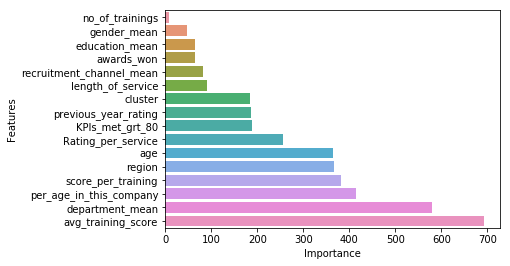

In [18]:
#XGB_model.feature_names
#print(XGB_model.get_score())
#print("")

xgb_Imp = pd.DataFrame({'Features' : list(XGB_model.get_score().keys()), 
                        'Importance' : list(XGB_model.get_score().values())}).sort_values(['Importance'])

xgb_Imp

plt.figure()
#plt.barh(F_impt.indep, F_impt.importance, order = F_impt['importance'])
sns.barplot(xgb_Imp.Importance, xgb_Imp.Features)
plt.show()